# 0. Download Packages

In [1]:
import os
import sys
import math
import random
import pickle
import warnings
import matplotlib.dates as mdates

from datetime import datetime, timedelta
from bisect import bisect_left
from itertools import combinations
from math import sqrt

import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tseries.offsets import MonthEnd
from matplotlib.patches import Rectangle

from scipy import stats
from scipy.stats import (norm, skew, kurtosis, pearsonr, spearmanr, kendalltau)
from scipy.optimize import curve_fit

from sklearn.metrics import mean_squared_error

import pysal
from numpy.random import Generator, PCG64
from functools import partial


file = "C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/"

import sys
sys.path.append(file)

import nbimporter
import FUNCTION_LIST as ChatJR # This will import all top-level functions/definitions from the notebook


# 1. DOWNLOAD DATA

## 2.1 PERTH REGIONAL OFFICE 1907-1944

In [3]:
#PERTH REGIONAL OFFICE
PRO_MSLP = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_REGIONAL_OFFICE_PRESSURE_MSLP_SUBDAILY_1907-1944.csv")
PRO_MSLP.set_index('Date',inplace = True)
PRO_MSLP.index= pd.to_datetime(PRO_MSLP.index,dayfirst = True,format='mixed')
PRO_MSLP = PRO_MSLP.round(1)

## 2.2 PERTH OBSVERATORY 1897-1908

In [5]:
#PERTH OBSERVATORY
PO_MSLP = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_OBSERVATORY_PRESSURE_MSLP_SUBDAILY_1897-1908.csv")
PO_MSLP.set_index('Date',inplace = True)
PO_MSLP.index= pd.to_datetime(PO_MSLP.index,dayfirst = True,format='mixed')
PO_MSLP
PO_MSLP = PO_MSLP.round(1)


## 2.3 PERTH GARDENS SUBDAILY 1880-1900

In [7]:
#PERTH GARDENS
PG_MSLP = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_GARDENS_PRESSURE_MSLP_SUBDAILY_1880-1900.csv")
PG_MSLP.set_index('Date',inplace = True)
PG_MSLP.index= pd.to_datetime(PG_MSLP.index,dayfirst = True,format='mixed')
PG_MSLP
PG_MSLP.loc['1881']['MSLP'].dropna().head(50)
PG_MSLP = PG_MSLP.round(1)


## 2.4 PERTH GARDENS MONTHLY 1876-1899

In [9]:
#PERTH GARDENS Monthly
PGm_MSLP = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_GARDENS_PRESSURE_MSLP_MONTHLY_1876-1899.csv")
PGm_MSLP.set_index('Date',inplace = True)
PGm_MSLP.index= pd.to_datetime(PGm_MSLP.index,dayfirst = True,format='mixed')
PGm_MSLP
PGm_MSLP = PGm_MSLP.round(1)


## 2.5 PERTH REGIONAL OFFICE BoM 1942-1992

In [11]:
#Perth Regional Office BoM
PRO_Pres_BoM = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_REGIONAL_OFFICE_PRESSURE_BOM_SUBDAILY_1942-1992.csv")
PRO_Pres_BoM.columns = ['Date', 'MSLP', 'As Read']
PRO_Pres_BoM['MSLP'] = pd.to_numeric(PRO_Pres_BoM['MSLP'], errors='coerce') /10
PRO_Pres_BoM['As Read'] = pd.to_numeric(PRO_Pres_BoM['As Read'], errors='coerce') /10
PRO_Pres_BoM['Date'] = pd.to_datetime(PRO_Pres_BoM['Date'],format ='mixed',dayfirst = True)
PRO_Pres_BoM.set_index('Date',inplace =True)
PRO_Pres_BoM = PRO_Pres_BoM.mask(PRO_Pres_BoM < 0, np.nan)
PRO_MSLP_B = PRO_Pres_BoM[['MSLP']]
PRO_MSLP_B
PRO_MSLP_B.loc['1975-03-01']

PRO_MSLP_B = PRO_MSLP_B.round(1)


## 2.6 PERTH METRO - 1994-2024

In [13]:
#Perth Metro
PM_Pres_BoM = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_BOM_SUBDAILY_1994-2020.csv")
PM_Pres_BoM.columns = ['Date', 'MSLP', 'As Read']
PM_Pres_BoM['Date'] = pd.to_datetime(PM_Pres_BoM['Date'],format ='mixed',dayfirst = True)
PM_Pres_BoM.set_index('Date',inplace =True)
PM_Pres_BoM['MSLP'] = pd.to_numeric(PM_Pres_BoM['MSLP'], errors='coerce') /10
PM_Pres_BoM['As Read'] = pd.to_numeric(PM_Pres_BoM['As Read'], errors='coerce') /10
PM_Pres_BoM = PM_Pres_BoM.mask(PM_Pres_BoM < 0, np.nan)

#Perth Metro
PM_Pres_BoM_2 = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_BOM_SUBDAILY_2020-2024.txt",
                     sep=',',)[['Year Month Day Hour Minutes in YYYY','MM','DD','HH24','Mean sea level pressure in hPa']]
PM_Pres_BoM_2.rename(columns = {'Year Month Day Hour Minutes in YYYY':'Year','MM':'Month','DD':'Day','HH24':'Hour','Mean sea level pressure in hPa':'MSLP'},inplace= True)
PM_Pres_BoM_2['Date'] = pd.to_datetime(PM_Pres_BoM_2[['Year', 'Month', 'Day','Hour']],format  ='mixed')
PM_Pres_BoM_2 = PM_Pres_BoM_2[['Date','MSLP']].set_index('Date')
PM_Pres_BoM_2['MSLP'] = pd.to_numeric(PM_Pres_BoM_2['MSLP'], errors='coerce')
PM_Pres_BoM_2 = PM_Pres_BoM_2.mask(PM_Pres_BoM_2 < 0, np.nan)

'''Pressure'''
PM_Pres_BoM_3 = pd.read_fwf(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_BOM_SUBDAILY_2023_2024.txt", colspecs=[(1, 7), (7, 20), (27, 33), (35, 41)], 
                   header=None, names=['ID', 'Date', 'MSLP', 'Pressure'])

# Ensure Date column is in the correct format
PM_Pres_BoM_3['Date'] = pd.to_datetime(PM_Pres_BoM_3['Date'], format='%Y%m%d%H%M')
PM_Pres_BoM_3['Pressure'] =PM_Pres_BoM_3['Pressure']/10
PM_Pres_BoM_3['MSLP'] =PM_Pres_BoM_3['MSLP']/10

PM_Pres_BoM_3.set_index('Date',inplace =True)
PM_Pres_BoM_3 = PM_Pres_BoM_3[['MSLP']]



PM_Pres_BoM = pd.concat([PM_Pres_BoM.loc[:'2019-12-31'], PM_Pres_BoM_2.loc['2020-01-01':'2024-02-29 13:00:00'],PM_Pres_BoM_3.loc['2024-02-29 14:00:00':'2024-12-31']],axis = 0)
PM_MSLP = PM_Pres_BoM
PM_MSLP = PM_MSLP[['MSLP']]
PM_MSLP
PM_MSLP = PM_MSLP.round(1)


## 2.7 PERTH AIRPORT 1944-2024

In [14]:
#Perth Aiport
PA_Pres_BoM = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_AIRPORT_PRESSURE_BOM_SUBDAILY_1944-2020.csv")
PA_Pres_BoM.columns = ['Date', 'MSLP', 'As Read']
PA_Pres_BoM['Date'] = pd.to_datetime(PA_Pres_BoM['Date'],format ='mixed',dayfirst = True)
PA_Pres_BoM.set_index('Date',inplace =True)
PA_Pres_BoM['MSLP'] = pd.to_numeric(PA_Pres_BoM['MSLP'], errors='coerce') /10
PA_Pres_BoM['As Read'] = pd.to_numeric(PA_Pres_BoM['As Read'], errors='coerce') /10
PA_Pres_BoM = PA_Pres_BoM.mask(PA_Pres_BoM < 0, np.nan)

#Perth Airport
PA_Pres_BoM_2 = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_AIRPORT_PRESSURE_BOM_SUBDAILY_2020-2024.txt",
                     sep=',',)[['Year Month Day Hour Minutes in YYYY','MM','DD','HH24','Mean sea level pressure in hPa']]
PA_Pres_BoM_2.rename(columns = {'Year Month Day Hour Minutes in YYYY':'Year','MM':'Month','DD':'Day','HH24':'Hour','Mean sea level pressure in hPa':'MSLP'},inplace= True)
PA_Pres_BoM_2['Date'] = pd.to_datetime(PA_Pres_BoM_2[['Year', 'Month', 'Day','Hour']],format  ='mixed')
PA_Pres_BoM_2 = PA_Pres_BoM_2[['Date','MSLP']].set_index('Date')
PA_Pres_BoM_2['MSLP'] = pd.to_numeric(PA_Pres_BoM_2['MSLP'], errors='coerce')
PA_Pres_BoM_2 = PA_Pres_BoM_2.mask(PA_Pres_BoM_2 < 0, np.nan)

#Combine Perth Airport and Metro Together
PA_Pres_BoM = pd.concat([PA_Pres_BoM.loc[:'2019-12-31'], PA_Pres_BoM_2.loc['2020-01-01':]],axis = 0)
PA_MSLP = PA_Pres_BoM
PA_MSLP = PA_MSLP[['MSLP']]
PA_MSLP
PA_MSLP = PA_MSLP.round(1)


## 2.8 SWAN RIVER SUBDAILY 1830-1875

In [15]:
#SWAN RIVER
SWR_MSLP = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\SWAN_RIVER_PRESSURE_MSLP_SUBDAILY_1830-1875.csv")
SWR_MSLP.set_index('Date',inplace = True)
SWR_MSLP.index= pd.to_datetime(SWR_MSLP.index,dayfirst = True,format='mixed')
SWR_MSLP
SWR_MSLP = SWR_MSLP.round(1)


## 2.9 FOGT DATASET 1876-2018

In [16]:
#FOGT DATASET
FOGT_Monthly  = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_PRESSURE_FOGT_MONTHLY_1876-2018.csv")
FOGT_Monthly = FOGT_Monthly.rename(columns = {'Unnamed: 0':'Date'})
FOGT_Monthly.set_index('Date',inplace = True)
FOGT_Monthly.index= pd.to_datetime(FOGT_Monthly.index,dayfirst = True,format='mixed')
FOGT_Monthly['MSLP'] = FOGT_Monthly['slp']
FOGT_Monthly = FOGT_Monthly[['MSLP']]
FOGT_Monthly
FOGT_Monthly = FOGT_Monthly.round(1)


## 2.10 SWAN RIVER MONTHLY 1830-1875

In [18]:
#Swan River Monthly
Swan_River_Monthly  = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\SWAN_RIVER_PRESSURE_CORRECT_ZAK_MONTHLY_1830-1875.csv")
Swan_River_Monthly.set_index('Date',inplace = True)
Swan_River_Monthly.index= pd.to_datetime(Swan_River_Monthly.index,dayfirst = True,format='mixed')
Swan_River_Monthly

Swan_River_Monthly = Swan_River_Monthly.round(1)


# 3. CHECKING THE 1942-1944 MONTHLY DATA PERTH REGIONAL OFFICE
So we are checking the dip that occurs in PRO in both datasets to see if there is some funny business going on

In [19]:
PRO_MSLP_B['MSLP'].resample('D').mean().resample('MS').mean()

Date
1942-01-01    1015.098387
1942-02-01    1016.309524
1942-03-01    1015.930376
1942-04-01    1018.031611
1942-05-01    1014.665161
                 ...     
1991-12-01    1013.137097
1992-01-01    1015.398387
1992-02-01    1012.253017
1992-03-01    1015.911521
1992-04-01    1015.666250
Freq: MS, Name: MSLP, Length: 604, dtype: float64

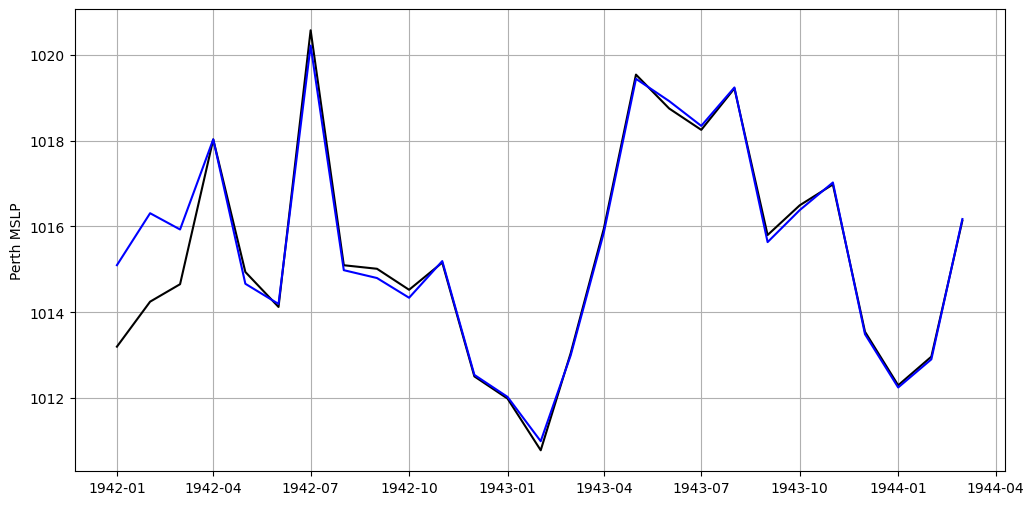

In [20]:
# Create a new figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6), sharex=True)

ax1.plot(PRO_MSLP['MSLP'].resample('D').mean().resample('MS').mean().loc['1942':'1944-3'], color='k', label='US')
ax1.set_ylabel('Perth MSLP', color='k')
ax1.tick_params('y', colors='k')
ax1.grid(True)
ax1.plot(PRO_MSLP_B['MSLP'].resample('D').mean().resample('MS').mean().loc['1942':'1944-3'], color='b', label='BOM')
ax1.grid(True)

It appears that what we have is the same record as the BoM excluding the first 3 months. We know we updated the record in 1942-04, therefore something else must be impacting the record to.

Therefore, we have elected to update the record from 1942-04 to 1944-03, keeping the integridy of the overlap used in all of the dataset combinations of 2 years.


# 4. CHECK WHEN DAYLIGHT SAVINGS OCCURRED IN PERTH
http://www.bom.gov.au/climate/averages/tables/dst_times.shtml

1 Jan 1917	25 Mar 1917 - DONT SEE A CHANGE IN TIME TAKEN

1 Jan 1942	29 Mar 1942

27 Sep 1942	28 Mar 1943

27 Oct 1974	2 Mar 1975

30 Oct 1983	4 Mar 1984

17 Nov 1991 1 Mar 1992

3 Dec 2006 25 Mar 2007


28 Oct 2007 30 Mar 2008

26 Oct 2008 29 Mar 2009

## 4.1 PERTH AIRPORT

In [22]:
Dataset = PA_MSLP#RO_MSLP_B


Dates = ['1974-10-27 02:00:00', '1975-03-02']
filtered = Dataset[~Dataset.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['1983-10-30 02:00:00','1984-03-04']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['1991-11-17 02:00:00','1992-03-01']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['2006-12-3 02:00:00','2007-3-25']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['2007-10-28 02:00:00','2008-3-30']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['2008-10-26 02:00:00','2009-3-29']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]


Change = Dataset.loc['1974-10-27 02:00:00':'1975-03-01'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['1983-10-30 02:00:00':'1984-03-03'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['1991-11-17 02:00:00':'1992-02-28'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['2006-12-3 02:00:00':'2007-03-24'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['2007-10-28 02:00:00':'2008-03-29'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['2008-10-26 02:00:00':'2009-03-28'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

filtered = filtered.sort_index()


PA_MSLP = filtered

## 4.2 PERTH METRO

In [24]:
Dataset = PM_MSLP#RO_MSLP_B

Dates = ['1974-10-27 02:00:00', '1975-03-02']
filtered = Dataset[~Dataset.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['2006-12-3 02:00:00','2007-3-25']
filtered = Dataset[~Dataset.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['2007-10-28 02:00:00','2008-3-30']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['2008-10-26 02:00:00','2009-3-29']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Change = Dataset.loc['2006-12-3 02:00:00':'2007-3-24'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['2007-10-28 02:00:00':'2008-3-29'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['2008-10-26 02:00:00':'2009-3-28'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

filtered = filtered.sort_index()


PM_MSLP = filtered

## 4.3 BOM PERTH REGIONAL OFFICE

In [25]:
Dataset = PRO_MSLP_B

Dates = ['1974-10-27 02:00:00', '1975-03-02']
filtered = Dataset[~Dataset.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['1983-10-30 02:00:00','1984-03-04']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Dates = ['1991-11-17 02:00:00','1992-03-01']
filtered = filtered[~filtered.index.isin(pd.date_range(start=Dates[0], end=Dates[1], freq='h'))]

Change = Dataset.loc['1974-10-27 02:00:00': '1975-03-01'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['1983-10-30 02:00:00':'1984-03-03'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

Change = Dataset.loc['1991-11-17 02:00:00':'1992-02-28'].shift(freq='1h')
filtered = pd.concat([filtered,Change],axis = 0)

filtered = filtered.sort_index()
PRO_MSLP_B = filtered

1940s were kept as actual time during the war, therefore DST was not included in the records for this period

### 4.4 PERTH REGIONAL OFFICE

No DST was also relevent n 1917 as this was also at a time of warm

## 4.5 check to see if it works as some dates still have random Hours in the dataset

In [26]:
PM_MSLP = PM_MSLP[PM_MSLP.index != '1995-09-25 02:00:00'] #remove the random HOUR 2 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1994-07-27 11:00:00	'] #remove the random HOUR 11 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1994-07-27 14:00:00	'] #remove the random HOUR 14 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1994-07-25 14:00:00	'] #remove the random HOUR 14 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1994-10-11 17:00:00	'] #remove the random HOUR 17 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1994-07-26 19:00:00	'] #remove the random HOUR 19 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1994-07-24 20:00:00	'] #remove the random HOUR 20 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1995-05-17 14:00:00	'] #remove the random HOUR 14 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1995-07-14 20:00:00	'] #remove the random HOUR 20 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1995-10-05 14:00:00	'] #remove the random HOUR 14 as it is come out of nowhere
PM_MSLP = PM_MSLP[PM_MSLP.index != '1995-07-21 20:00:00	'] #remove the random HOUR 20 as it is come out of nowhere


# 5. NOW CONVERT ALL DATASETS TO 9AM AND 3PM

This uses my code from my Masters DEEM Model which is avalaible on my github (https://github.com/jarradr8/Daily_Extreme_Estimator_Model). But essentially, we are using the linear regression fitting model to map a 7am pressure to 9am etc

## 5.1 PERTH GARDENS EQUIVELENT

In [28]:
#Split into respective hours
PM_7 = PM_MSLP[PM_MSLP.index.hour == 7]
PM_7= PM_7.rename(columns = {'MSLP':'7'})
PM_7['Date'] = PM_7.index.date  # Extract the full date
PM_7['Date'] = pd.to_datetime(PM_7['Date'])  # Convert to datetime format
PM_7 = PM_7[['Date','7']]
PM_7 = PM_7.set_index('Date')

PM_9 = PM_MSLP[PM_MSLP.index.hour == 9][['MSLP']]
PM_9= PM_9.rename(columns = {'MSLP':'9'})
PM_9['Date'] = PM_9.index.date  # Extract the full date
PM_9['Date'] = pd.to_datetime(PM_9['Date'])  # Convert to datetime format
PM_9 = PM_9[['Date','9']]
PM_9 = PM_9.set_index('Date')

PM_12 = PM_MSLP[PM_MSLP.index.hour == 12][['MSLP']]
PM_12= PM_12.rename(columns = {'MSLP':'12'})
PM_12['Date'] = PM_12.index.date  # Extract the full date
PM_12['Date'] = pd.to_datetime(PM_12['Date'])  # Convert to datetime format
PM_12 = PM_12[['Date','12']]
PM_12 = PM_12.set_index('Date')

PM_15 = PM_MSLP[PM_MSLP.index.hour == 15][['MSLP']]
PM_15= PM_15.rename(columns = {'MSLP':'15'})
PM_15['Date'] = PM_15.index.date  # Extract the full date
PM_15['Date'] = pd.to_datetime(PM_15['Date'])  # Convert to datetime format
PM_15 = PM_15[['Date','15']]
PM_15 = PM_15.set_index('Date')

PM_COMP =pd.concat([PM_7,PM_9,PM_12,PM_15],axis = 1).dropna()
PM_COMP

7       9      12      15
Date                                      
2014-07-02  1013.0  1013.8  1015.0  1016.2
2014-07-03  1023.5  1024.5  1022.9  1021.0
2014-07-04  1018.3  1019.2  1017.7  1017.0
2014-07-05  1020.7  1021.3  1020.2  1017.8
2014-07-06  1012.1  1011.6  1012.3  1012.8
...            ...     ...     ...     ...
2024-12-27  1023.5  1023.6  1021.7  1019.9
2024-12-28  1019.4  1019.2  1017.4  1015.5
2024-12-29  1012.1  1011.8  1010.0  1008.8
2024-12-30  1016.0  1016.7  1015.1  1013.6
2024-12-31  1015.8  1015.8  1013.7  1011.5

[3818 rows x 4 columns]

We know all the issues occur from 1880 to 1884 so we need to keep it specific to that periodm

In [29]:
adjustments = pd.DataFrame(columns=["Slope", "Intercept", "Correlation"], index=range(1, 13))
# Loop through each month and calculate metrics


for i in range(1, 13):
    PM = PM_COMP[PM_COMP.index.month == i]
    if not PM.empty:  # Ensure there's data for the month
        AMn, BMn, corr = ChatJR.linear_regression_polyfit(PM['7'], PM['9']) #train the model on Perth Metro
        adjustments.loc[i] = [AMn.round(3), BMn.round(3), corr.round(2)] #Extract the linear equation coefficients and correlation
    else:
        adjustments.loc[i] = [np.nan, np.nan, np.nan]  # Handle missing months
adjustments #using 3 decimal places as the inHg was to 3 decimal places

Slope Intercept Correlation
1   0.974    26.788        0.99
2   0.977    23.578        0.99
3   0.989    11.612        0.99
4   0.996     4.641        0.99
5     1.0     0.907        0.99
6     1.0     0.564         1.0
7   0.992     8.829        0.99
8   0.996     4.831        0.99
9   0.995      5.97        0.99
10  0.976    24.796        0.99
11  0.978    22.435        0.99
12  0.979    21.747        0.99

In [30]:
PG_MSLP =PG_MSLP.dropna()
PG_MSLP.loc['1881'].head(50)

MSLP
Date                       
1881-01-01 09:00:00  1016.3
1881-01-01 12:00:00  1015.4
1881-01-02 09:00:00  1015.9
1881-01-02 12:00:00  1013.8
1881-01-03 09:00:00  1009.4
1881-01-03 12:00:00  1006.5
1881-01-04 09:00:00  1009.9
1881-01-04 12:00:00  1009.0
1881-01-05 09:00:00  1009.1
1881-01-05 12:00:00  1007.2
1881-01-06 09:00:00  1004.1
1881-01-06 12:00:00  1002.8
1881-01-07 09:00:00  1007.2
1881-01-07 12:00:00  1008.1
1881-01-08 12:00:00  1009.0
1881-01-09 12:00:00  1011.3
1881-01-10 12:00:00  1013.5
1881-01-11 12:00:00  1011.3
1881-01-12 12:00:00  1006.2
1881-01-13 12:00:00  1001.7
1881-01-14 12:00:00  1011.3
1881-01-15 12:00:00  1014.8
1881-01-16 12:00:00  1012.9
1881-01-17 12:00:00  1004.8
1881-01-18 12:00:00  1011.5
1881-01-19 12:00:00  1017.2
1881-01-20 12:00:00  1019.5
1881-01-21 12:00:00  1018.0
1881-01-22 12:00:00  1012.2
1881-01-23 12:00:00  1013.7
1881-01-24 12:00:00  1012.5
1881-01-25 12:00:00  1011.8
1881-01-26 12:00:00  1014.5
1881-01-27 12:00:00  1016.3
1881-01-28 12:00:00  1015.1
1881-01-29 12:00:00  1013.5
1881-01-30 12:00:00  1012.9
1881-01-31 12:00:00  1011.2
1881-02-01 09:00:00  1015.9
1881-02-01 12:00:00  1016.9
1881-02-02 09:00:00  1021.0
1881-02-02 12:00:00  1020.0
1881-02-03 09:00:00  1022.2
1881-02-03 12:00:00  1021.4
1881-02-04 09:00:00  1018.8
1881-02-04 12:00:00  1016.4
1881-02-05 09:00:00  1009.2
1881-02-05 12:00:00  1006.6
1881-02-06 09:00:00  1008.8
1881-02-06 12:00:00  1009.6

In [31]:
#Now lets get the 7th hour
PG_7 = PG_MSLP[PG_MSLP.index.hour ==7]

#Create the equivleent 9am dataset
PG_9_Eq_Dataset = []

#Create for loop to adjust each 7am time to 9am equiv
for index, row in PG_7.iterrows():
    #extract month
    MONTH = index.month
    #Slope and intercept table month extraction
    S_I = adjustments.loc[MONTH]
    #Extract slope
    S = S_I['Slope']
    #Extract Intercept
    I = S_I['Intercept']
    #Apply the MX+C onto X:7AM 
    PG_9_Eq = (row['MSLP']*S)+I
    #Add that to the date and call it the MSLP and its 9am equivelent 
    PG_9_Eq_Dataset.append({'Date': index, 'MSLP': PG_9_Eq.round(2)})

# Convert to DataFrame
PG_9_Eq_Dataset = pd.DataFrame(PG_9_Eq_Dataset)
# Set 'Date' as the index
PG_9_Eq_Dataset = PG_9_Eq_Dataset.set_index('Date')
#Get Subdaily to 9am
PG_9_Eq_Dataset.index = PG_9_Eq_Dataset.index + pd.Timedelta(hours=2)

#Now delete all 7am times
PG_MSLP_9am_Eq = PG_MSLP[PG_MSLP.index.hour != 7]

# Combine the two DataFrames
PG_MSLP_9am_Eq = pd.concat([PG_MSLP_9am_Eq, PG_9_Eq_Dataset],axis= 0).sort_index().dropna()

#check and delete duplicates
PG_MSLP_9am_Eq = PG_MSLP_9am_Eq[~PG_MSLP_9am_Eq.index.duplicated(keep='first')]

In [32]:
adjustments = pd.DataFrame(columns=["Slope", "Intercept", "Correlation"], index=range(1, 13))
# Loop through each month and calculate metrics


for i in range(1, 13):
    PM = PM_COMP[PM_COMP.index.month == i]
    if not PM.empty:  # Ensure there's data for the month
        AMn, BMn, corr = ChatJR.linear_regression_polyfit(PM['12'], PM['15'])
        adjustments.loc[i] = [AMn.round(3), BMn.round(3), corr.round(2)]
    else:
        adjustments.loc[i] = [np.nan, np.nan, np.nan]  # Handle missing months
adjustments #using 3 decimal places as the inHg was to 3 decimal places

Slope Intercept Correlation
1   0.902    97.988        0.96
2   0.925    74.221        0.97
3   0.932    67.869        0.98
4    0.93    69.717        0.99
5   0.952    47.269        0.98
6   0.949    50.949        0.99
7   0.955    44.363        0.99
8   0.949    50.506        0.99
9   0.922    78.373        0.98
10  0.937     63.38        0.98
11  0.932     67.77        0.97
12  0.933    67.021        0.97

In [33]:
#Now lets get the 12th hour
PG_12 = PG_MSLP_9am_Eq[PG_MSLP_9am_Eq.index.hour ==12]

#Create the equivleent 3pm dataset
PG_15_Eq_Dataset = []


#Create for loop to adjust each 7am time to 9am equiv
for index, row in PG_12.iterrows():
    #extract month
    MONTH = index.month
    #Slope and intercept table month extraction
    S_I = adjustments.loc[MONTH]
    #Extract slope
    S = S_I['Slope']
    #Extract Intercept
    I = S_I['Intercept']
    #Apply the MX+C onto X:7AM 
    PG_15_Eq = (row['MSLP']*S)+I
    #Add that to the date and call it the MSLP and its 9am equivelent 
    PG_15_Eq_Dataset.append({'Date': index, 'MSLP': PG_15_Eq.round(2)})


# Convert to DataFrame
PG_15_Eq_Dataset = pd.DataFrame(PG_15_Eq_Dataset)
# Set 'Date' as the index
PG_15_Eq_Dataset = PG_15_Eq_Dataset.set_index('Date')
#Get Subdaily to 9am
PG_15_Eq_Dataset.index = PG_15_Eq_Dataset.index + pd.Timedelta(hours=3)

#Now delete all 12pm times
PG_MSLP_9am_Eq2 = PG_MSLP_9am_Eq[PG_MSLP_9am_Eq.index.hour != 12]

# Combine the two DataFrames
PG_15_Eq_Dataset = pd.concat([PG_MSLP_9am_Eq2, PG_15_Eq_Dataset],axis= 0).sort_index().dropna()

#check and delete duplicates
PG_15_Eq_Dataset = PG_15_Eq_Dataset[~PG_15_Eq_Dataset.index.duplicated(keep='first')]
PG_15_Eq_Dataset

PG_MSLP_E=PG_15_Eq_Dataset

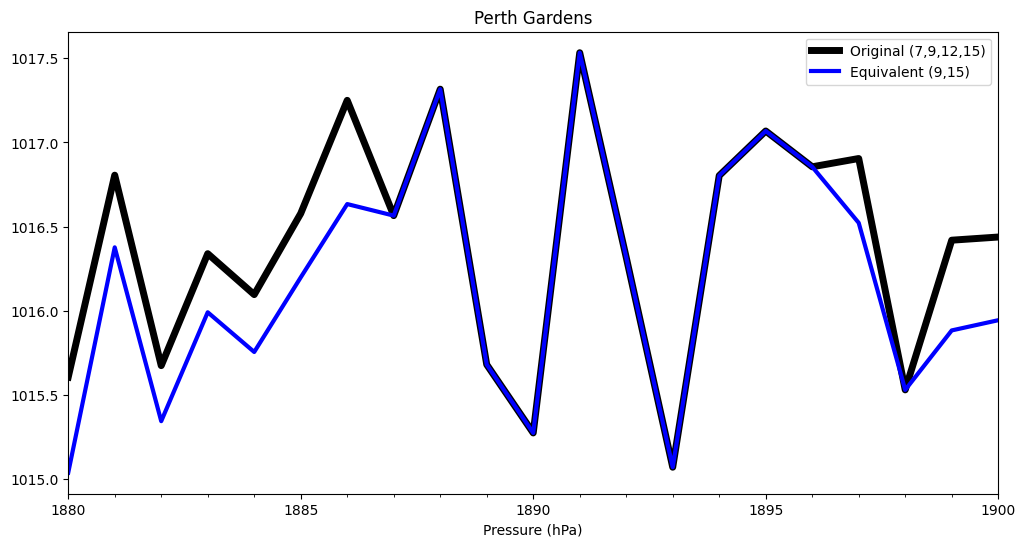

In [34]:
fig, ax= plt.subplots(1, 1, figsize=(12, 6), sharex=True)

PG_MSLP[['MSLP']].resample('YS').mean().plot(ax = ax,color = 'black',linewidth=  5)
PG_15_Eq_Dataset[['MSLP']].resample('YS').mean().plot(ax = ax,color = 'blue',linewidth=  3)
ax.legend(['Original (7,9,12,15)','Equivalent (9,15)'])
ax.set_title('Perth Gardens')
ax.set_xlabel('Pressure (hPa)')
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\PERTH_GARDENS_EQUIVALENT_COMPARISON", dpi=300, bbox_inches='tight')


9am+3pm equiv/2
             MSLP
Date             
1880-01-01  363.5
1881-01-01  350.0
1882-01-01  363.0
1883-01-01  365.0
1884-01-01  366.0
1885-01-01  365.0
1886-01-01  363.5
1887-01-01  365.0
1888-01-01  366.0
1889-01-01  365.0
1890-01-01  363.0
1891-01-01  365.0
1892-01-01  366.0
1893-01-01  365.0
1894-01-01  365.0
1895-01-01  365.0
1896-01-01  360.0
1897-01-01  365.0
1898-01-01  358.5
1899-01-01  364.5
1900-01-01  336.5


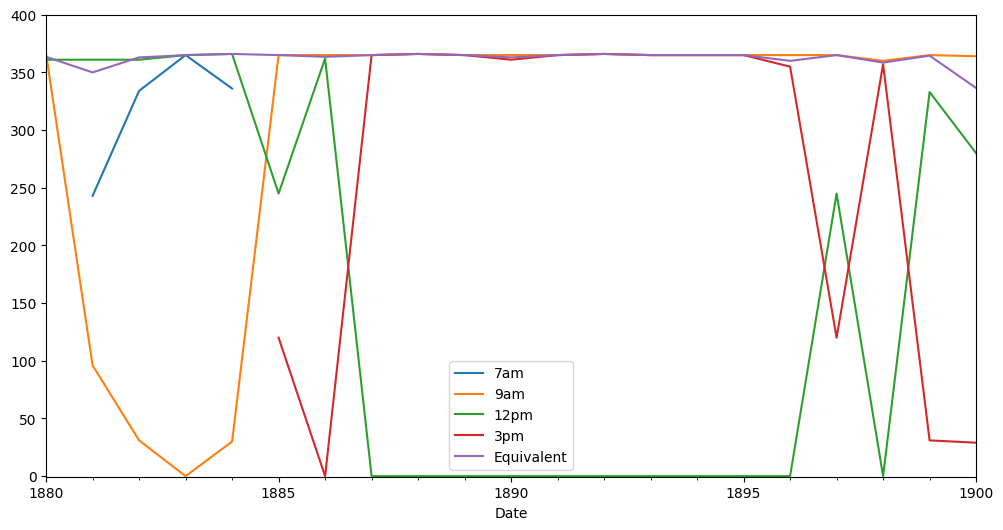

In [35]:
PG_7 = PG_MSLP[PG_MSLP.index.hour ==7]
PG_9 = PG_MSLP[PG_MSLP.index.hour ==9]
PG_12 = PG_MSLP[PG_MSLP.index.hour ==12]
PG_15 = PG_MSLP[PG_MSLP.index.hour ==15]
fig, ax= plt.subplots(1, 1, figsize=(12, 6), sharex=True)
PG_7.resample('YS').count().plot(ax=ax)
PG_9.resample('YS').count().plot(ax=ax)
PG_12.resample('YS').count().plot(ax=ax)
PG_15.resample('YS').count().plot(ax=ax)
(PG_15_Eq_Dataset.resample('YS').count()/2).plot(ax=ax)
plt.legend(['7am','9am','12pm','3pm','Equivalent'])
ax.set_ylim([-0.5,400])

print("9am+3pm equiv/2")
print(PG_15_Eq_Dataset.resample('YS').count()/2)
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\PERTH_GARDENS_EQUIVALENT_COUNT", dpi=300, bbox_inches='tight')



In [36]:
PG_15 = PG_MSLP[PG_MSLP.index.hour ==12]
PG_12.loc['1881'].resample('MS').count()

PG_12.loc['1881'].head(50)

MSLP
Date                       
1881-01-01 12:00:00  1015.4
1881-01-02 12:00:00  1013.8
1881-01-03 12:00:00  1006.5
1881-01-04 12:00:00  1009.0
1881-01-05 12:00:00  1007.2
1881-01-06 12:00:00  1002.8
1881-01-07 12:00:00  1008.1
1881-01-08 12:00:00  1009.0
1881-01-09 12:00:00  1011.3
1881-01-10 12:00:00  1013.5
1881-01-11 12:00:00  1011.3
1881-01-12 12:00:00  1006.2
1881-01-13 12:00:00  1001.7
1881-01-14 12:00:00  1011.3
1881-01-15 12:00:00  1014.8
1881-01-16 12:00:00  1012.9
1881-01-17 12:00:00  1004.8
1881-01-18 12:00:00  1011.5
1881-01-19 12:00:00  1017.2
1881-01-20 12:00:00  1019.5
1881-01-21 12:00:00  1018.0
1881-01-22 12:00:00  1012.2
1881-01-23 12:00:00  1013.7
1881-01-24 12:00:00  1012.5
1881-01-25 12:00:00  1011.8
1881-01-26 12:00:00  1014.5
1881-01-27 12:00:00  1016.3
1881-01-28 12:00:00  1015.1
1881-01-29 12:00:00  1013.5
1881-01-30 12:00:00  1012.9
1881-01-31 12:00:00  1011.2
1881-02-01 12:00:00  1016.9
1881-02-02 12:00:00  1020.0
1881-02-03 12:00:00  1021.4
1881-02-04 12:00:00  1016.4
1881-02-05 12:00:00  1006.6
1881-02-06 12:00:00  1009.6
1881-02-07 12:00:00  1010.8
1881-02-08 12:00:00  1013.5
1881-02-09 12:00:00  1013.0
1881-02-10 12:00:00  1010.9
1881-02-11 12:00:00  1009.4
1881-02-12 12:00:00  1011.3
1881-02-13 12:00:00  1005.7
1881-02-14 12:00:00  1012.4
1881-02-15 12:00:00  1015.6
1881-02-16 12:00:00  1017.6
1881-02-17 12:00:00  1012.4
1881-02-18 12:00:00  1009.3
1881-02-19 12:00:00  1010.2

## 5.2 SWAN RIVER
Now we want to makke sure that SWR river is also in an equivleent format, and we know that each of the hours avalaible can be adjusted to 9 and 15, which means we update 10 and 4pm as well

In [37]:
#What are the avaliable hours
SWR_MSLP.index.hour.unique()

Index([12, 15, 9, 10, 11, 13, 17, 16, 14, 18, 7, 6, 22, 8, 19, 20, 0], dtype='int32', name='Date')

In [38]:
'''
Extract all the hours avalible and required to be used for adjusting the  Swan River to the 9am and 3pm equivelents in the modern record
'''


Hour  = 0
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_0 = PM

Hour  = 6
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_6 = PM

Hour  = 7
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_7 = PM

Hour  = 8
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_8 = PM

Hour  = 9
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_9 = PM

Hour  = 10
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_10 = PM

Hour  =11
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_11 = PM

Hour  = 12
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_12 = PM

Hour  = 13
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_13 = PM

Hour  = 14
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_14 = PM


Hour  = 15
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_15 = PM

Hour  = 16
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_16 = PM

Hour  = 17
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_17 = PM

Hour  = 18
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_18 = PM

Hour  = 19
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_19 = PM

Hour  = 20
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_20 = PM

Hour  = 22
PM = PM_MSLP[PM_MSLP.index.hour == Hour][['MSLP']]
PM= PM.rename(columns = {'MSLP':'{}'.format(Hour)})
PM['Date'] = PM.index.date  # Extract the full date
PM['Date'] = pd.to_datetime(PM['Date'])  # Convert to datetime format
PM = PM[['Date','{}'.format(Hour)]]
PM = PM.set_index('Date')
PM_22 = PM

PM_COMP =pd.concat([PM_0,PM_6,PM_7,PM_8,PM_9,PM_10,PM_11,PM_12,PM_13,PM_14,PM_15,PM_16,PM_17,PM_18,PM_19,PM_20,PM_22],axis = 1).dropna()
PM_COMP

0       6       7       8       9      10      11      12  \
Date                                                                         
2014-07-02  1017.1  1012.8  1013.0  1013.1  1013.8  1014.2  1014.6  1015.0   
2014-07-03  1021.9  1023.1  1023.5  1024.2  1024.5  1024.5  1023.9  1022.9   
2014-07-04  1019.8  1017.9  1018.3  1018.6  1019.2  1019.0  1018.5  1017.7   
2014-07-05  1020.6  1020.1  1020.7  1021.1  1021.3  1021.4  1020.9  1020.2   
2014-07-06  1015.0  1012.0  1012.1  1012.0  1011.6  1012.6  1012.4  1012.3   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2024-12-27  1022.1  1023.0  1023.5  1023.8  1023.6  1023.3  1022.7  1021.7   
2024-12-28  1019.5  1019.2  1019.4  1019.5  1019.2  1018.8  1018.1  1017.4   
2024-12-29  1013.5  1011.5  1012.1  1012.2  1011.8  1011.1  1010.5  1010.0   
2024-12-30  1012.4  1015.5  1016.0  1016.5  1016.7  1016.2  1015.8  1015.1   
2024-12-31  1015.5  1015.2  1015.8  1015.7  1015.8  1015.4  1014.7  1013.7   

                13      14      15      16      17      18      19      20  \
Date                                                                         
2014-07-02  1015.1  1015.5  1016.2  1017.2  1018.3  1019.1  1019.5  1020.0   
2014-07-03  1022.0  1021.2  1021.0  1021.0  1021.1  1021.2  1021.6  1021.5   
2014-07-04  1016.9  1016.7  1017.0  1017.8  1018.2  1018.7  1019.4  1020.0   
2014-07-05  1018.9  1018.4  1017.8  1017.5  1017.4  1017.4  1017.3  1016.8   
2014-07-06  1012.3  1012.3  1012.8  1012.6  1013.8  1014.2  1014.9  1015.8   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2024-12-27  1021.0  1020.5  1019.9  1019.4  1019.2  1019.2  1019.5  1019.9   
2024-12-28  1016.5  1015.9  1015.5  1015.0  1014.6  1014.7  1014.9  1014.8   
2024-12-29  1009.5  1009.0  1008.8  1008.4  1008.6  1010.6  1011.5  1010.8   
2024-12-30  1014.6  1014.0  1013.6  1013.2  1013.0  1013.2  1013.6  1013.9   
2024-12-31  1013.0  1012.1  1011.5  1011.3  1011.0  1011.3  1011.7  1011.9   

                22  
Date                
2014-07-02  1021.6  
2014-07-03  1020.7  
2014-07-04  1020.5  
2014-07-05  1016.2  
2014-07-06  1015.2  
...            ...  
2024-12-27  1020.4  
2024-12-28  1015.0  
2024-12-29  1011.5  
2024-12-30  1014.7  
2024-12-31  1012.0  

[3793 rows x 17 columns]

In [39]:
'''
For each of the avaible sundaily hours, get the equations so we can add them apply then on the swan river record
'''


# Create an empty dictionary for adjustments
adjustments_dictionary = {hour: {} for hour in [0, 6, 7, 8,10,11,12,13,14,16,17,18,19,20,22]}

# Loop through the specified hours
for hour in [0, 6, 7, 8,10,11,12,13,14,16,17,18,19,20,22]:
    # Initialize a DataFrame for this hour's adjustments
    adjustments = pd.DataFrame(columns=["Slope", "Intercept", "Correlation"], index=range(1, 13))

    #If its less then 12 hours, adjust to 9am
    if hour < 12:
        # Loop through each month and calculate metrics
        for i in range(1, 13):
            PM = PM_COMP[PM_COMP.index.month == i]
            if not PM.empty:  # Ensure there's data for the month
                AMn, BMn, corr = ChatJR.linear_regression_polyfit(PM['{}'.format(hour)], PM['9'])
                adjustments.loc[i] = [AMn.round(3), BMn.round(3), corr.round(2)]
            else:
                adjustments.loc[i] = [np.nan, np.nan, np.nan]  # Handle missing months
    
       #If its more or equal to 12 hours, adjust to 3pm
    else:
        # Loop through each month and calculate metrics
        for i in range(1, 13):
            PM = PM_COMP[PM_COMP.index.month == i]
            if not PM.empty:  # Ensure there's data for the month
                AMn, BMn, corr = ChatJR.linear_regression_polyfit(PM['{}'.format(hour)], PM['15'])
                adjustments.loc[i] = [AMn.round(3), BMn.round(3), corr.round(3)]
            else:
                adjustments.loc[i] = [np.nan, np.nan, np.nan]  # Handle missing months



    # Convert the DataFrame for this hour to a dictionary
    adjustments_dictionary[hour] = adjustments.to_dict(orient='index')

adjustments_dictionary
#Each part of the dictionayr is associated with the month and hour for slope , intercetp and correlation

{0: {1: {'Slope': 1.026, 'Intercept': -24.836, 'Correlation': 0.93},
  2: {'Slope': 0.994, 'Intercept': 7.499, 'Correlation': 0.92},
  3: {'Slope': 0.987, 'Intercept': 14.22, 'Correlation': 0.94},
  4: {'Slope': 0.985, 'Intercept': 16.521, 'Correlation': 0.95},
  5: {'Slope': 0.978, 'Intercept': 23.768, 'Correlation': 0.95},
  6: {'Slope': 0.988, 'Intercept': 13.332, 'Correlation': 0.95},
  7: {'Slope': 0.937, 'Intercept': 64.984, 'Correlation': 0.92},
  8: {'Slope': 0.968, 'Intercept': 33.267, 'Correlation': 0.93},
  9: {'Slope': 0.977, 'Intercept': 24.129, 'Correlation': 0.92},
  10: {'Slope': 0.962, 'Intercept': 39.233, 'Correlation': 0.91},
  11: {'Slope': 0.98, 'Intercept': 21.447, 'Correlation': 0.92},
  12: {'Slope': 0.994, 'Intercept': 7.692, 'Correlation': 0.92}},
 6: {1: {'Slope': 0.967, 'Intercept': 34.243, 'Correlation': 0.98},
  2: {'Slope': 0.974, 'Intercept': 26.907, 'Correlation': 0.98},
  3: {'Slope': 0.987, 'Intercept': 14.281, 'Correlation': 0.99},
  4: {'Slope': 0.9

In [40]:
#adjustments_dictionary[Hour][Month][M/I/Corr]
#Extract Month and Hour that will help adjust the SWR with the adjustments
SWR_MSLP['Month'] = SWR_MSLP.index.month
SWR_MSLP['Hour'] = SWR_MSLP.index.hour
SWR_MSLP = SWR_MSLP.reset_index()
SWR_MSLP

Date    MSLP  Month  Hour
0     1830-05-22 12:00:00  1013.8      5    12
1     1830-05-22 15:00:00  1015.2      5    15
2     1830-05-24 09:00:00  1008.5      5     9
3     1830-05-24 12:00:00  1012.2      5    12
4     1830-05-24 15:00:00  1012.1      5    15
...                   ...     ...    ...   ...
25961 1875-12-29 16:00:00  1016.3     12    16
25962 1875-12-30 10:00:00  1016.4     12    10
25963 1875-12-30 16:00:00  1015.4     12    16
25964 1875-12-31 10:00:00  1016.1     12    10
25965 1875-12-31 16:00:00  1014.7     12    16

[25966 rows x 4 columns]

In [41]:
'''
Apply all adjustments on the SWR record with the associated Month, Hour and MSLP adjustment
'''

Equivelent_Dataset_P = [] 
Equivelent_Dataset_Date = [] 
Hour_Dif = []

for index, row in SWR_MSLP.iterrows():

    #Get the key points
    Mth = row['Month']
    Hr = row['Hour']
    Dt = row['Date']
    Pressure = row['MSLP']

    if Hr == 9 or Hr == 15:
        X = False
    else:
        #Extract slope
        S = adjustments_dictionary[Hr][Mth]['Slope']
        #Extract Intercept
        I = adjustments_dictionary[Hr][Mth]['Intercept']
        #Apply the MX+C onto X:7AM 
        Ind_MSLP_Eq = ((Pressure*S)+I)
    
        Equivelent_Dataset_P.append(round(Ind_MSLP_Eq,2))
        Equivelent_Dataset_Date.append(Dt)
        if Hr < 12:
            Hr_Dif = 9-Hr
        else:
            Hr_Dif = 15-Hr
        Hour_Dif.append(Hr_Dif)

#Combine each of the 3 datasets together
DATES_EQ = pd.DataFrame({'Date': Equivelent_Dataset_Date})
MSLP_EQ = pd.DataFrame({'MSLP': Equivelent_Dataset_P})
DIF_EQ = pd.DataFrame({'Hour Difference': Hour_Dif})

Equvilents = pd.concat([DATES_EQ,MSLP_EQ,DIF_EQ],axis = 1)
Equvilents['Hour'] = Equvilents['Date'].dt.hour
Equvilents['Date'] = Equvilents['Date'].dt.date
Equvilents['Hour New'] = Equvilents['Hour'] + Equvilents['Hour Difference'] 

Equvilents['Date'] = pd.to_datetime(Equvilents['Date'],dayfirst = True, errors='coerce')
# Combine 'Date' and 'Hour New' into a new column 'DateTime'
Equvilents['Date'] = Equvilents['Date'].dt.strftime('%Y-%m-%d') + ' ' + Equvilents['Hour New'].astype(str) + ':00:00'
Equvilents

#Remove the Hour  and Hour New so we can see Hour Difference and MSLP
Equvilents = Equvilents.set_index('Date')
Equvilents = Equvilents[['MSLP','Hour Difference']]

Equvilents

'''
Now we can all the non-duplicated dates of the SWR record so we have one of 9 and 15 each day
'''

#Extract actual 9 and 15 and set the Hour Difference to 0
SWR_MSLP_9_15 = SWR_MSLP[(SWR_MSLP['Hour'] == 9) | (SWR_MSLP['Hour'] == 15)]
SWR_MSLP_9_15['Hour Difference'] = SWR_MSLP_9_15['Month']*0
SWR_MSLP_9_15 = SWR_MSLP_9_15.set_index('Date')
SWR_MSLP_9_15 = SWR_MSLP_9_15[['MSLP','Hour Difference']]

#Add the equivilents in and sort the date in order
SWR_MSLP_Eq = pd.concat([SWR_MSLP_9_15,Equvilents])
SWR_MSLP_Eq = SWR_MSLP_Eq.reset_index()
SWR_MSLP_Eq['Date'] = pd.to_datetime(SWR_MSLP_Eq['Date'], errors='coerce')
SWR_MSLP_Eq = SWR_MSLP_Eq.sort_values(by='Date')


# Find duplicates based on the 'Date' column
duplicates = SWR_MSLP_Eq[SWR_MSLP_Eq.duplicated('Date', keep=False)]  # `keep=False` keeps all duplicates
non_duplicates = SWR_MSLP_Eq[~SWR_MSLP_Eq.duplicated('Date', keep=False)]  # `keep=False` keeps all duplicates


# Sort duplicates by absolute 'Hour Difference' value, if 0 keep
duplicates_sorted = duplicates.loc[duplicates.groupby('Date')['Hour Difference'].apply(lambda x: x.abs().idxmin())]


#Ensure 'Date' is in datetime format for both DataFrames
duplicates_sorted['Date'] = pd.to_datetime(duplicates_sorted['Date'], errors='coerce')
non_duplicates['Date'] = pd.to_datetime(non_duplicates['Date'], errors='coerce')

#Add all the fixed up duplicates
Finalised_SWR_RIVER_9_15= pd.concat([duplicates_sorted,non_duplicates]).sort_values(by='Date').set_index('Date')

#Since we have 30min and 45min etc remove those
# Filter the DataFrame to keep only rows where the time is 9:00 or 15:00
Finalised_SWR_RIVER_9_15 = Finalised_SWR_RIVER_9_15[Finalised_SWR_RIVER_9_15.index.hour.isin([9, 15]) & (Finalised_SWR_RIVER_9_15.index.minute == 0)]
Finalised_SWR_RIVER_9_15.index = pd.to_datetime(Finalised_SWR_RIVER_9_15.index, errors='coerce')

SWR_MSLP_E = Finalised_SWR_RIVER_9_15

C:\Users\jarra\AppData\Local\Temp\ipykernel_22868\1759643533.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWR_MSLP_9_15['Hour Difference'] = SWR_MSLP_9_15['Month']*0
C:\Users\jarra\AppData\Local\Temp\ipykernel_22868\1759643533.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicates['Date'] = pd.to_datetime(non_duplicates['Date'], errors='coerce')


9am+3pm equiv/2
             MSLP  Hour Difference
Date                              
1830-01-01  190.5            190.5
1831-01-01  285.5            285.5
1832-01-01  269.5            269.5
1833-01-01  311.0            311.0
1834-01-01  344.0            344.0
1835-01-01  333.0            333.0
1836-01-01  114.0            114.0
1837-01-01  110.0            110.0
1838-01-01  312.0            312.0
1839-01-01  291.5            291.5
1840-01-01  308.5            308.5
1841-01-01  320.0            320.0
1842-01-01  319.0            319.0
1843-01-01  312.5            312.5
1844-01-01  310.5            310.5
1845-01-01  313.5            313.5
1846-01-01  329.0            329.0
1847-01-01  308.0            308.0
1848-01-01  317.0            317.0
1849-01-01  298.0            298.0
1850-01-01  331.5            331.5
1851-01-01  277.5            277.5
1852-01-01    0.0              0.0
1853-01-01    0.0              0.0
1854-01-01  323.0            323.0
1855-01-01  320.5            320.5
1856

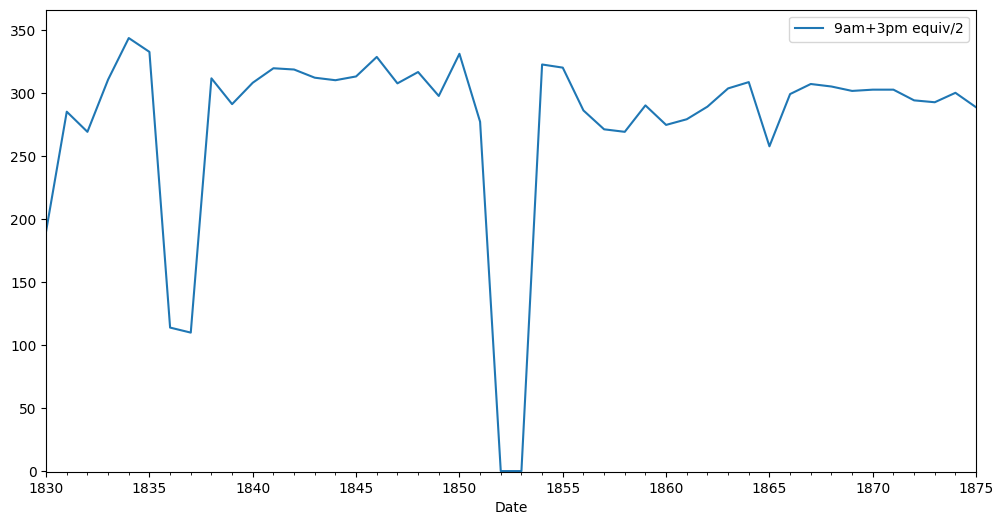

In [42]:
fig, ax= plt.subplots(1, 1, figsize=(12, 6), sharex=True)

(SWR_MSLP_E['MSLP'].resample('YS').count()/2).plot()
plt.legend(['9am+3pm equiv/2'])
ax.set_ylim([-0.5,366.5])

print("9am+3pm equiv/2")
print(SWR_MSLP_E.resample('YS').count()/2)
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\SWAN_RIVER_EQUIVALENT_COUNT", dpi=300, bbox_inches='tight')


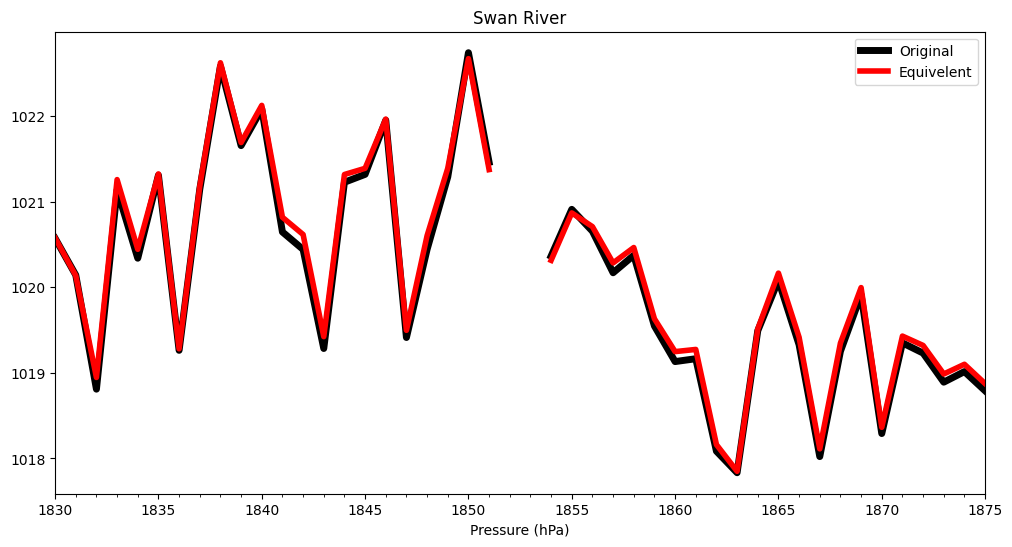

In [43]:
fig, ax= plt.subplots(1, 1, figsize=(12, 6), sharex=True)

SWR_MSLP.set_index('Date')[['MSLP']].resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax = ax,color = 'black',linewidth=  5)
SWR_MSLP_E[['MSLP']].resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax = ax,color = 'red',linewidth=  4)
ax.legend(['Original','Equivelent'])
ax.set_title('Swan River')
ax.set_xlabel('Pressure (hPa)')
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\SWAN_RIVER_EQUIVALENT_COMPARISON", dpi=300, bbox_inches='tight')


# 6. COMBINING ALL DATASETS TOGETHER

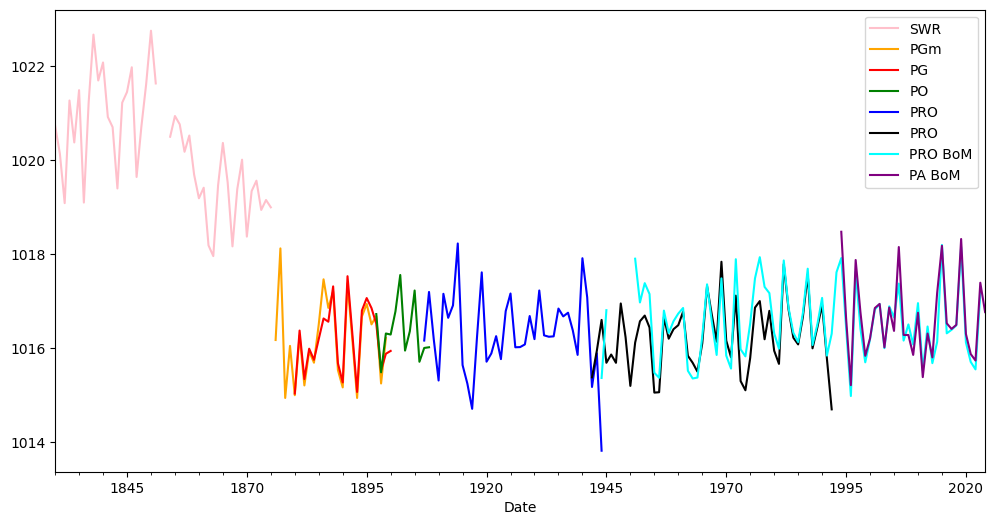

In [44]:

fig, ax= plt.subplots(1, 1, figsize=(12, 6), sharex=True)
SWR_MSLP_E['MSLP'].resample('YS').mean().plot(ax=ax,color ='pink')

PGm_MSLP.resample('YS').mean().plot(ax=ax,color ='orange')

PG_MSLP_E.resample('YS').mean().plot(ax=ax,color ='red')



PO_MSLP.resample('YS').mean().plot(ax=ax,color ='green')

PRO_MSLP.resample('YS').mean().plot(ax=ax,color ='blue')

PRO_MSLP_B[['MSLP']].resample('YS').mean().plot(ax=ax,color ='black')
PA_MSLP[['MSLP']].loc[:'2023'].resample('YS').mean().plot(ax=ax,color ='cyan')
PM_MSLP[['MSLP']].loc[:'2024'].resample('YS').mean().plot(ax=ax,color ='purple')


ax.legend(['SWR',
          'PGm',
          'PG',
          'PO',
          'PRO','PRO',
          'PRO BoM','PA BoM','PM BoM'])

In [45]:
## remove 9pm from 1945 below
PRO_MSLP = PRO_MSLP[PRO_MSLP.index.hour != 21]
PRO_MSLP_B_21= PRO_MSLP_B[PRO_MSLP_B.index.hour == 21].loc['1964':]
PRO_MSLP_B = PRO_MSLP_B[PRO_MSLP_B.index.hour != 21]
PRO_MSLP_B = pd.concat([PRO_MSLP_B,PRO_MSLP_B_21]).sort_index()
PRO_MSLP_B

MSLP
Date                       
1942-01-01 15:00:00  1011.3
1942-01-02 09:00:00  1011.4
1942-01-02 15:00:00  1011.6
1942-01-03 09:00:00  1017.0
1942-01-03 15:00:00  1016.1
...                     ...
1992-04-28 15:00:00     NaN
1992-04-29 09:00:00     NaN
1992-04-29 15:00:00     NaN
1992-04-30 09:00:00     NaN
1992-04-30 15:00:00     NaN

[133952 rows x 1 columns]

In [46]:
Perth_MSLP = ChatJR.Perth_Combination(PM_MSLP,
                               PA_MSLP,
                               PRO_MSLP_B,
                               PRO_MSLP,
                               PO_MSLP,
                               PGm_MSLP,
                               PG_MSLP_E,
                               SWR_MSLP_E['MSLP'])


FUNCTION_LIST.ipynb:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "from bisect import bisect_left\n",
FUNCTION_LIST.ipynb:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "from docx.enum.text import WD_ALIGN_PARAGRAPH\n",
FUNCTION_LIST.ipynb:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "        run(\"pip install -U python-docx\")\n",
FUNCTION_LIST.ipynb:119: FutureWarning: Series.__getitem__ treating keys as positions is d

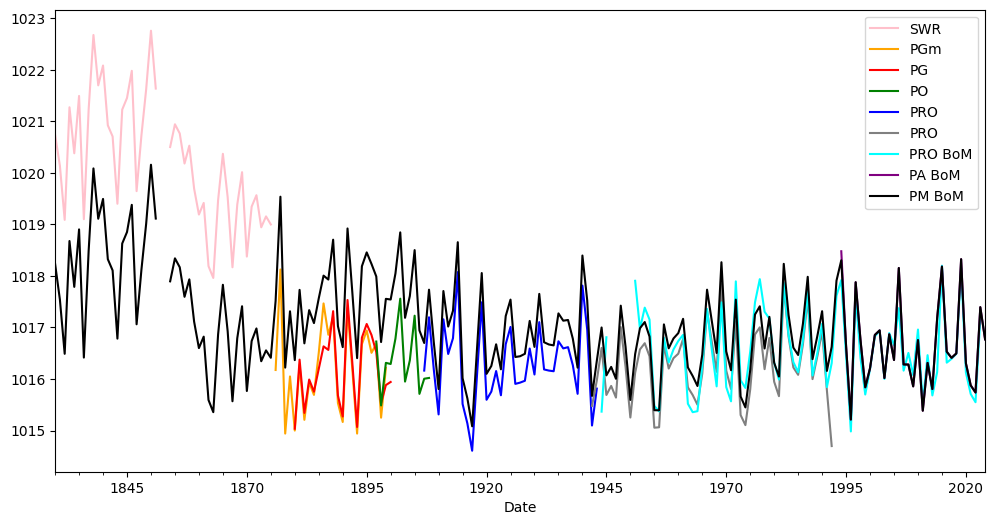

In [47]:
fig, ax= plt.subplots(1, 1, figsize=(12, 6), sharex=True)
SWR_MSLP_E['MSLP'].resample('YS').mean().plot(ax=ax,color ='pink')

PGm_MSLP.resample('YS').mean().plot(ax=ax,color ='orange')

PG_MSLP_E.resample('YS').mean().plot(ax=ax,color ='red')



PO_MSLP.resample('YS').mean().plot(ax=ax,color ='green')

PRO_MSLP.loc[:'1943'].resample('YS').mean().plot(ax=ax,color ='blue')

PRO_MSLP_B[['MSLP']].resample('YS').mean().plot(ax=ax,color ='grey')
PA_MSLP[['MSLP']].loc[:'2023'].resample('YS').mean().plot(ax=ax,color ='cyan')
PM_MSLP[['MSLP']].loc[:'2024'].resample('YS').mean().plot(ax=ax,color ='purple')
Perth_MSLP['MSLP'].resample('YS').mean().plot(ax=ax,color ='black')


ax.legend(['SWR',
          'PGm',
          'PG',
          'PO',
          'PRO','PRO',
          'PRO BoM','PA BoM','PM BoM','COMBINED'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\COMPARISON_WITH_COMBINED_NOT_RHTESTED_RECORD", dpi=300, bbox_inches='tight')


# 8. COMPARE BEFORE AND AFTER SHOTS before RH-Testing

## 8.1.1 Swan River 1830-51

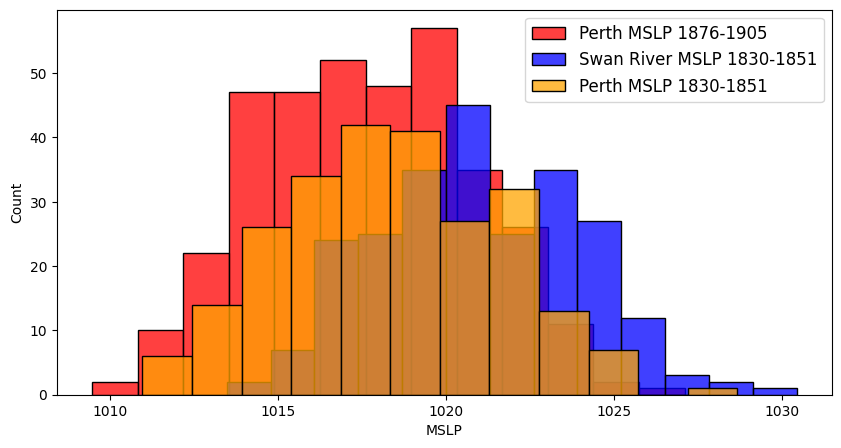

In [49]:
SWR_30_51 = SWR_MSLP_E.loc[:'1851']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(Perth_MSLP['MSLP'].loc['1876':'1905'].resample('MS').mean(),ax=ax,label = 'Perth MSLP 1876-1905',color = 'red')
ax.legend(fontsize = 12)

sns.histplot(SWR_30_51['MSLP'].resample('MS').mean(),ax=ax,label = 'Swan River MSLP 1830-1851',color = 'blue')
ax.legend(fontsize = 12)

sns.histplot(Perth_MSLP['MSLP'].loc['1830':'1851'].resample('MS').mean(),ax=ax,label = 'Perth MSLP 1830-1851',color = 'orange')
ax.legend(fontsize = 12)

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\MA_COMPARISON_DISTRIBUTION_SWR_1830_1851", dpi=300, bbox_inches='tight')



## 8.1.2 Swan River 1852-75

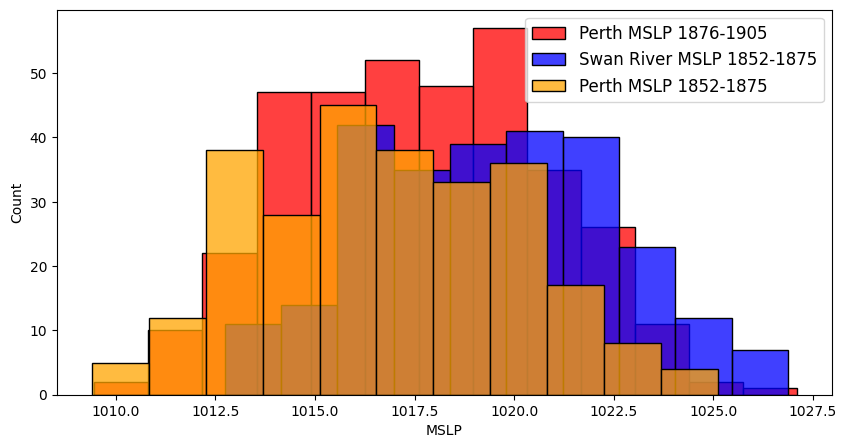

In [51]:
SWR_52_75 = SWR_MSLP_E.loc['1852':]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(Perth_MSLP['MSLP'].loc['1876':'1905'].resample('MS').mean(),ax=ax,label = 'Perth MSLP 1876-1905',color = 'red')
ax.legend(fontsize = 12)

sns.histplot(SWR_52_75['MSLP'].resample('MS').mean(),ax=ax,label = 'Swan River MSLP 1852-1875',color = 'blue')
ax.legend(fontsize = 12)

sns.histplot(Perth_MSLP['MSLP'].loc['1852':'1875'].resample('MS').mean(),ax=ax,label = 'Perth MSLP 1852-1875',color = 'orange')
ax.legend(fontsize = 12)
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\MA_COMPARISON_DISTRIBUTION_SWR_1852_1875", dpi=300, bbox_inches='tight')


## 8.2 PGm - PG OVERLAP

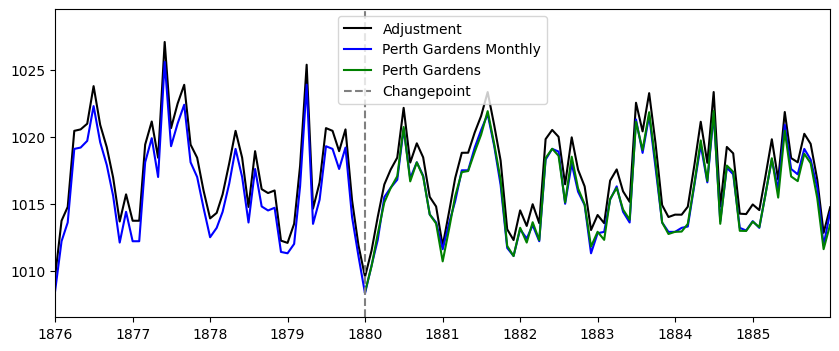

In [52]:
First = PGm_MSLP
Second = PG_MSLP_E
Updated = Perth_MSLP

# Define your date limits
xlim_L_Y = 1876
xlim_U_Y = 1885
xlim_L = datetime(1876, 1, 1)
xlim_U = datetime(1885, 12, 31)
xlim = [xlim_L, xlim_U]
xlim_Y = [xlim_L_Y , xlim_U_Y ]


xvline =  datetime(1880, 1, 1)
xvline_Y = 1880

#Pressure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
ax=ax1
ax.plot(Updated['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='k', label='Perth')
ax.plot(First['MSLP'].resample('MS').mean().loc[:'2023'], color='b', label='PGm')
ax.plot(Second['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='g', label='PG')

ax.axvline(x=xvline, color='grey', linestyle='--', label='x = 0')
ax.set_xlim(xlim)
ax.legend(['Adjustment','Perth Gardens Monthly', 'Perth Gardens','Changepoint'])

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\QQM_PG_PGm", dpi=300, bbox_inches='tight')


## 8.3 PG - PO Overlap


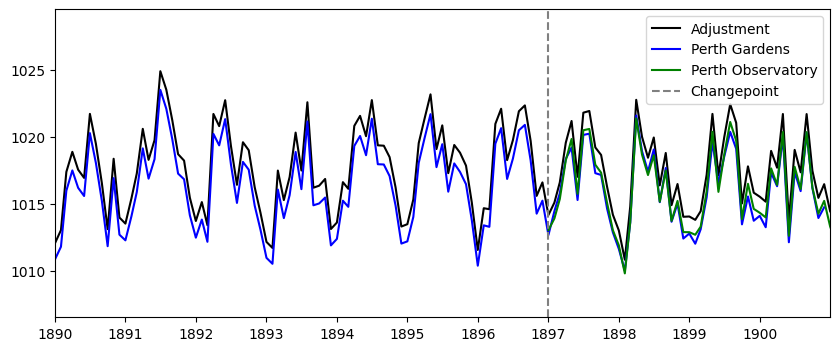

In [53]:
First = PG_MSLP_E
Second = PO_MSLP
Updated = Perth_MSLP

# Define your date limits
xlim_L_Y = 1890
xlim_U_Y = 1900
xlim_L = datetime(1890, 1, 1)
xlim_U = datetime(1900, 12, 31)
xlim = [xlim_L, xlim_U]
xlim_Y = [xlim_L_Y , xlim_U_Y ]


xvline =  datetime(1896, 12, 31)
xvline_Y = 1896

#Pressure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
ax=ax1
ax.plot(Updated['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='k', label='Perth')
ax.plot(First['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='b', label='PG')
ax.plot(Second['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='g', label='PO')

ax.axvline(x=xvline, color='grey', linestyle='--', label='x = 0')
ax.set_xlim(xlim)
ax.legend(['Adjustment','Perth Gardens', 'Perth Observatory','Changepoint'])

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\QQM_PO_PG", dpi=300, bbox_inches='tight')



## 8.4 PO - PRO Overlap


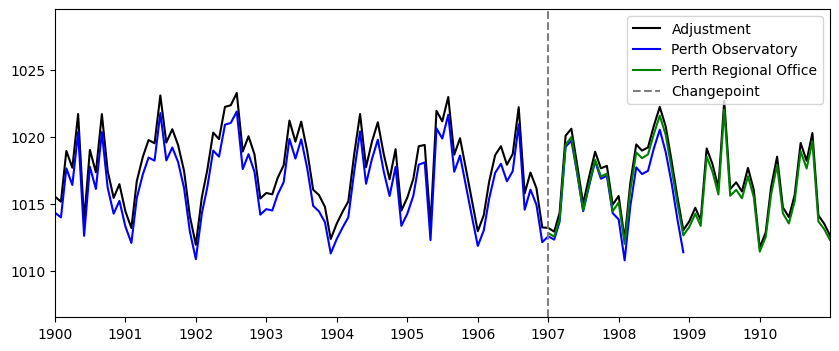

In [54]:

First = PO_MSLP
Second = PRO_MSLP
Updated = Perth_MSLP

# Define your date limits
xlim_L_Y = 1890
xlim_U_Y = 1900
xlim_L = datetime(1900, 1, 1)
xlim_U = datetime(1910, 12, 31)
xlim = [xlim_L, xlim_U]
xlim_Y = [xlim_L_Y , xlim_U_Y ]


xvline =  datetime(1906, 12, 31)
xvline_Y = 1907

#Pressure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
ax=ax1
ax.plot(Updated['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='k', label='Perth')
ax.plot(First['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='b', label='PO')
ax.plot(Second['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='g', label='PRO')

ax.axvline(x=xvline, color='grey', linestyle='--', label='x = 0')
ax.set_xlim(xlim)
ax.legend(['Adjustment','Perth Observatory', 'Perth Regional Office','Changepoint'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\QQM_PRO_PO", dpi=300, bbox_inches='tight')

## 8.5 PRO - PROB Overlap

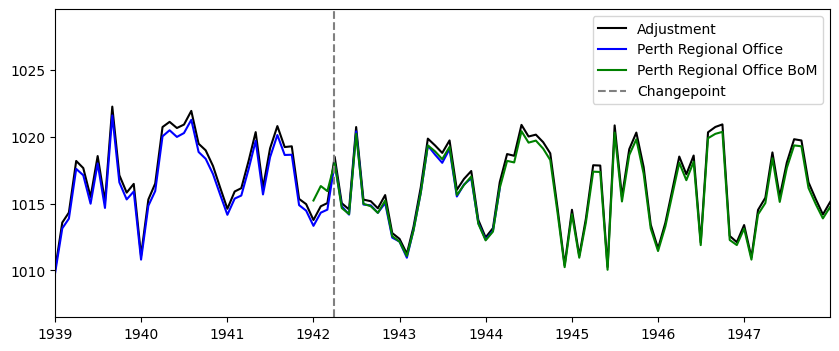

In [55]:
First = PRO_MSLP
Second = PRO_MSLP_B
Updatedv1 = Perth_MSLP

# Define your date limits
xlim_L_Y = 1936
xlim_U_Y = 1951
xlim_L = datetime(1939, 1, 1)
xlim_U = datetime(1947, 12, 31)
xlim = [xlim_L, xlim_U]
xlim_Y = [xlim_L_Y , xlim_U_Y ]


xvline =  datetime(1942, 3, 31)
xvline_Y = 1942

#Pressure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
ax=ax1
ax.plot(Perth_MSLP['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='k', label='Perth v1')
ax.plot(First['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='b', label='PRO')
ax.plot(Second['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2024'], color='g', label='PRO_B')
ax.axvline(x=xvline, color='grey', linestyle='--', label='x = 0')
ax.set_xlim(xlim)
ax.legend(['Adjustment','Perth Regional Office','Perth Regional Office BoM','Changepoint'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\QQM_PROBoM_PRO", dpi=300, bbox_inches='tight')

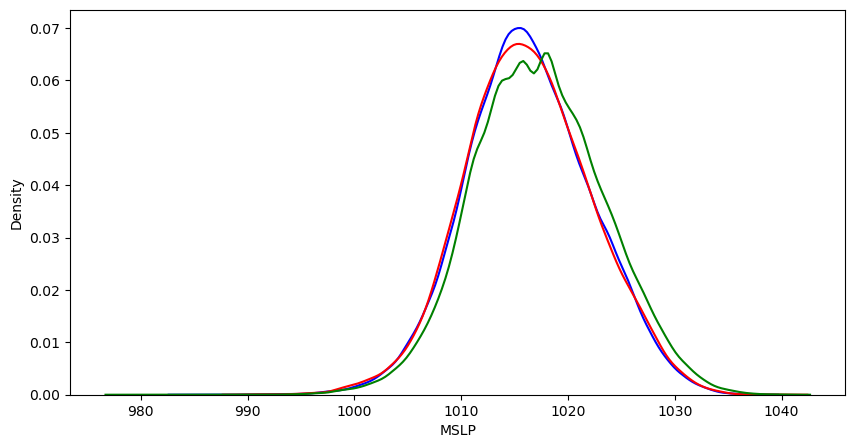

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Add KDE plots (PDFs)
sns.kdeplot(Second['MSLP'].loc['1944-03':], ax=ax, color='blue', label='PDF PRO BOM')
sns.kdeplot(First['MSLP'].loc[:'1944-03'], ax=ax, color='red', label='PDF PRO')
sns.kdeplot(Perth_MSLP['MSLP'].loc[:'1944-03'], ax=ax, color='green', label='PDF ADJUSTED')
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\PDF_PROBoM_PRO", dpi=300, bbox_inches='tight')


## 8.6 PROB - PA Overlap


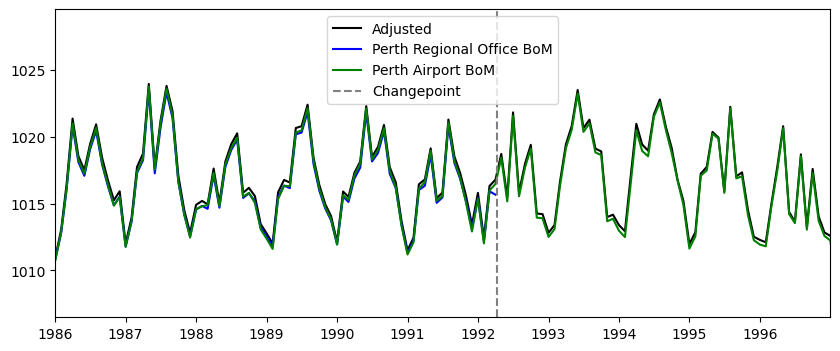

In [90]:
PRO_MSLP_B
PA_MSLP

First = PRO_MSLP_B
Second = PA_MSLP
Updated = Perth_MSLP

# Define your date limits
xlim_L_Y = 1986
xlim_U_Y = 1996
xlim_L = datetime(1986, 1, 1)
xlim_U = datetime(1996, 12, 31)
xlim = [xlim_L, xlim_U]
xlim_Y = [xlim_L_Y , xlim_U_Y ]


xvline =  datetime(1992, 4, 10)
xvline_Y = 1992

#Pressure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
ax=ax1
ax.plot(Updated['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2023'], color='k', label='Perth')
ax.plot(First['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2023'], color='b', label='PRO')
ax.plot(Second['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2023'], color='g', label='PRO_B|')

ax.axvline(x=xvline, color='grey', linestyle='--', label='x = 0')
ax.set_xlim(xlim)
ax.legend(['Adjusted','Perth Regional Office BoM', 'Perth Airport BoM','Changepoint'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\QQM_PA_PROBoM", dpi=300, bbox_inches='tight')


## 8.7 PA - PM Overlap

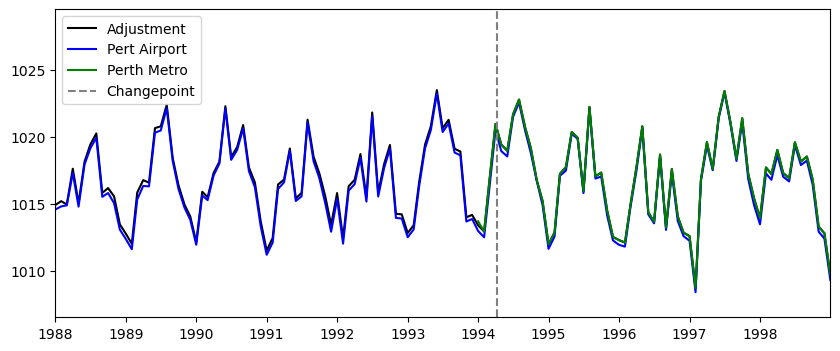

In [91]:
First = PA_MSLP
Second = PM_MSLP
Updated = Perth_MSLP

# Define your date limits
xlim_L_Y = 1988
xlim_U_Y = 1998
xlim_L = datetime(1988, 1, 1)
xlim_U = datetime(1998, 12, 31)
xlim = [xlim_L, xlim_U]
xlim_Y = [xlim_L_Y , xlim_U_Y ]


xvline =  datetime(1994, 4, 10)
xvline_Y = 1994

#Pressure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
ax=ax1
ax.plot(Updated['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2023'], color='k', label='Perth')
ax.plot(First['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2023'], color='b', label='PRO')
ax.plot(Second['MSLP'].resample('D').mean().resample('MS').mean().loc[:'2023'], color='g', label='PRO_B|')

ax.axvline(x=xvline, color='grey', linestyle='--', label='x = 0')
ax.set_xlim(xlim)
ax.legend(['Adjustment','Pert Airport', 'Perth Metro','Changepoint'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\QQM_PM_PA", dpi=300, bbox_inches='tight')


## 8.8 REMOVING ERRANOUS ERRORS

<Axes: xlabel='Date'>

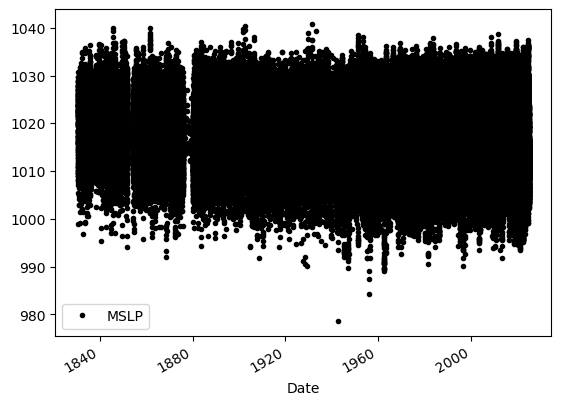

In [92]:
Perth_MSLP[['MSLP']].loc[:'2024'].plot( color='black', marker='.', linestyle='None')


In [93]:
Perth_MSLP[Perth_MSLP['MSLP'] <= 985]

PRO_MSLP_B[PRO_MSLP_B['MSLP'] <= 985]


PRO_MSLP.loc['1942-09-04']

MSLP
Date                       
1942-09-04 09:00:00  1016.6
1942-09-04 15:00:00  1016.7

# 9. RH TEST ASSUMPTIONS


Due to the datasets that we have used to combine a sub-daily pressure dataset from 1880 to 2024, we want to ensure that the RHTest only FIXES the parts of the record where metadata exists.


Therefore,
All changepoints and metadata that has been identified in the BoM record are required to be check as if they are homgenous, if the Type 0 is NO, it is sugggested homogenous and if a majority of the sub-daily hours are also displaying no, we expect them to not be a non-climatic statistical change.

We will first go over the main dataset, with the monthlies, then look at each sub-daily hour

# 10. Method of RHTest
StartGUI
Convert Da

1. Call FindU, assess whether Type 1 changes are actual non-climatic shifts in the metadata
2. Go to 5. if no metadata or any metadata supported, otherwise call FindUD
3. Call StepSize to assess signficance of the retained parameters, retain all Type 0 changepoints with metadata support and all Type 1 changepoints, change Type 1 to 0 if metadata exists
4. If within a reasonable time, like up to 1.5 years maximum, change the date on the mcs file, if not add it
5. Change dates where metadata is to showcase recent month
6. Analyse mCs file and delete smallest shift if it is stat or subjectively not significant, that are not supported by metadata and not significant
7. Call StepSize to resease and repeat 5 and 6 until each changepoint is significant
8. Once happy, apply QMadj onto the dataset for daily series


Type 0 - only significant only if they are supported by metadata: to identify all Type-0 changepoints (i.e.,
changepoints that could be significant only if they are supported by metadata)
Type 1 - check to see if its non-climatic in other datasets both same type and different 

(1) “Yes” (significant); 
(2) “No” (not significant for the changepoint type given in the first column); 
(3) “?” (may or may not be significant for the type given in the first column) 
(4) “YifD” (significant if it is documented, i.e., supported by reliable metadata).

1st 2nd   3rd     4th                  5th      6th         7th        8th
0 YifD  18640900 (1.0000-    1.0000) 0.950   13.3349 (   13.0801-   16.7646)

first column (the1’s) is an index indicating these are Type-1 changepoints (also indicated by the “1Cs” in the filename).
second column indicates whether or not the changepoint is statistically significant for the changepoint type given
third column lists the changepoint dates YYYYMMDD,
fourth column (in parentheses) are
the 95% confidence interval of the p-value
nominal p-value (confidence level) is given in the fifth column.
6t, 7th, 8th three columns are the PFmax statistics and the 95% confidence  interval of the PFmax percentiles that correspond to the nominal confidence level,

one needs to
compare the p-value (if it is Type-0) or PFmax statistic (if it is Type-1) of the smallest
shift with the corresponding 95% uncertainty range. This
if its p-value or the PFmax statistic is larger than the
corresponding upper bound, and to be not significant if it is smaller than the lower
bound. However, if the p-value or the PFmax statistic lies within the corresponding
95% uncertainty range, one has to determine subjectively whether or not to take
this changepoint as significant (viewing the plot in OutFile_F.pdf or OutFile_U.pdf
could help here); this is due to the


However, it could happen that metadata support is not found for
some of the Type-0 changepoints identified; in this case, all the un-supported Type-0
changepoints should be deleted from the list (see the example in section 3.3 below).

# 11.  ALL KNOWN METADATA
1854-01
1876-01
1880-01
1885-01
1887-07
1897-01
1907-01
1942-04
1942-10
1967-07
1967-06
1992-04
1993-03
1994-01
2012-04










1854-01 - BEGIN OF DATASET 2 SWR 3 YEAR GAP AFTER THIS DATE
0 No    18511000 (    0.7888-    0.7921) 0.950    1.6359 (   11.4280-   13.3217)

1876-01 - OM SWR-PGm
0 No    18751200 (    0.9368-    0.9410) 0.950    3.8395 (   11.6198-   13.5622)

1880-01 - QQM PGm-PG
0 No    18800100 (    0.8174-    0.8228) 0.950    1.8471 (   11.0946-   12.9020)

1885-01 - MC PG/PGm IT WAS A HEIGHT CHANGE
0 YifD  18850100 (    0.9979-    0.9980) 0.950   10.1225 (   11.4795-   13.3862)

1887-07 - ANOTHER H CHANGE IN PG
0 YifD  18870700 (    0.9979-    0.9980) 0.950   10.1225 (   11.4795-   13.3862)

1897-01 - QQM PG-PO
0 No    18970100 (    0.4889-    0.4969) 0.950    0.4301 (   11.6251-   13.5689)

1907-01 - QQM PO-PRO
0 No    19070100 (    0.9133-    0.9156) 0.950    3.0184 (   11.5258-   13.4443)

1942-04 - MC PRO WE KNOW THAT IN FEB IT WAS THE SAME, MARCH MIGHT HAVE BEEN DIFFERENT BUT APRIL DEFINITELY HAD RECORDED THE HEIGHT CHANGE AND QQM PRO-PROB
0 Yes   19420400 (    0.9967-    0.9967) 0.950   13.0324 (    3.5573-    4.0038)

1942-10 - FORTIN TO KEW PATTERN CHANGE PRO BoM and PRO
0 Yes   19421000 (    0.9967-    0.9967) 0.950   13.0324 (    3.5573-    4.0038)

1967-07 - MC HEIGHT CHANGE
0 No    19670600 (    0.7715-    0.7764) 0.950    1.5938 (   11.7351-   13.7146)

1992-04 - QQM PROB-PA
0 No    19920400 (    0.5535-    0.5757) 0.950    0.6240 (   11.5309-   13.4507)

1993-03 - MC PA CHANGE IN LOCATION AND DRECORDING
0 No    19930300 (    0.9093-    0.9233) 0.950    3.5661 (    5.2414-    5.9161)

1994-01 - QQM PA-PM
0 No    19940100 (    0.9432-    0.9446) 0.950    3.9578 (   10.3257-   11.9297)

2012-04 - MC PM CHANGE IN MEASUREMENT
0 No    20120400 (    0.6363-    0.6382) 0.950    0.8403 (   11.6967-   13.6601)




# 12. RH-TESTING THE DATASET ON A MONTHLY SCALE

## 12.1 on a monthlies

In [95]:
outpath = "C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/"

#Split it:

#MONTHLY AVERAGE
PER_M1 = ChatJR.rh_fmt_row_month_mean_via_WMO_Guide(Perth_MSLP.loc[:'1875'].resample('D').mean())

PER_M2 = ChatJR.rh_fmt_row_month_mean_via_WMO_Guide(Perth_MSLP.loc['1880':].resample('D').mean())

PER_M3 = ChatJR.rh_fmt_row_month_mean_all(Perth_MSLP.loc['1876':'1879'].resample('MS').mean())

#combine the 3 datasets together
PER_M = pd.concat([PER_M1,PER_M3,PER_M2],axis = 0).reset_index(drop = True)
PER_M.to_csv(outpath + f'PERTH_M_' + str(PER_M['year'][0]) + '-' + str(PER_M['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)
PER_M

FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",
FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


year  month  day    MSLP
0     1830      6    0  1023.2
1     1830      7    0  1017.8
2     1830      8    0  1018.4
3     1830      9    0  1022.2
4     1830     10    0  1018.0
...    ...    ...  ...     ...
2330  2024      8    0  1016.3
2331  2024      9    0  1021.2
2332  2024     10    0  1016.7
2333  2024     11    0  1014.9
2334  2024     12    0  1011.5

[2335 rows x 4 columns]

In [ ]:
'''
19 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M_1830-2024.dat 
1 No    18321000 (    0.9989-    0.9990) 0.950   10.9797 (   12.3028-   14.3653)
1 Yes   18560400 (    1.0000-    1.0000) 0.950   35.6404 (   12.4991-   14.6234)
0 YifD  18760100 (    0.9902-    0.9911) 0.950    7.4370 (   12.3209-   14.3875)
0 No    18800100 (    0.8203-    0.8254) 0.950    1.8813 (   11.7182-   13.6342)
0 No    18850100 (    0.8553-    0.8656) 0.950    2.4005 (   11.5944-   13.4757)
0 No    18870700 (    0.0959-    0.1126) 0.950    0.0118 (   11.9132-   13.8834)
0 No    18970100 (    0.5296-    0.5343) 0.950    0.5099 (   12.2217-   14.2656)
0 No    19070100 (    0.9218-    0.9231) 0.950    3.1614 (   12.1824-   14.2172)
0 Yes   19150500 (    1.0000-    1.0000) 0.950   26.9103 (   11.8753-   13.8349)
0 Yes   19180600 (    1.0000-    1.0000) 0.950   21.9853 (   12.3879-   14.4724)
0 YifD  19420400 (    0.9935-    0.9945) 0.950    8.0820 (   12.6037-   14.7648)
0 No    19670600 (    0.4560-    0.4726) 0.950    0.3607 (   12.5780-   14.7302)
0 No    19920400 (    0.5103-    0.5373) 0.950    0.5572 (   12.1290-   14.1514)
0 No    19930300 (    0.9049-    0.9197) 0.950    3.5967 (    5.4812-    6.1808)
0 YifD  19940100 (    0.9730-    0.9732) 0.950    4.7574 (   12.0432-   14.0454)
0 YifD  20071200 (    0.9715-    0.9744) 0.950    4.5505 (   12.0179-   14.0141)
0 No    20080300 (    0.8250-    0.8389) 0.950    2.0768 (   10.7256-   12.3859)
0 No    20110700 (    0.7633-    0.7675) 0.950    1.5196 (   10.9545-   12.6812)
0 YifD  20120400 (    0.9737-    0.9741) 0.950    4.8651 (   11.9854-   13.9740)
'''


In [ ]:
'''
1 No    18321000 (    0.9994-    0.9994) 0.950   12.0384 (   12.3444-   14.4132)
1 Yes   18560400 (    1.0000-    1.0000) 0.950   29.3445 (   12.5421-   14.6726)
0 YifD  18760100 (    0.9942-    0.9948) 0.950    8.4900 (   12.3626-   14.4355)
0 No    18800100 (    0.8069-    0.8126) 0.950    1.7751 (   11.7570-   13.6793)
0 No    18850100 (    0.8685-    0.8780) 0.950    2.5616 (   11.6322-   13.5199)
0 No    18870700 (    0.1575-    0.1757) 0.950    0.0363 (   11.9530-   13.9295)
0 No    18970100 (    0.3573-    0.3597) 0.950    0.2126 (   12.2628-   14.3131)
0 No    19070100 (    0.8910-    0.8933) 0.950    2.6369 (   12.2233-   14.2644)
1 Yes   19150500 (    1.0000-    1.0000) 0.950   25.9120 (   11.9149-   13.8808)
1 Yes   19180600 (    1.0000-    1.0000) 0.950   23.0090 (   12.4301-   14.5209)
0 YifD  19420400 (    0.9999-    0.9999) 0.950   13.9228 (   12.3930-   14.4726)
0 YifD  19421000 (    0.9965-    0.9967) 0.950    7.5791 (   12.4119-   14.4961)
0 No    19670700 (    0.1892-    0.3100) 0.950   -0.0131 (   12.6178-   14.7750)
0 No    19920400 (    0.3232-    0.3514) 0.950    0.2090 (   12.4165-   14.5023)
0 No    19930300 (    0.9055-    0.9201) 0.950    3.6092 (    5.4955-    6.1972)
0 YifD  19940100 (    0.9756-    0.9763) 0.950    4.7669 (   12.2487-   14.2957)
0 No    20120400 (    0.6953-    0.7003) 0.950    1.1068 (   12.4739-   14.5803)

1 Yes   18560400 (    1.0000-    1.0000) 0.950   71.9788 (   12.9829-   15.1827)
0 YifD  18760100 (    0.9988-    0.9989) 0.950   11.0928 (   13.0491-   15.2709)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   23.1714 (   13.1035-   15.3456)
0 YifD  19420400 (    0.9999-    0.9999) 0.950   12.1832 (   12.9394-   15.1248)
0 YifD  19421000 (    0.9978-    0.9978) 0.950    7.3850 (   13.0547-   15.2786)
0 YifD  19940100 (    0.9687-    0.9688) 0.950    4.7601 (   13.1570-   15.4192)
'''

In [96]:

#PRIOR TO WMO Guidelines
'''
17 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M_1830-2024.dat 
1 No    18321000 (    0.9993-    0.9994) 0.950   11.9054 (   12.3526-   14.4251)
1 Yes   18560400 (    1.0000-    1.0000) 0.950   31.7967 (   12.5494-   14.6832)
0 YifD  18760100 (    0.9949-    0.9954) 0.950    8.7052 (   12.3668-   14.4424)
0 No    18800100 (    0.8054-    0.8113) 0.950    1.7657 (   11.7646-   13.6904)
0 No    18850100 (    0.8655-    0.8753) 0.950    2.5271 (   11.6397-   13.5309)
0 No    18870700 (    0.1449-    0.1632) 0.950    0.0303 (   11.9608-   13.9409)
0 No    18970100 (    0.3853-    0.3878) 0.950    0.2503 (   12.2709-   14.3248)
0 No    19070100 (    0.8934-    0.8957) 0.950    2.6727 (   12.2314-   14.2761)
1 Yes   19150500 (    1.0000-    1.0000) 0.950   26.1093 (   11.9227-   13.8922)
1 Yes   19180600 (    1.0000-    1.0000) 0.950   22.6403 (   12.4384-   14.5329)
0 YifD  19420400 (    0.9999-    0.9999) 0.950   13.9030 (   12.4012-   14.4846)
0 YifD  19421000 (    0.9962-    0.9964) 0.950    7.4810 (   12.4202-   14.5081)
0 No    19670700 (    0.1648-    0.2846) 0.950   -0.0192 (   12.6264-   14.7873)
0 No    19920400 (    0.3401-    0.3679) 0.950    0.2300 (   12.4247-   14.5143)
0 No    19930300 (    0.9058-    0.9203) 0.950    3.6158 (    5.4983-    6.2013)
0 YifD  19940100 (    0.9761-    0.9768) 0.950    4.8007 (   12.2568-   14.3074)
0 No    20120400 (    0.6716-    0.6772) 0.950    1.0075 (   12.4822-   14.5924)



6 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M_1830-2024.dat 
1 Yes   18560400 (    1.0000-    1.0000) 0.950   75.1642 (   12.9901-   15.1941)
0 YifD  18760100 (    0.9992-    0.9992) 0.950   11.8097 (   13.0567-   15.2828)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   23.2325 (   13.1120-   15.3589)
0 YifD  19420400 (    0.9999-    0.9999) 0.950   12.1376 (   12.9478-   15.1378)
0 YifD  19421000 (    0.9977-    0.9977) 0.950    7.3324 (   13.0633-   15.2918)
0 YifD  19940100 (    0.9691-    0.9692) 0.950    4.7684 (   13.1656-   15.4326)


Based on everything we have found:
'''

'\n17 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M_1830-2024.dat \n1 No    18321000 (    0.9993-    0.9994) 0.950   11.9054 (   12.3526-   14.4251)\n1 Yes   18560400 (    1.0000-    1.0000) 0.950   31.7967 (   12.5494-   14.6832)\n0 YifD  18760100 (    0.9949-    0.9954) 0.950    8.7052 (   12.3668-   14.4424)\n0 No    18800100 (    0.8054-    0.8113) 0.950    1.7657 (   11.7646-   13.6904)\n0 No    18850100 (    0.8655-    0.8753) 0.950    2.5271 (   11.6397-   13.5309)\n0 No    18870700 (    0.1449-    0.1632) 0.950    0.0303 (   11.9608-   13.9409)\n0 No    18970100 (    0.3853-    0.3878) 0.950    0.2503 (   12.2709-   14.3248)\n0 No    19070100 (    0.8934-    0.8957) 0.950    2.6727 (   12.2314-   14.2761)\n1 Yes   19150500 (    1.0000-    1.0000) 0.950   26.1093 (   11.9227-   13.8922)\n1 Yes   19180600 (    1.0000-    1.0000) 0.950   22.6403 (   12.4384-   14.5329)\n0 YifD  19420400 (    0.9999-    0.9999) 0.950   13.9030 (

In [97]:
## 11.2 on a sub-dailies

In [98]:
#SUBDAILY DATA MONTHLY AVERAGEZZZZ
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
    print(i)
    if i == 0:
        PER_M = ChatJR.rh_fmt_row_month_mean_via_WMO_Guide(Perth_MSLP[Perth_MSLP.index.hour == i].loc['1880':])
        PER_M.to_csv(outpath + f'PERTH_M{i}_' + str(PER_M['year'][0]) + '-' + str(PER_M['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)

        #Subdaily Datasets
        PER_D = ChatJR.rh_fmt_row_day_mean(Perth_MSLP[Perth_MSLP.index.hour == i].loc['1880':])
        PER_D.to_csv(outpath + f'PERTH_D{i}_' + str(PER_D['year'][0]) + '-' + str(PER_D['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)

    else:
        PER_M = ChatJR.rh_fmt_row_month_mean_via_WMO_Guide(Perth_MSLP[Perth_MSLP.index.hour == i])
        PER_M.to_csv(outpath + f'PERTH_M{i}_' + str(PER_M['year'][0]) + '-' + str(PER_M['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)

        #Subdaily Datasets
        PER_D = ChatJR.rh_fmt_row_day_mean(Perth_MSLP[Perth_MSLP.index.hour == i])
        PER_D.to_csv(outpath + f'PERTH_D{i}_' + str(PER_D['year'][0]) + '-' + str(PER_D['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)


0


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


1


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


2


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


3


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


4


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


5


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


6


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",
FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


7
8


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


9


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


10


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


11


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


12


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


13


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


14


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


15


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


16


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


17


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


18


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


19


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


20


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


21


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


22


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


23


FUNCTION_LIST.ipynb:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "    - months (list of int): List of months to filter for (e.g., [1, 2, 3] for Jan, Feb, Mar).\n",


In [99]:
'''
HOUR 15
1 Yes   18590700 (    1.0000-    1.0000) 0.950   56.1061 (   12.5228-   14.6899)
0 No    18751200 (    0.8585-    0.8623) 0.950    1.8659 (   12.1039-   14.1549)
0 No    18800100 (    0.9076-    0.9077) 0.950    2.6335 (   11.2504-   13.0823)
0 No    18850100 (    0.7402-    0.7520) 0.950    1.4184 (   11.6073-   13.5244)
0 No    18870700 (    0.7743-    0.7826) 0.950    1.5175 (   11.9214-   13.9272)
0 No    18970100 (    0.7640-    0.7651) 0.950    1.4061 (   12.2329-   14.3144)
0 Yes   19070100 (    0.9998-    0.9998) 0.950   15.2837 (   12.5585-   14.7383)
0 YifD  19420400 (    0.9995-    0.9995) 0.950   10.2027 (   12.4897-   14.6449)
0 YifD  19421000 (    0.9929-    0.9934) 0.950    6.4957 (   12.3833-   14.4998)
0 No    19670600 (    0.0000-    0.0000) 0.950    0.0000 (   12.5892-   14.7800)
0 No    19920400 (    0.4572-    0.4828) 0.950    0.4108 (   12.3896-   14.5085)
0 No    19930300 (    0.8962-    0.9119) 0.950    3.4026 (    5.4861-    6.1989)
0 YifD  19940100 (    0.9846-    0.9846) 0.950    5.7311 (   12.0570-   14.0967)
0 YifD  20071200 (    0.9669-    0.9701) 0.950    4.2961 (   12.0317-   14.0654)
0 No    20080300 (    0.7985-    0.8142) 0.950    1.8521 (   10.7371-   12.4286)
0 No    20110700 (    0.8366-    0.8423) 0.950    2.1542 (   10.9663-   12.7258)
0 YifD  20120400 (    0.9847-    0.9852) 0.950    5.8497 (   11.9991-   14.0251)

5 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M15_1830-2024.dat 
1 Yes   18590700 (    1.0000-    1.0000) 0.950   99.7769 (   12.8454-   15.0665)
0 Yes   18850100 (    1.0000-    1.0000) 0.950   28.1487 (   12.8254-   15.0396)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   22.5900 (   12.9036-   15.1453)
0 YifD  19420400 (    0.9991-    0.9991) 0.950    9.2465 (   12.7727-   14.9689)
0 YifD  19421000 (    0.9988-    0.9988) 0.950    7.5595 (   12.9879-   15.2610)

However after careful consideration, and with reference to differences with 3pm and the original, to ensure homogeniety, we added back into 
1885-01 and 1887-07, refer to figures in supplement data. Also 2007 has been indicated as a YifD, however we know that the BoM and the instruments they
use are the highest quality and that data is statistically tested after 1992. So we can determine this to not be an impact and remove from the RHTest

7 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M15_1830-2024.dat 
1 Yes   18590700 (    1.0000-    1.0000) 0.950   95.5373 (   12.7932-   14.9992)
0 No    18800100 (    0.4985-    0.5077) 0.950    0.4611 (   12.5398-   14.6715)
0 No    18850100 (    0.7653-    0.7797) 0.950    1.6203 (   11.8444-   13.8008)
PERTH_METRO_PRESSURE_CORRECTED_MONTHLY_18300 Yes   19070100 (    1.0000-    1.0000) 0.950   23.4864 (   12.8805-   15.1170)
0 YifD  19420400 (    0.9991-    0.9991) 0.950    9.2005 (   12.7581-   14.9522)
0 YifD  19421000 (    0.9988-    0.9988) 0.950    7.5759 (   12.9729-   15.2438)
'''


'\nHOUR 15\n1 Yes   18590700 (    1.0000-    1.0000) 0.950   56.1061 (   12.5228-   14.6899)\n0 No    18751200 (    0.8585-    0.8623) 0.950    1.8659 (   12.1039-   14.1549)\n0 No    18800100 (    0.9076-    0.9077) 0.950    2.6335 (   11.2504-   13.0823)\n0 No    18850100 (    0.7402-    0.7520) 0.950    1.4184 (   11.6073-   13.5244)\n0 No    18870700 (    0.7743-    0.7826) 0.950    1.5175 (   11.9214-   13.9272)\n0 No    18970100 (    0.7640-    0.7651) 0.950    1.4061 (   12.2329-   14.3144)\n0 Yes   19070100 (    0.9998-    0.9998) 0.950   15.2837 (   12.5585-   14.7383)\n0 YifD  19420400 (    0.9995-    0.9995) 0.950   10.2027 (   12.4897-   14.6449)\n0 YifD  19421000 (    0.9929-    0.9934) 0.950    6.4957 (   12.3833-   14.4998)\n0 No    19670600 (    0.0000-    0.0000) 0.950    0.0000 (   12.5892-   14.7800)\n0 No    19920400 (    0.4572-    0.4828) 0.950    0.4108 (   12.3896-   14.5085)\n0 No    19930300 (    0.8962-    0.9119) 0.950    3.4026 (    5.4861-    6.1989)\n0 Yi

In [100]:
'''
HOUR 0
0 No    19420400 (    0.6422-    0.6714) 0.950    1.3569 (    1.5128-    1.8137)
0 YifD  19421000 (    0.9979-    0.9982) 0.950    8.7438 (   12.5813-   15.9972)
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.8511-   16.3985)
0 No    19920400 (    0.4219-    0.4573) 0.950    0.3674 (   12.6669-   16.1129)
0 No    19930300 (    0.8900-    0.9123) 0.950    3.4282 (    5.5805-    6.7230)
0 No    19940100 (    0.0048-    0.0261) 0.950   -0.0008 (    9.2158-   11.2854)
1 No    19950600 (    0.9988-    0.9989) 0.950   10.4354 (   12.4638-   15.8363)
0 No    20120400 (    0.5711-    0.5831) 0.950    0.6795 (   12.7107-   16.1823)

-We identified that Cape Leeuwin, Cape Otway and a drop in rainfall during these few years, we concluded that the Type 1 change can be removed from the 
dataset, it also does not align with the monthlys as that stats 1994-04, however the apparent non-climatic change occurs in 1995-06 

0 YifD  19421000 (    0.9997-    0.9997) 0.950    9.3968 (   13.3962-   17.1341)
'''
'''
HOUR 3
0 No    19420400 (    0.6251-    0.6471) 0.950    1.1818 (    1.4995-    1.7981)
0 YifD  19421000 (    0.9983-    0.9985) 0.950    9.0865 (   12.4327-   15.8115)
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.6977-   16.2064)
0 No    19920400 (    0.4882-    0.5187) 0.950    0.4793 (   12.5183-   15.9296)
0 No    19930300 (    0.9118-    0.9312) 0.950    3.9135 (    5.5301-    6.6635)
0 No    19940100 (    0.0149-    0.0429) 0.950    0.0040 (    9.1248-   11.1762)
1 No    19950600 (    0.9991-    0.9992) 0.950   10.9371 (   12.3194-   15.6564)
0 No    20120400 (    0.5018-    0.5123) 0.950    0.4983 (   12.5610-   15.9968)

0 YifD  19421000 (    0.9998-    0.9998) 0.950   10.0007 (   13.2482-   16.9485)
'''
'''
HOUR 6
0 No    19420400 (    0.6255-    0.6518) 0.950    1.2230 (    1.5038-    1.8033)
0 YifD  19421000 (    0.9973-    0.9974) 0.950    8.1287 (   12.4807-   15.8729)
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.7477-   16.2705)
0 No    19920400 (    0.3671-    0.4027) 0.950    0.2759 (   12.5670-   15.9911)
0 No    19930300 (    0.8962-    0.9171) 0.950    3.5232 (    5.5466-    6.6834)
0 YifD  19940100 (    0.9520-    0.9541) 0.950    3.6509 (   12.3955-   15.7562)
0 No    20120400 (    0.7529-    0.7656) 0.950    1.4741 (   12.6260-   16.0841)

Mid way through, 6am doesnt recognise 1995 as a type 1 abd 1993 as a type 0 sig point
0 No    19420400 (    0.6251-    0.6515) 0.950    1.2269 (    1.5145-    1.8161)
0 YifD  19421000 (    0.9988-    0.9988) 0.950    8.3501 (   12.8871-   16.4529)
0 No    19940100 (    0.8806-    0.8812) 0.950    2.4819 (   12.9949-   16.6224)

0 YifD  19421000 (    0.9990-    0.9991) 0.950    7.9901 (   13.0300-   16.6681)
'''
'''
HOUR 9
1 Yes   18590700 (    1.0000-    1.0000) 0.950   41.3104 (   12.2568-   14.3659)
0 No    18751200 (    0.7715-    0.7754) 0.950    1.2418 (   11.8553-   13.8484)
0 No    18800100 (    0.9147-    0.9157) 0.950    2.7966 (   11.0071-   12.7796)
0 No    18850100 (    0.9015-    0.9068) 0.950    2.9819 (   11.3557-   13.2160)
0 No    18870700 (    0.7376-    0.7416) 0.950    1.3648 (   11.6759-   13.6238)
0 No    18970100 (    0.3193-    0.3262) 0.950    0.1650 (   11.9760-   13.9984)
0 ?     19070100 (    0.9497-    0.9505) 0.950    3.9061 (   11.9379-   13.9511)
1 Yes   19150500 (    1.0000-    1.0000) 0.950   26.4749 (   11.6392-   13.5766)
1 Yes   19180600 (    1.0000-    1.0000) 0.950   17.4753 (   12.1354-   14.1991)
0 YifD  19420400 (    0.9998-    0.9998) 0.950   12.6110 (   12.1002-   14.1526)
0 YifD  19421000 (    0.9908-    0.9914) 0.950    6.0763 (   12.1182-   14.1752)
0 No    19670700 (    0.3540-    0.3664) 0.950    0.2342 (   12.3142-   14.4443)
0 No    19920400 (    0.5226-    0.5410) 0.950    0.5233 (   12.1225-   14.1812)
0 No    19930300 (    0.9172-    0.9302) 0.950    3.8322 (    5.3925-    6.0887)
0 YifD  19940100 (    0.9788-    0.9795) 0.950    5.0121 (   11.9624-   13.9815)
0 No    20120400 (    0.4770-    0.4890) 0.950    0.4554 (   12.1767-   14.2562)



1 Yes   18590700 (    1.0000-    1.0000) 0.950   74.7472 (   12.6074-   14.7782)
0 Yes   18800100 (    1.0000-    1.0000) 0.950   43.7611 (   12.6190-   14.7939)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   30.8676 (   12.7103-   14.9175)
0 YifD  19420400 (    0.9994-    0.9994) 0.950    9.9413 (   12.5666-   14.7230)
0 YifD  19421000 (    0.9979-    0.9979) 0.950    6.8740 (   12.7767-   15.0076)

However after careful consideration, and with reference to differences with 3pm and the original, to ensure homogeniety, we added back into 
1885-01 and 1887-07, refer to figures in supplement data

7 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M9_1830-2024.dat 
1 Yes   18560400 (    1.0000-    1.0000) 0.950   69.1396 (   12.6048-   14.7752)
0 YifD  18800100 (    0.9937-    0.9940) 0.950    8.2146 (   12.4279-   14.5387)
0 No    18850100 (    0.9074-    0.9140) 0.950    3.1491 (   11.6629-   13.5804)
0 No    18870700 (    0.7660-    0.7731) 0.950    1.5249 (   12.3810-   14.4812)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   30.0742 (   12.6835-   14.8818)
0 YifD  19420400 (    0.9994-    0.9994) 0.950    9.9510 (   12.5639-   14.7199)
0 YifD  19421000 (    0.9979-    0.9979) 0.950    6.8964 (   12.7739-   15.0045)
'''
'''
HOUR 12
0 No    19420400 (    0.4516-    0.4703) 0.950    0.5405 (    1.2548-    1.4994)
0 YifD  19421100 (    0.9542-    0.9584) 0.950    3.6104 (   12.5788-   15.9285)
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.7934-   16.2557)
0 No    19920400 (    0.4002-    0.4433) 0.950    0.3450 (   12.5885-   15.9430)
0 No    19930300 (    0.8866-    0.9093) 0.950    3.3515 (    5.5539-    6.6678)
0 YifD  19940100 (    0.9848-    0.9855) 0.950    5.5410 (   12.4164-   15.7087)
0 No    20120400 (    0.6896-    0.7089) 0.950    1.1738 (   12.6477-   16.0352)

1942 is missing 09 and 10, so we changed to the more modern month, 1942-11
0 YifD  19421100 (    0.9625-    0.9633) 0.950    3.1069 (   13.1431-   16.7368)
'''
'''
HOUR 15
1 Yes   18590700 (    1.0000-    1.0000) 0.950   54.9947 (   12.6529-   14.8388)
0 No    18751200 (    0.8530-    0.8571) 0.950    1.8186 (   12.2264-   14.2962)
0 No    18800100 (    0.9069-    0.9069) 0.950    2.6215 (   11.3588-   13.2097)
0 No    18850100 (    0.7534-    0.7650) 0.950    1.5033 (   11.7217-   13.6578)
0 No    18870700 (    0.7965-    0.8043) 0.950    1.6696 (   12.0415-   14.0663)
0 No    18970100 (    0.7157-    0.7172) 0.950    1.1501 (   12.3572-   14.4575)
0 YifD  19070100 (    0.9997-    0.9997) 0.950   14.3838 (   12.6892-   14.8878)
0 YifD  19420400 (    0.9994-    0.9995) 0.950    9.9965 (   12.6192-   14.7932)
0 YifD  19421000 (    0.9938-    0.9942) 0.950    6.7075 (   12.5113-   14.6470)
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.7205-   14.9301)
0 No    19920400 (    0.4143-    0.4415) 0.950    0.3401 (   12.5160-   14.6533)
0 No    19930300 (    0.8953-    0.9112) 0.950    3.4055 (    5.5293-    6.2485)
0 YifD  19940100 (    0.9889-    0.9893) 0.950    6.0935 (   12.3458-   14.4434)
0 No    20120400 (    0.3380-    0.3504) 0.950    0.2253 (   12.5745-   14.7326)

1 Yes   18590700 (    1.0000-    1.0000) 0.950  100.0696 (   12.8446-   15.0656)
0 Yes   18850100 (    1.0000-    1.0000) 0.950   28.3015 (   12.8246-   15.0387)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   22.5821 (   12.9028-   15.1444)
0 YifD  19420400 (    0.9991-    0.9991) 0.950    9.2283 (   12.7719-   14.9679)
0 YifD  19421000 (    0.9988-    0.9988) 0.950    7.5510 (   12.9871-   15.2600)

However after careful consideration, and with reference to differences with 3pm and the original, to ensure homogeniety, we added back into 
1885-01 and 1887-07, refer to figures in supplement data

7 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M9_1830-2024.dat 
1 Yes   18590700 (    1.0000-    1.0000) 0.950   95.5967 (   12.7924-   14.9983)
0 No    18800100 (    0.4766-    0.4864) 0.950    0.4142 (   12.5391-   14.6706)
0 No    18850100 (    0.7692-    0.7834) 0.950    1.6468 (   11.8437-   13.8000)
0 No    18870700 (    0.7601-    0.7686) 0.950    1.3731 (   12.5664-   14.7040)
0 Yes   19070100 (    1.0000-    1.0000) 0.950   23.5305 (   12.8797-   15.1161)
0 YifD  19420400 (    0.9991-    0.9991) 0.950    9.1832 (   12.7574-   14.9513)
0 YifD  19421000 (    0.9988-    0.9988) 0.950    7.5671 (   12.9721-   15.2428)

'''
'''
HOUR 18 and 21
18
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.9294-   16.4986)
0 No    19920400 (    0.2504-    0.3014) 0.950    0.1602 (   12.7351-   16.1968)
0 No    19930300 (    0.8531-    0.8798) 0.950    2.8088 (    5.6037-    6.7503)
0 ?     19940100 (    0.9486-    0.9507) 0.950    3.5306 (   12.5594-   15.9593)
0 No    20120400 (    0.7311-    0.7510) 0.950    1.4057 (   12.7958-   16.2931)

21
0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   13.7327-   18.0881)
0 No    19920400 (    0.1383-    0.2083) 0.950    0.0895 (   13.6969-   18.0286)
0 No    19930300 (    0.8715-    0.8988) 0.950    3.2560 (    5.9290-    7.3189)
0 No    19940100 (    0.9131-    0.9168) 0.950    2.6709 (   13.5082-   17.7507)
0 No    20120400 (    0.9144-    0.9271) 0.950    3.4245 (   13.7674-   18.1458)


0 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M21_1964-2024.dat 
'''

'\nHOUR 18 and 21\n18\n0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   12.9294-   16.4986)\n0 No    19920400 (    0.2504-    0.3014) 0.950    0.1602 (   12.7351-   16.1968)\n0 No    19930300 (    0.8531-    0.8798) 0.950    2.8088 (    5.6037-    6.7503)\n0 ?     19940100 (    0.9486-    0.9507) 0.950    3.5306 (   12.5594-   15.9593)\n0 No    20120400 (    0.7311-    0.7510) 0.950    1.4057 (   12.7958-   16.2931)\n\n21\n0 No    19670700 (    0.0000-    0.0000) 0.950    0.0000 (   13.7327-   18.0881)\n0 No    19920400 (    0.1383-    0.2083) 0.950    0.0895 (   13.6969-   18.0286)\n0 No    19930300 (    0.8715-    0.8988) 0.950    3.2560 (    5.9290-    7.3189)\n0 No    19940100 (    0.9131-    0.9168) 0.950    2.6709 (   13.5082-   17.7507)\n0 No    20120400 (    0.9144-    0.9271) 0.950    3.4245 (   13.7674-   18.1458)\n\n\n0 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH_M21_1964-2024.dat \n'

## 11.3 IMPACT THESE HAVE ON THE DATASET 1880s

In [101]:
#Original Dataset

P9 = Perth_MSLP[Perth_MSLP.index.hour == 9].round(1)
P9['date'] = P9.index.date
P9 = P9.set_index('date')
P9.index = pd.to_datetime(P9.index,dayfirst = True)

P15 = Perth_MSLP[Perth_MSLP.index.hour == 15].round(1)
P15['date'] = P15.index.date
P15 = P15.set_index('date')
P15.index = pd.to_datetime(P15.index,dayfirst = True)

DIFF= (P15-P9)
DIFF.index = pd.to_datetime(DIFF.index,dayfirst = True)

DIFF_M = DIFF.resample('MS').mean()
DIFF_Y = DIFF_M.resample('YS').mean()
DIFF_Y

MSLP
date                
1830-01-01 -1.327321
1831-01-01 -1.238062
1832-01-01 -0.994737
1833-01-01 -1.095878
1834-01-01 -1.284308
...              ...
2020-01-01 -2.333914
2021-01-01 -2.359693
2022-01-01 -2.485129
2023-01-01 -2.457589
2024-01-01 -2.518249

[195 rows x 1 columns]

In [102]:
#Newly updated Dataset that includes nos
PER_9am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D9_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am['Date'] = pd.to_datetime(PER_9am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am = PER_9am[['Date','adjusted']].set_index('Date')
PER_9am = PER_9am.rename(columns = {'adjusted':'MSLP'})
PER_9am= PER_9am.replace(-999.99, np.nan)
''''''


PER_3pm = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D15_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm['Date'] = pd.to_datetime(PER_3pm[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm = PER_3pm[['Date','adjusted']].set_index('Date')
PER_3pm = PER_3pm.rename(columns = {'adjusted':'MSLP'})
PER_3pm= PER_3pm.replace(-999.99, np.nan)

PER_3pm_NosInc = PER_3pm
PER_9am_NosInc = PER_9am

DIFF_NosInc= (PER_3pm_NosInc-PER_9am_NosInc)
DIFF_NosInc.index = pd.to_datetime(DIFF_NosInc.index,dayfirst = True)

DIFF_NosInc_M = DIFF_NosInc.resample('MS').mean()
DIFF_NosInc_Y = DIFF_NosInc_M.resample('YS').mean()

In [104]:
#If nos are not included

PER_9am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\old v12 scripts\PART_2_RHTESTING\PERTH\Checking the Files\NotIncNos\output\PERTH_D9_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am['Date'] = pd.to_datetime(PER_9am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am = PER_9am[['Date','adjusted']].set_index('Date')
PER_9am = PER_9am.rename(columns = {'adjusted':'MSLP'})
PER_9am= PER_9am.replace(-999.99, np.nan)
''''''


PER_3pm = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\old v12 scripts\PART_2_RHTESTING\PERTH\Checking the Files\NotIncNos\output\PERTH_D15_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm['Date'] = pd.to_datetime(PER_3pm[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm = PER_3pm[['Date','adjusted']].set_index('Date')
PER_3pm = PER_3pm.rename(columns = {'adjusted':'MSLP'})
PER_3pm= PER_3pm.replace(-999.99, np.nan)

PER_3pm_NosNotInc = PER_3pm
PER_9am_NosNotInc = PER_9am

DIFF_NosNotInc= (PER_3pm_NosNotInc-PER_9am_NosNotInc)
DIFF_NosNotInc.index = pd.to_datetime(DIFF_NosNotInc.index,dayfirst = True)

DIFF_NosNotInc_M = DIFF_NosNotInc.resample('MS').mean()
DIFF_NosNotInc_Y = DIFF_NosNotInc_M.resample('YS').mean()

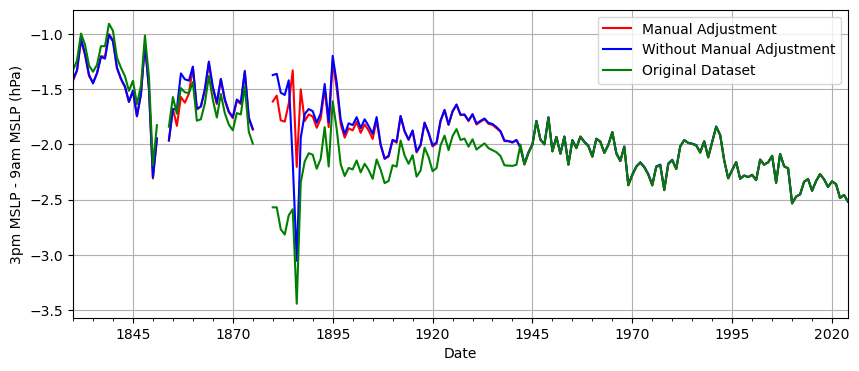

In [105]:
#Plot all three on yearly scale
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
DIFF_NosInc_Y.plot(ax=ax1,color = 'r')
DIFF_NosNotInc_Y.plot(ax=ax1,color = 'b')
DIFF_Y.plot(ax=ax1,color = 'g')
plt.legend(['Manual Adjustment','Without Manual Adjustment','Original Dataset'])
plt.ylabel('3pm MSLP - 9am MSLP (hPa)')
plt.xlabel('Date')
plt.grid()

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\RHTest To Fix 1880s discrepency", dpi=300, bbox_inches='tight')
fig.savefig(r"C:\Users\jarra\Dropbox\Perth pressure record 1830-2024\Figure files\Direct From Script\S4_RHTest_To_Fix_1880s_discrepency.png", dpi=300, bbox_inches='tight')


In [106]:
#Other figures

<Axes: xlabel='Date'>

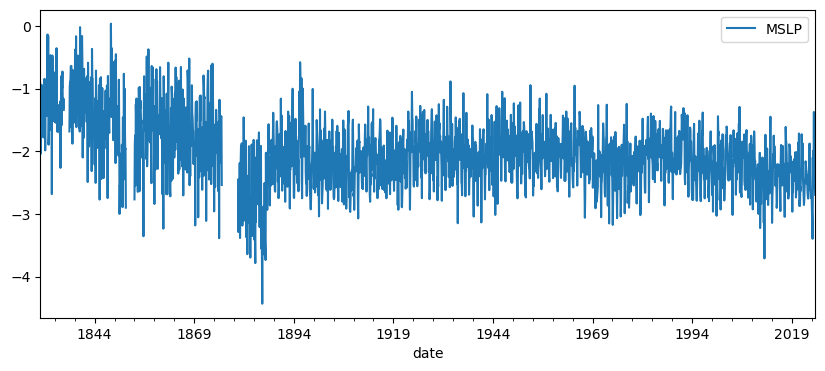

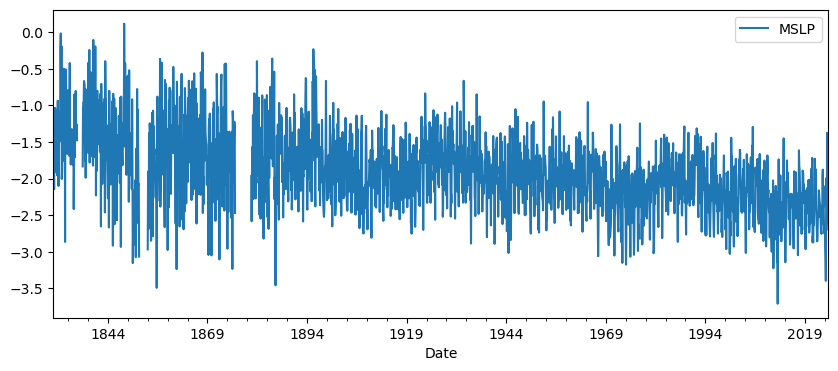

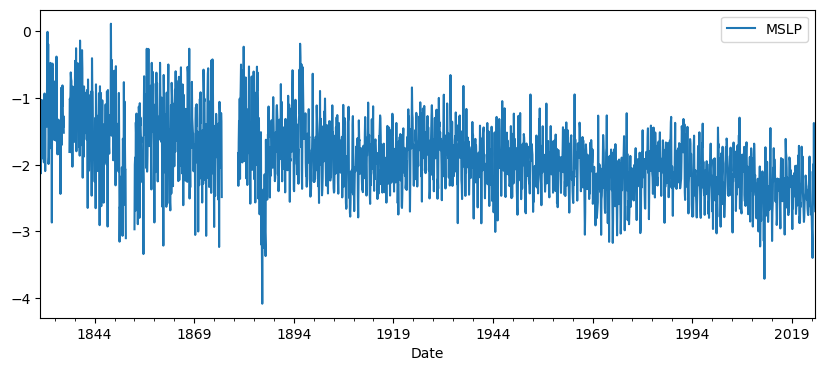

In [107]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
#P9.resample('MS').mean().loc['1880':'1900'].plot(ax=ax1,color = 'r')
#P15.resample('MS').mean().loc['1880':'1900'].plot(ax=ax1,color = 'b')
DIFF_M.plot(ax=ax1)

#fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest Before", dpi=300, bbox_inches='tight')
DIFF= (PER_3pm-PER_9am)
DIFF.index = pd.to_datetime(DIFF.index,dayfirst = True)

DIFF_M = DIFF.resample('MS').mean()
DIFF_Y = DIFF_M.resample('YS').mean()



fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
#P9.resample('MS').mean().loc['1880':'1900'].plot(ax=ax1,color = 'r')
#P15.resample('MS').mean().loc['1880':'1900'].plot(ax=ax1,color = 'b')
DIFF_NosInc_M.plot(ax=ax1)




#fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_After_NosInc", dpi=300, bbox_inches='tight')


fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
#P9.resample('MS').mean().loc['1880':'1900'].plot(ax=ax1,color = 'r')
#P15.resample('MS').mean().loc['1880':'1900'].plot(ax=ax1,color = 'b')
DIFF_NosNotInc_M.plot(ax=ax1)




#fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_After_NosInc", dpi=300, bbox_inches='tight')

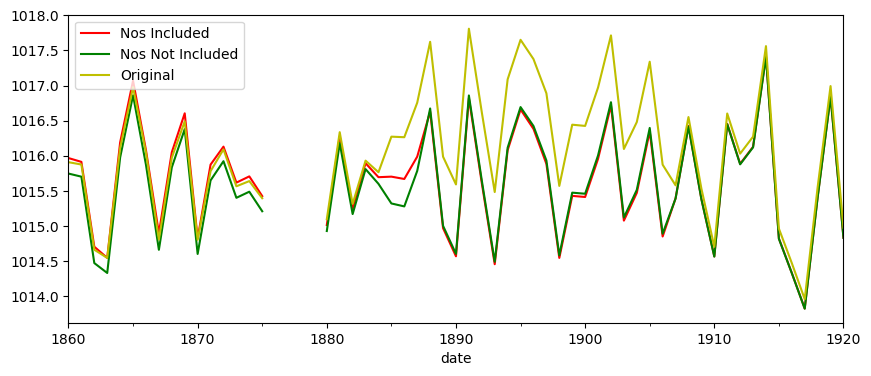

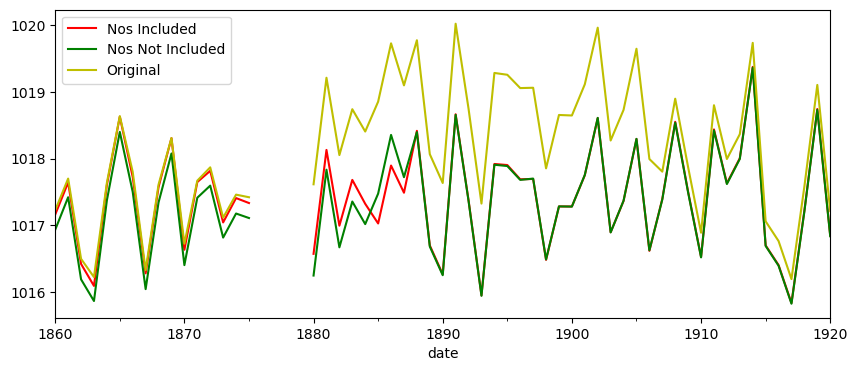

In [108]:
#Pressure plots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)
PER_3pm_NosInc.resample('YS').mean().loc['1860':'1920'].plot(ax=ax1,color = 'r')
PER_3pm_NosNotInc.resample('YS').mean().loc['1860':'1920'].plot(ax=ax1,color = 'g')
P15.resample('YS').mean().loc['1860':'1920'].plot(ax=ax1,color = 'y')

plt.legend(['Nos Included','Nos Not Included', 'Original'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_Comparison_MSLP_3pm_1880S", dpi=300, bbox_inches='tight')
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), sharex=True)

PER_9am_NosInc.resample('YS').mean().loc['1860':'1920'].plot(ax=ax1,color = 'r')
PER_9am_NosNotInc.resample('YS').mean().loc['1860':'1920'].plot(ax=ax1,color = 'g')
P9.resample('YS').mean().loc['1860':'1920'].plot(ax=ax1,color = 'y')

plt.legend(['Nos Included','Nos Not Included', 'Original'])
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_Comparison_MSLP_9am_1880S", dpi=300, bbox_inches='tight')

## 11.4 IMPACT THESE HAVE ON THE DATASET 1850s

In [109]:
## Compare the 1860s with RD
'''RAINDAYS'''
'''PERTH RAINDAYS'''
SWR_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\SWAN_RIVER_RAINDAYS_TRANSCRIBED_DAILY_1830-1875.csv")
SWR_RD['Date'] = pd.to_datetime(SWR_RD['Unnamed: 0'],format ='mixed',dayfirst = True)
SWR_RD =SWR_RD[['Date','rr']]
SWR_RD.set_index('Date',inplace = True)
SWR_RD.rename(columns={'rr': 'RAINDAYS'}, inplace=True)
# Ensure RAINDAYS is numeric (in case it's read as string)
SWR_RD['RAINDAYS'] = pd.to_numeric(SWR_RD['RAINDAYS'], errors='coerce')
# Drop duplicates, keeping the entry with RAINDAYS = 1 if it exists
SWR_RD = SWR_RD.groupby(SWR_RD.index).max()


PRO_RD = pd.read_csv(
    r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_REGIONAL_OFFICE_RAINFALL_BOM_DAILY_1877-1992.csv",header=None,
    names=['Date', 'Rainfall', 'Raindays'], index_col=0)
PRO_RD.index = pd.to_datetime(PRO_RD.index,format ='mixed',dayfirst = True)
PRO_RD['RAINDAYS'] = PRO_RD['Rainfall'].apply(lambda x: 1 if x > 0.4 else 0)
PRO_RD['RAINFALL'] = PRO_RD['Rainfall']
PRO_RF =PRO_RD[['RAINFALL']]
PRO_RD =PRO_RD[['RAINDAYS']]


PG_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_GARDENS_RAINDAYS_MONTHLY_1876-1879.csv")
PG_RD['Date'] = pd.to_datetime(PG_RD['Date'],dayfirst =  True)
PG_RD = PG_RD.set_index('Date')
PG_RD.index = PG_RD.index.to_period('M').to_timestamp()





PA_RD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_AIRPORT_RAINFALL_BOM_DAILY_1944-2024.csv")
# Convert Year, Month, Day into a single Date column
PA_RD['Date'] = pd.to_datetime(PA_RD[['Year', 'Month', 'Day']])
# Rename 'Period over which rainfall was measured (days)' to 'RAINDAYS'
PA_RD['RAINDAYS'] = PA_RD['Rainfall amount (millimetres)'].apply(lambda x: 1 if x > 0.4 else 0)
PA_RD['RAINFALL'] = PA_RD['Rainfall amount (millimetres)']

# Drop the original Year, Month, Day columns if needed
PA_RD.drop(columns=['Year', 'Month', 'Day'], inplace=True)
PA_RF =PA_RD[['Date','RAINFALL']]
PA_RD =PA_RD[['Date','RAINDAYS']]
PA_RD.set_index('Date',inplace =True)
PA_RF.set_index('Date',inplace =True)

P_RD = pd.concat([SWR_RD,PG_RD,PRO_RD.loc['1880-01-01':'1992-04-30'],PA_RD['1992-05-01':]])

C:\Users\jarra\AppData\Local\Temp\ipykernel_34632\2016833935.py:26: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  PG_RD['Date'] = pd.to_datetime(PG_RD['Date'],dayfirst =  True)


In [111]:
#If nos are not included
PER_9am_1859 = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\old v12 scripts\PART_2_RHTESTING\PERTH\1859\output\PERTH_D9_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am_1859['Date'] = pd.to_datetime(PER_9am_1859[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am_1859 = PER_9am_1859[['Date','adjusted']].set_index('Date')
PER_9am_1859 = PER_9am_1859.rename(columns = {'adjusted':'MSLP'})
PER_9am_1859= PER_9am_1859.replace(-999.99, np.nan)
''''''


PER_3pm_1859 = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\old v12 scripts\PART_2_RHTESTING\PERTH\1859\output\PERTH_D15_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm_1859['Date'] = pd.to_datetime(PER_3pm_1859[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm_1859 = PER_3pm_1859[['Date','adjusted']].set_index('Date')
PER_3pm_1859 = PER_3pm_1859.rename(columns = {'adjusted':'MSLP'})
PER_3pm_1859= PER_3pm_1859.replace(-999.99, np.nan)


In [112]:
#If nos are not included
PER_9am_1856 = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\old v12 scripts\PART_2_RHTESTING\PERTH\1856\PERTH_D9_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am_1856['Date'] = pd.to_datetime(PER_9am_1856[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am_1856 = PER_9am_1856[['Date','adjusted']].set_index('Date')
PER_9am_1856 = PER_9am_1856.rename(columns = {'adjusted':'MSLP'})
PER_9am_1856= PER_9am_1856.replace(-999.99, np.nan)
''''''


PER_3pm_1856 = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\old v12 scripts\PART_2_RHTESTING\PERTH\1856\PERTH_D15_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm_1856['Date'] = pd.to_datetime(PER_3pm_1856[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm_1856 = PER_3pm_1856[['Date','adjusted']].set_index('Date')
PER_3pm_1856 = PER_3pm_1856.rename(columns = {'adjusted':'MSLP'})
PER_3pm_1856= PER_3pm_1856.replace(-999.99, np.nan)


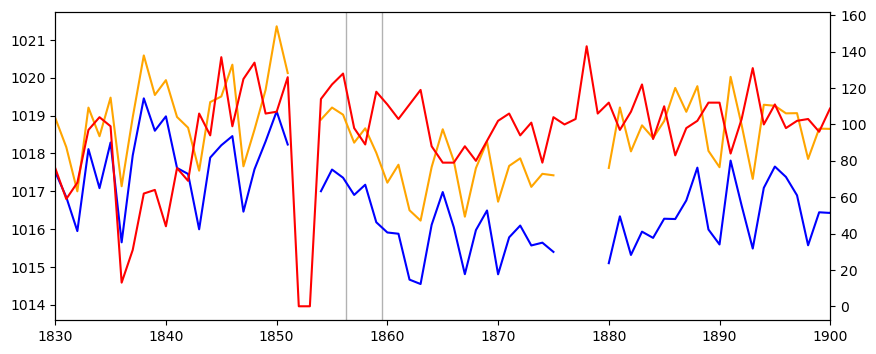

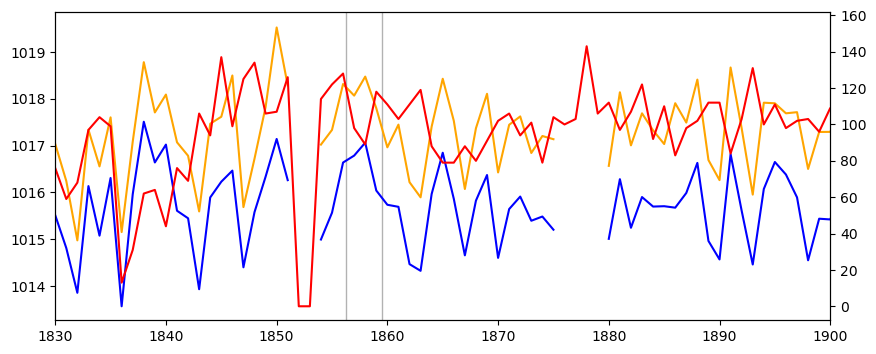

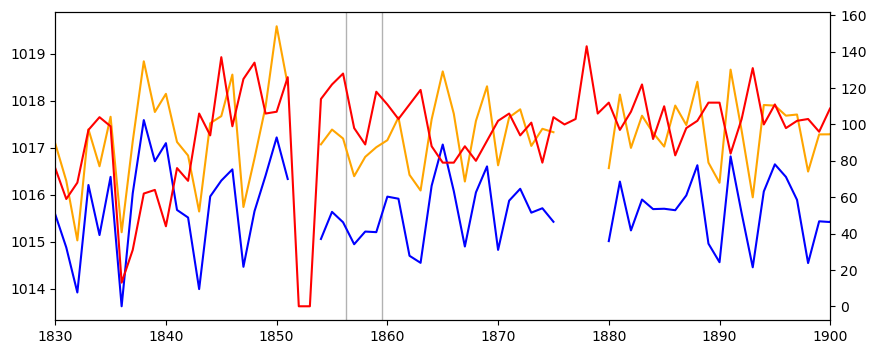

In [113]:
import matplotlib.pyplot as plt
# Create main axis
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(P9.resample('YS').mean(), color='orange', label='9am')
ax1. plot(P15.resample('YS').mean(), color='blue', label='3pm')

ax_rain = ax1.twinx()
ax_rain.plot(P_RD.resample('YS').sum(), color='red')

ax1.set_xlim(pd.Timestamp('1830-01-01'), pd.Timestamp('1900-01-01'))

ax1.axvspan(pd.Timestamp('1856-04-01'), pd.Timestamp('1856-04-02'), color='black', alpha=0.3)
ax1.axvspan(pd.Timestamp('1859-07-01'), pd.Timestamp('1859-07-02'), color='black', alpha=0.3)

# Create main axis
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(PER_9am_1856.resample('YS').mean(), color='orange', label='9am')
ax1. plot(PER_3pm_1856.resample('YS').mean(), color='blue', label='3pm')

ax_rain = ax1.twinx()
ax_rain.plot(P_RD.resample('YS').sum(), color='red')

ax1.set_xlim(pd.Timestamp('1830-01-01'), pd.Timestamp('1900-01-01'))

ax1.axvspan(pd.Timestamp('1856-04-01'), pd.Timestamp('1856-04-02'), color='black', alpha=0.3)
ax1.axvspan(pd.Timestamp('1859-07-01'), pd.Timestamp('1859-07-02'), color='black', alpha=0.3)

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_Comparison_MSLP_Raindays_1856_Updated", dpi=300, bbox_inches='tight')


# Create main axis
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(PER_9am_1859.resample('YS').mean(), color='orange', label='9am')
ax1. plot(PER_3pm_1859.resample('YS').mean(), color='blue', label='3pm')

ax_rain = ax1.twinx()
ax_rain.plot(P_RD.resample('YS').sum(), color='red')

ax1.set_xlim(pd.Timestamp('1830-01-01'), pd.Timestamp('1900-01-01'))

ax1.axvspan(pd.Timestamp('1856-04-01'), pd.Timestamp('1856-04-02'), color='black', alpha=0.3)
ax1.axvspan(pd.Timestamp('1859-07-01'), pd.Timestamp('1859-07-02'), color='black', alpha=0.3)

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_Comparison_MSLP_Raindays_1856_Updated", dpi=300, bbox_inches='tight')





fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_Comparison_MSLP_Raindays_Original", dpi=300, bbox_inches='tight')

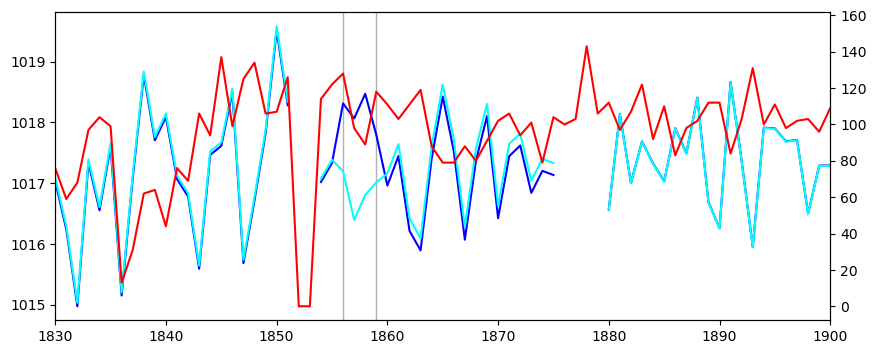

In [114]:
import matplotlib.pyplot as plt
# Create main axis
fig, ax1 = plt.subplots(figsize=(10, 4))
#ax1.plot(P9.resample('YS').mean(), color='green', label='9am')
ax1. plot(PER_9am_1856.resample('YS').mean(), color='blue', label='3pm')
ax1.plot(PER_9am_1859.resample('YS').mean(), color='cyan', label='9am')

ax_rain = ax1.twinx()
ax_rain.plot(P_RD.resample('YS').sum(), color='red')

ax1.set_xlim(pd.Timestamp('1830-01-01'), pd.Timestamp('1900-01-01'))

ax1.axvspan(pd.Timestamp('1856-01-01'), pd.Timestamp('1856-01-02'), color='black', alpha=0.3)
ax1.axvspan(pd.Timestamp('1859-01-01'), pd.Timestamp('1859-01-02'), color='black', alpha=0.3)

# Create main axis



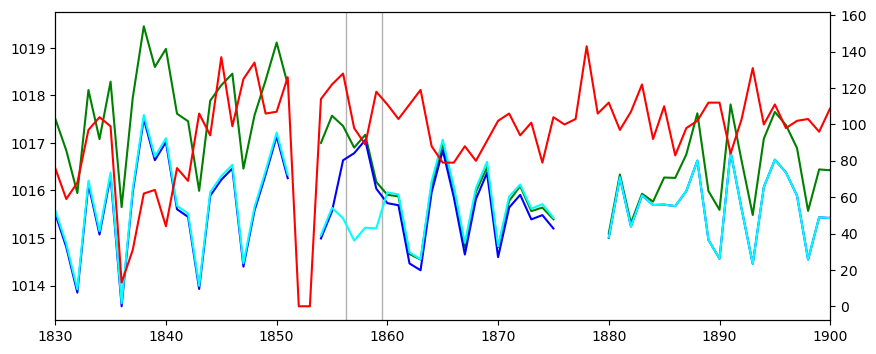

In [115]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(P15.resample('YS').mean(), color='green', label='9am')
ax1. plot(PER_3pm_1856.resample('YS').mean(), color='blue', label='3pm')
ax1. plot(PER_3pm_1859.resample('YS').mean(), color='cyan', label='3pm')

ax_rain = ax1.twinx()
ax_rain.plot(P_RD.resample('YS').sum(), color='red')

ax1.set_xlim(pd.Timestamp('1830-01-01'), pd.Timestamp('1900-01-01'))

ax1.axvspan(pd.Timestamp('1856-04-01'), pd.Timestamp('1856-04-02'), color='black', alpha=0.3)
ax1.axvspan(pd.Timestamp('1859-07-01'), pd.Timestamp('1859-07-02'), color='black', alpha=0.3)

#fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\RHTest_Comparison_MSLP_Raindays_1856_Updated", dpi=300, bbox_inches='tight')


A Type 1 change that I have been looking at a bit more closely is the 1856-04 found in monthlies or 1859 found in 9am and 3pm. The monthly RHTest indicates that the type 1 change  happens in 1856. Now from memory of how raindays works with mslp, when the pressure lowers, the rainfall should increase generally. We see  in 1857 or 58 a lower raindays period accompanied by a high pressure period, following this concept, for 1859-1864 we see higher raindays with lower pressure. Therefore it is suggestive that the Type 1 change is quite possibly in 1856. However research conducted in 2021 had identified the 1859 period as the Type 1 change for the swan river record

Monthlies and the 1859 period, we will go with the 1859 type 1 change for both 9am and 3pm.


We assume as we have looked at the other dates before that they are homogenous as most of the impacts occur pre 1940 where only 9am and 3pm are avaliable. I will check this at a later date to confirm but this has held true throughout my experimentation on this dataset. Additionally, to include the monthlies of 1875-1880, removing the 1880 part out of 9am, ensures that the overlap only requires to be mean adjusted by 5 years before and after it took place

# 12 ADDING EVERYTHING BACK TOGETHER

In [116]:
PER_9am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D9_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am['Date'] = pd.to_datetime(PER_9am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am['Date'] = PER_9am['Date'] + pd.to_timedelta('09:00:00')
PER_9am = PER_9am[['Date','adjusted']].set_index('Date')
PER_9am = PER_9am.rename(columns = {'adjusted':'MSLP'})

''''''


PER_3pm = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D15_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm['Date'] = pd.to_datetime(PER_3pm[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm['Date'] = PER_3pm['Date'] + pd.to_timedelta('15:00:00')
PER_3pm = PER_3pm[['Date','adjusted']].set_index('Date')
PER_3pm = PER_3pm.rename(columns = {'adjusted':'MSLP'})

''''''
PER_0am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D0_1942-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_0am['Date'] = pd.to_datetime(PER_0am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_0am['Date'] = PER_0am['Date'] + pd.to_timedelta('00:00:00')
PER_0am = PER_0am[['Date','adjusted']].set_index('Date')
PER_0am = PER_0am.rename(columns = {'adjusted':'MSLP'})


''''''
PER_3am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D3_1942-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3am['Date'] = pd.to_datetime(PER_3am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3am['Date'] = PER_3am['Date'] + pd.to_timedelta('03:00:00')
PER_3am = PER_3am[['Date','adjusted']].set_index('Date')
PER_3am = PER_3am.rename(columns = {'adjusted':'MSLP'})

''''''
PER_6am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D6_1942-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_6am['Date'] = pd.to_datetime(PER_6am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_6am['Date'] = PER_6am['Date'] + pd.to_timedelta('06:00:00')
PER_6am = PER_6am[['Date','adjusted']].set_index('Date')
PER_6am = PER_6am.rename(columns = {'adjusted':'MSLP'})


''''''
PER_12pm = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_D12_1942-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_12pm['Date'] = pd.to_datetime(PER_12pm[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_12pm['Date'] = PER_12pm['Date'] + pd.to_timedelta('12:00:00')
PER_12pm = PER_12pm[['Date','adjusted']].set_index('Date')
PER_12pm = PER_12pm.rename(columns = {'adjusted':'MSLP'})


PER = round(pd.concat([PER_0am,PER_3am,PER_6am,PER_9am,PER_12pm,PER_3pm],axis = 0).sort_index(),2).replace(-999.99, np.nan)

PER_untouched = Perth_MSLP.copy()
PER_filtered_data = PER_untouched[~PER_untouched.index.hour.isin([0,3,6,9,12,15])]
PER_filtered_data = PER_filtered_data.drop(index=PER_filtered_data.loc['1876':'1879'].index)
PER = round(pd.concat([PER,PER_filtered_data],axis = 0).sort_index(),1)
PER_Final= PER
PER_Final

MSLP
Date                       
1830-05-22 15:00:00  1009.9
1830-05-23 15:00:00     NaN
1830-05-24 09:00:00  1002.8
1830-05-24 15:00:00  1006.5
1830-05-25 09:00:00  1014.0
...                     ...
2024-12-31 19:00:00  1011.7
2024-12-31 20:00:00  1011.9
2024-12-31 21:00:00  1011.6
2024-12-31 22:00:00  1012.0
2024-12-31 23:00:00  1012.3

[376016 rows x 1 columns]

# SAVE THE SUBDAILY DATASET

In [117]:
PER_Final.to_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_SUBDAILY_1830-2024.csv")


# 13. APPLY THE MONTHLY DATA TO THE MONHTLY DATASET
Since we know that the graph didnt change anything between 1870-1885, we can just shift the 5 years into the graph

To create the monthly dataset, we are going to convert the pressure into monthlies based on the WMO standards for calculating monthlies from sub-daily information.

Observations are missing for 11 or more days during the month; 
Observations are missing for a period of 5 or more consecutive days during the month.


In [31]:
PER_Final =  pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_SUBDAILY_1830-2024.csv")
PER_Final.set_index('Date',inplace = True)
PER_Final.index= pd.to_datetime(PER_Final.index,dayfirst = True,format='mixed')
PER_Final = PER_Final.round(1)
PER_Final.loc['1933-05-22']

MSLP
Date                       
1933-05-22 09:00:00  1003.9
1933-05-22 15:00:00  1004.8

Lets RHTest the Monthlies and apply all the known changes on that:
1885-01
1887-07

In [32]:
#SUBDAILY DATA MONTHLY AVERAGEZZZZ
outpath = "C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/"

PER_M = ChatJR.rh_fmt_row_month_mean_all(PGm_MSLP)
PER_M.to_csv(outpath + f'PGm_M{i}_' + str(PER_M['year'][0]) + '-' + str(PER_M['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)


In [33]:
#OPTION 4 ADJUST USING THE RHTEST, BUT WITH 1876 INCLUDED
PGm_MONTHLY_RH = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\output\PGm_M2335_1876-1899_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','mean-adj daily']]

PGm_MONTHLY_RH['Day'] = PGm_MONTHLY_RH['Day']+1
# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PGm_MONTHLY_RH['Date'] = pd.to_datetime(PGm_MONTHLY_RH[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PGm_MONTHLY_RH = PGm_MONTHLY_RH[['Date','mean-adj daily']].set_index('Date')
PGm_MONTHLY_RH = PGm_MONTHLY_RH.rename(columns = {'mean-adj daily':'MSLP'})
PGm_MONTHLY_RH = PGm_MONTHLY_RH.replace(-999.99, np.nan)

In [34]:
#Set the dataframes up for monthly
Usuable = [] #WMO Standard 
More_Then_50 = [] #If there is 50% or more data 
Less_Then_50 = [] #If there is only limited data

#Mean to daily
D = Perth_MSLP.resample('D').mean()

#Mean to monthly from daily
M = D.resample('MS').mean()
M = M.reset_index()


#Get the number of avalalble days in the month
count_for_month = D.resample('MS').count().reset_index()

#For loop checks to see if the number of days has more then 11 days missing, then categorises them to more then 50 or less then 50 to 
for i in range(0, len(count_for_month)):
    #Get the year and month 
    Year = count_for_month['Date'].loc[i].year
    Month = count_for_month['Date'].loc[i].month

    #Check for leap year
    Total_Monthly_Count = [31,29 if Year % 4 == 0 else 28,31,30,31,30,31,31,30,31,30,31]
    #Chekc the number of days avalaible for that month
    Count_Month_Total = Total_Monthly_Count[Month-1]
    
    #Check the count
    Count = count_for_month.loc[i].loc['MSLP']



    if Count < Count_Month_Total - 11: #11 randomly missing days
        
        #If this is true, check if it is more then 50%
        if Count > Count_Month_Total*0.5:
            More_Then_50.append(M.loc[i])
        else:
            Less_Then_50.append(M.loc[i])
    else:
        #Check if this has conscuvetive days
        Consec_NaNs = 0
        Consec_Max = 0
            
        Months_Data = D.loc["{}-{}".format(Year, Month)].reset_index()
        for q in range(0, len(Months_Data)):
            if np.isnan(Months_Data['MSLP'].loc[q]) == True:
                Consec_NaNs = Consec_NaNs + 1
            else:
                Consec_Check = Consec_NaNs

                if Consec_Check >= Consec_Max:
                    Consec_Max = Consec_Check
                Consec_NaNs = 0
        if Consec_Max >= 5: # this chekcs to on more then 5 consecutive months
            if Count > Count_Month_Total*0.5:
                More_Then_50.append(M.loc[i])
            else:
                Less_Then_50.append(M.loc[i])
        else: 
            Usuable.append(M.loc[i])

#####################
# Convert list of dictionaries to DataFrame
Usuable = pd.DataFrame(Usuable)

# Convert 'Date' column to datetime
Usuable['Date'] = pd.to_datetime(Usuable['Date'])

# Set 'Date' column as index
Usuable.set_index('Date', inplace=True)

########################
# Convert list of dictionaries to DataFrame
More_Then_50 = pd.DataFrame(More_Then_50)

# Convert 'Date' column to datetime
More_Then_50['Date'] = pd.to_datetime(More_Then_50['Date'])

# Set 'Date' column as index
More_Then_50.set_index('Date', inplace=True)

#################
# Convert list of dictionaries to DataFrame
Less_Then_50 = pd.DataFrame(Less_Then_50)

# Convert 'Date' column to datetime
Less_Then_50['Date'] = pd.to_datetime(Less_Then_50['Date'])

# Set 'Date' column as index
Less_Then_50.set_index('Date', inplace=True)


Usuable = Usuable.round(1)
Original_Perth = Usuable
Original_Perth.head(5)


MSLP
Date              
1830-06-01  1021.5
1830-07-01  1015.8
1830-08-01  1016.5
1830-09-01  1020.5
1830-10-01  1016.2

In [35]:
#Set the dataframes up for monthly
Usuable = [] #WMO Standard 
More_Then_50 = [] #If there is 50% or more data 
Less_Then_50 = [] #If there is only limited data


#Mean to daily
D = PER_Final.resample('D').mean()

#Mean to monthly from daily
M = D.resample('MS').mean()
M = M.reset_index()


#Get the number of avalalble days in the month
count_for_month = D.resample('MS').count().reset_index()

#For loop checks to see if the number of days has more then 11 days missing, then categorises them to more then 50 or less then 50 to 
for i in range(0, len(count_for_month)):
    #Get the year and month 
    Year = count_for_month['Date'].loc[i].year
    Month = count_for_month['Date'].loc[i].month

    #Check for leap year
    Total_Monthly_Count = [31,29 if Year % 4 == 0 else 28,31,30,31,30,31,31,30,31,30,31]
    #Chekc the number of days avalaible for that month
    Count_Month_Total = Total_Monthly_Count[Month-1]
    
    #Check the count
    Count = count_for_month.loc[i].loc['MSLP']



    if Count < Count_Month_Total - 11: #11 randomly missing days
        
        #If this is true, check if it is more then 50%
        if Count > Count_Month_Total*0.5:
            More_Then_50.append(M.loc[i])
        else:
            Less_Then_50.append(M.loc[i])
    else:
        #Check if this has conscuvetive days
        Consec_NaNs = 0
        Consec_Max = 0
            
        Months_Data = D.loc["{}-{}".format(Year, Month)].reset_index()
        for q in range(0, len(Months_Data)):
            if np.isnan(Months_Data['MSLP'].loc[q]) == True:
                Consec_NaNs = Consec_NaNs + 1
            else:
                Consec_Check = Consec_NaNs

                if Consec_Check >= Consec_Max:
                    Consec_Max = Consec_Check
                Consec_NaNs = 0
        if Consec_Max >= 5: # this chekcs to on more then 5 consecutive months
            if Count > Count_Month_Total*0.5:
                More_Then_50.append(M.loc[i])
            else:
                Less_Then_50.append(M.loc[i])
        else: 
            Usuable.append(M.loc[i])

#####################
# Convert list of dictionaries to DataFrame
Usuable = pd.DataFrame(Usuable)

# Convert 'Date' column to datetime
Usuable['Date'] = pd.to_datetime(Usuable['Date'])

# Set 'Date' column as index
Usuable.set_index('Date', inplace=True)

########################
# Convert list of dictionaries to DataFrame
More_Then_50 = pd.DataFrame(More_Then_50)

# Convert 'Date' column to datetime
More_Then_50['Date'] = pd.to_datetime(More_Then_50['Date'])

# Set 'Date' column as index
More_Then_50.set_index('Date', inplace=True)

#################
# Convert list of dictionaries to DataFrame
Less_Then_50 = pd.DataFrame(Less_Then_50)

# Convert 'Date' column to datetime
Less_Then_50['Date'] = pd.to_datetime(Less_Then_50['Date'])

# Set 'Date' column as index
Less_Then_50.set_index('Date', inplace=True)

#Round them
Usuable = Usuable.round(1)
More_Then_50= More_Then_50.round(1)
Less_Then_50 = Less_Then_50.round(1)

RHTest_Perth = Usuable
RHTest_Perth.head(5)


MSLP
Date              
1830-06-01  1021.5
1830-07-01  1015.8
1830-08-01  1016.5
1830-09-01  1020.5
1830-10-01  1016.2

<Axes: xlabel='Date'>

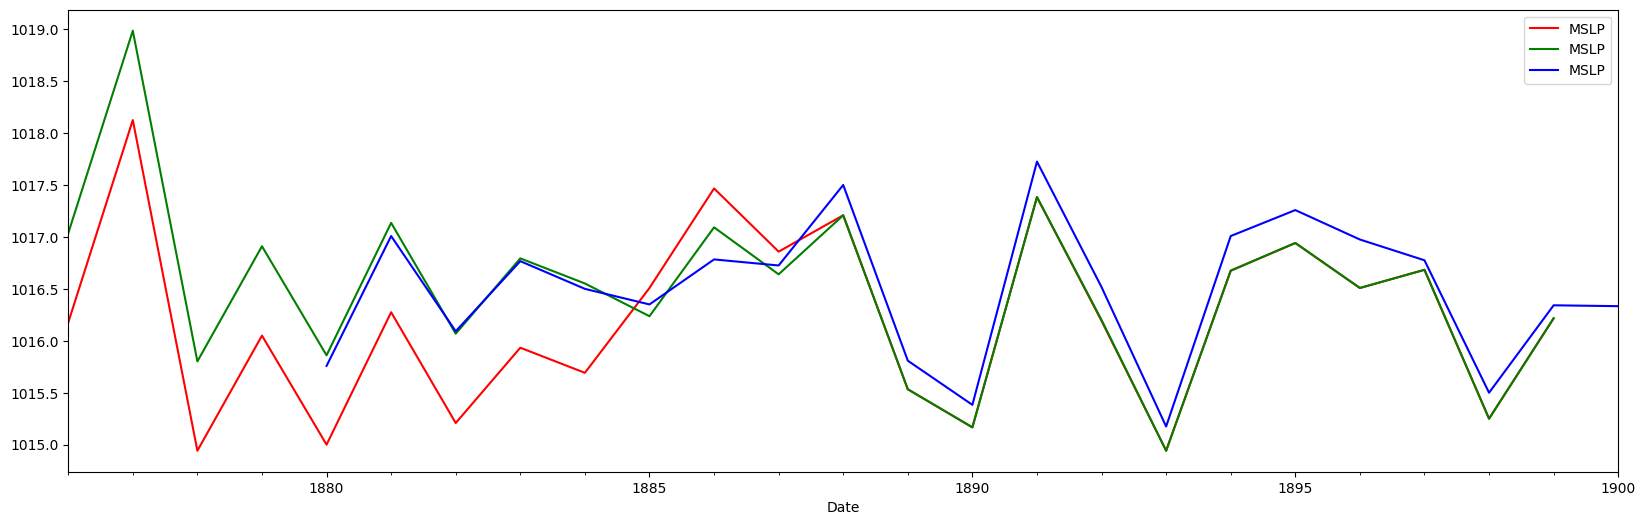

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the figsize as needed
PGm_MSLP.loc['1876':'1900'].resample('YS').mean().plot(ax=ax,color ='r')
PGm_MONTHLY_RH.loc['1876':'1900'].resample('YS').mean().plot(ax=ax,color ='g')
RHTest_Perth.loc['1876':'1900'].resample('YS').mean().plot(ax=ax,color ='b')
#So we can say that the monthly dataset does not have enough evidence to cause issues when RH-testing during the 1876-1879 period
#Furthermore - we keep monthly data under the rules of the WMO standards where its 22 days or more, thereofre the 
#rhtest might undermine this and cause issues. Therefore, we use the mean adjustment feature where I adjust the data
#to the ends of the 1875 and 1880 to ensure no more weird non-climatic issues arise.

In [37]:
#OPTION 1 QQM ALOGORITHM
#using Zaks code step by step Testing how 2 and 5 years impact the final product, this is using a monthly adjustment
historical = PGm_MSLP.sort_index().loc[:'1881-12']
modern = RHTest_Perth.sort_index().loc['1880-01-01':'1881-12-31'].resample('MS').mean()
idx = historical.index.intersection(modern.index)
modern_overlap = modern.loc[idx]
historical_overlap = historical.loc[idx]

timestamp = historical.columns
correctedDf = historical.copy()
for col in historical:
    historicalPct = historical_overlap[col].quantile(np.arange(0.05,1,0.05)) #calculate the percentiles for both datasets 
    modernPct = modern_overlap[col].quantile(np.arange(0.05,1,0.05))
    correctedList = []
    for j in range(len(historical[col])):
        correctedList.append(ChatJR.qm_transfer(modernPct,historicalPct,historical[col][j])) #loop through each value and correct
    correctedDf[col + '_corrected'] = correctedList
    del historicalPct, modernPct, correctedList
corrected = correctedDf.drop(correctedDf.columns[0:len(historical.columns)], axis=1)
corrected.columns = corrected.columns.str.replace('_corrected','')

#Add Perth Regional Office Corrected to PER_011_P_MSLP

RHTest_Perth_O1 =  pd.concat([RHTest_Perth.loc['1830':'1875'],corrected[:'1879-12-31'],RHTest_Perth.loc['1880':]], axis =0).sort_index()

C:\Users\jarra\AppData\Local\Temp\ipykernel_13284\3869712100.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correctedList.append(ChatJR.qm_transfer(modernPct,historicalPct,historical[col][j])) #loop through each value and correct


In [38]:
#OPTION 2 PM ALOGORITHM
PER_1880_1909 = RHTest_Perth.loc['1880':'1909'].groupby([RHTest_Perth.loc['1880':'1909'].index.month]).mean().reset_index().rename(columns = {'Date':'Month'}).set_index('Month')

PGm_1876_1899 = PGm_MSLP.loc['1876':'1899'].groupby([PGm_MSLP.loc['1876':'1899'].index.month]).mean().reset_index().rename(columns = {'Date':'Month'}).set_index('Month')

#Get the difference
PGm_1876_1899_Dif = PGm_MSLP.loc['1876':'1899'].copy().reset_index()
PGm_1876_1899_Dif = PGm_1876_1899_Dif.drop_duplicates(subset='Date', keep='last').set_index('Date')

#Now sort ot
date = []
pressure_dif = []
for i in PGm_1876_1899_Dif.index:
    #Extract month
    month = i.month
    
    if not np.isnan(PGm_1876_1899_Dif.loc["{}".format(i)].values):
        date.append(i)
        pressure_dif.append(PGm_1876_1899_Dif.loc["{}".format(i)].values[0]  - PGm_1876_1899.loc[month].values[0])
    else:
        date.append(i)
        pressure_dif.append(np.nan)
        
# Convert the list of timestamps to a pandas DataFrame
date = pd.DataFrame({'Date': date})
pressure_dif = pd.DataFrame({'MSLP_DIF': pressure_dif})

    
PGm_1876_1899_Dif = pd.concat([date,pressure_dif],axis = 1).set_index('Date')


#Add to the other record
#Now add that onto the average of the 1880-1909 plot
date = []
pressure_mean_adj = []
for i in PGm_1876_1899_Dif.index:
    #Extract month
    month = i.month
    
    if not np.isnan(PGm_1876_1899_Dif.loc["{}".format(i)].values):
        date.append(i)
        pressure_mean_adj.append(PGm_1876_1899_Dif.loc["{}".format(i)].values[0]  + PER_1880_1909.loc[month].values[0])
    else:
        date.append(i)
        pressure_mean_adj.append(np.nan)
        
# Convert the list of timestamps to a pandas DataFrame
date = pd.DataFrame({'Date': date})
pressure_mean_adj = pd.DataFrame({'MSLP': pressure_mean_adj})

    
PGm_1876_1899 = pd.concat([date,pressure_mean_adj],axis = 1).set_index('Date').loc[:'1879']

RHTest_Perth_O2 =  pd.concat([RHTest_Perth.loc['1830':'1875'],PGm_1876_1899[:'1879-12-31'],RHTest_Perth.loc['1880':]], axis =0).sort_index()

In [39]:
#OPTION 3 ADJUST TO THE MEAN OF THE 5 YEAR TAILS

#Mean Adjust the 5 years of monthly data onto the RH-tested record using the monthly WMO guidelined check record
Average_old = Original_Perth.loc['1870':'1884'].round(1)
Average_old = pd.concat([Average_old.loc[:'1875'],Average_old.loc['1880':]]).mean().round(1)

#The RH-Test Perth
Average_New = RHTest_Perth.loc['1870':'1884'].round(1)
Average_New = pd.concat([Average_New.loc[:'1875'],Average_New.loc['1880':]]).mean().round(1)

Updated_76_80 = Perth_MSLP.loc['1876':'1879'] + (Average_New - Average_old)
RHTest_Perth_O3 = round(pd.concat([RHTest_Perth,Updated_76_80],axis = 0).sort_index(),1)


#OPTION 4 ADJUST USING THE RHTEST, BUT WITH 1876 INCLUDED
PER_MONTHLY_RH = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PERTH_M_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','mean-adj daily']]

PER_MONTHLY_RH['Day'] = PER_MONTHLY_RH['Day']+1
# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_MONTHLY_RH['Date'] = pd.to_datetime(PER_MONTHLY_RH[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_MONTHLY_RH = PER_MONTHLY_RH[['Date','mean-adj daily']].set_index('Date')
PER_MONTHLY_RH = PER_MONTHLY_RH.rename(columns = {'mean-adj daily':'MSLP'})
RHTest_Perth_O4 = PER_MONTHLY_RH.replace(-999.99, np.nan)

In [40]:
#OPTION 5 ADJUST USING THE RHTEST, BUT WITH 1876 INCLUDED
PGm_MONTHLY_RH = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PGm_M2335_1876-1899_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','mean-adj daily']]

PGm_MONTHLY_RH['Day'] = PGm_MONTHLY_RH['Day']+1
# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PGm_MONTHLY_RH['Date'] = pd.to_datetime(PGm_MONTHLY_RH[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PGm_MONTHLY_RH = PGm_MONTHLY_RH[['Date','mean-adj daily']].set_index('Date')
PGm_MONTHLY_RH = PGm_MONTHLY_RH.rename(columns = {'mean-adj daily':'MSLP'})
RHTest_Perth_O5 = PGm_MONTHLY_RH.replace(-999.99, np.nan)
RHTest_Perth_O5 =  pd.concat([RHTest_Perth.loc['1830':'1875'],RHTest_Perth_O5[:'1879-12-31'],RHTest_Perth.loc['1880':]], axis =0).sort_index()

In [41]:
#OPTION 6 ADJUST USING THE RHTEST, BUT WITH 1876 INCLUDED
PGm_MONTHLY_RH = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PGm_M2335_1876-1899_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','mean-adj daily']]

PGm_MONTHLY_RH['Day'] = PGm_MONTHLY_RH['Day']+1
# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PGm_MONTHLY_RH['Date'] = pd.to_datetime(PGm_MONTHLY_RH[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PGm_MONTHLY_RH = PGm_MONTHLY_RH[['Date','mean-adj daily']].set_index('Date')
PGm_MONTHLY_RH = PGm_MONTHLY_RH.rename(columns = {'mean-adj daily':'MSLP'})
PGm_MONTHLY_RH = PGm_MONTHLY_RH.replace(-999.99, np.nan)


#using Zaks code step by step Testing how 2 and 5 years impact the final product, this is using a monthly adjustment
historical = PGm_MONTHLY_RH.sort_index().loc[:'1881-12']
modern = RHTest_Perth.sort_index().loc['1880-01-01':'1881-12-31'].resample('MS').mean()
idx = historical.index.intersection(modern.index)
modern_overlap = modern.loc[idx]
historical_overlap = historical.loc[idx]

timestamp = historical.columns
correctedDf = historical.copy()
for col in historical:
    historicalPct = historical_overlap[col].quantile(np.arange(0.05,1,0.05)) #calculate the percentiles for both datasets 
    modernPct = modern_overlap[col].quantile(np.arange(0.05,1,0.05))
    correctedList = []
    for j in range(len(historical[col])):
        correctedList.append(ChatJR.qm_transfer(modernPct,historicalPct,historical[col][j])) #loop through each value and correct
    correctedDf[col + '_corrected'] = correctedList
    del historicalPct, modernPct, correctedList
corrected = correctedDf.drop(correctedDf.columns[0:len(historical.columns)], axis=1)
corrected.columns = corrected.columns.str.replace('_corrected','')

RHTest_Perth_O6 =  pd.concat([RHTest_Perth.loc['1830':'1875'],corrected[:'1879-12-31'],RHTest_Perth.loc['1880':]], axis =0).sort_index()

C:\Users\jarra\AppData\Local\Temp\ipykernel_13284\401656309.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correctedList.append(ChatJR.qm_transfer(modernPct,historicalPct,historical[col][j])) #loop through each value and correct


In [42]:
#OPTION 7 ADJUST USING THE RHTEST, BUT WITH 1876 INCLUDED
PGm_MONTHLY_RH = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PGm_M2335_1876-1899_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','mean-adj daily']]

PGm_MONTHLY_RH['Day'] = PGm_MONTHLY_RH['Day']+1
# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PGm_MONTHLY_RH['Date'] = pd.to_datetime(PGm_MONTHLY_RH[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PGm_MONTHLY_RH = PGm_MONTHLY_RH[['Date','mean-adj daily']].set_index('Date')
PGm_MONTHLY_RH = PGm_MONTHLY_RH.rename(columns = {'mean-adj daily':'MSLP'})

#OPTION 2 PM ALOGORITHM
PER_1880_1909 = RHTest_Perth.loc['1880':'1909'].groupby([RHTest_Perth.loc['1880':'1909'].index.month]).mean().reset_index().rename(columns = {'Date':'Month'}).set_index('Month')

PGm_1876_1899 = PGm_MONTHLY_RH.loc['1876':'1899'].groupby([PGm_MONTHLY_RH.loc['1876':'1899'].index.month]).mean().reset_index().rename(columns = {'Date':'Month'}).set_index('Month')

#Get the difference
PGm_1876_1899_Dif = PGm_MONTHLY_RH.loc['1876':'1899'].copy().reset_index()
PGm_1876_1899_Dif = PGm_1876_1899_Dif.drop_duplicates(subset='Date', keep='last').set_index('Date')

#Now sort ot
date = []
pressure_dif = []
for i in PGm_1876_1899_Dif.index:
    #Extract month
    month = i.month
    
    if not np.isnan(PGm_1876_1899_Dif.loc["{}".format(i)].values):
        date.append(i)
        pressure_dif.append(PGm_1876_1899_Dif.loc["{}".format(i)].values[0]  - PGm_1876_1899.loc[month].values[0])
    else:
        date.append(i)
        pressure_dif.append(np.nan)
        
# Convert the list of timestamps to a pandas DataFrame
date = pd.DataFrame({'Date': date})
pressure_dif = pd.DataFrame({'MSLP_DIF': pressure_dif})

    
PGm_1876_1899_Dif = pd.concat([date,pressure_dif],axis = 1).set_index('Date')


#Add to the other record
#Now add that onto the average of the 1880-1909 plot
date = []
pressure_mean_adj = []
for i in PGm_1876_1899_Dif.index:
    #Extract month
    month = i.month
    
    if not np.isnan(PGm_1876_1899_Dif.loc["{}".format(i)].values):
        date.append(i)
        pressure_mean_adj.append(PGm_1876_1899_Dif.loc["{}".format(i)].values[0]  + PER_1880_1909.loc[month].values[0])
    else:
        date.append(i)
        pressure_mean_adj.append(np.nan)
        
# Convert the list of timestamps to a pandas DataFrame
date = pd.DataFrame({'Date': date})
pressure_mean_adj = pd.DataFrame({'MSLP': pressure_mean_adj})

    
PGm_1876_1899 = pd.concat([date,pressure_mean_adj],axis = 1).set_index('Date').loc[:'1879']
RHTest_Perth_O7 =  pd.concat([RHTest_Perth.loc['1830':'1875'],PGm_1876_1899[:'1879-12-31'],RHTest_Perth.loc['1880':]], axis =0).sort_index()

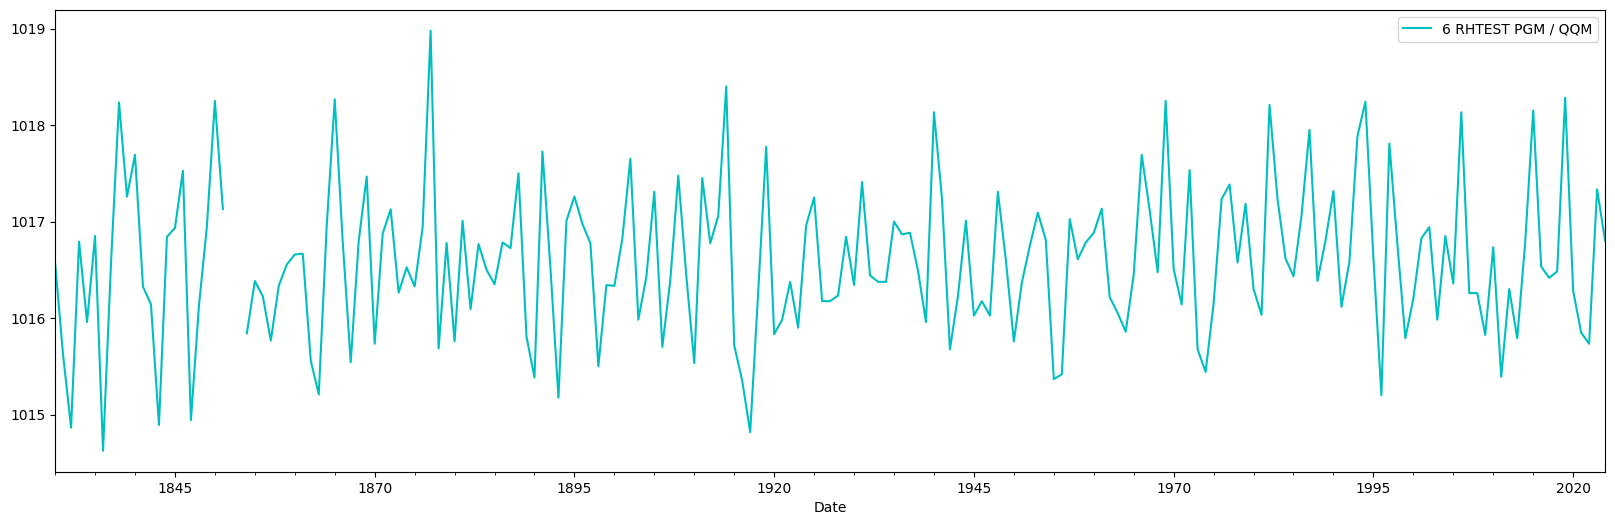

In [43]:
fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the figsize as needed
#RHTest_Perth_O1.loc['1850':'1900'].resample('YS').mean().plot(ax=ax,color ='r') #This is without homogenising the pressure
#RHTest_Perth_O2.loc['1850':'1900'].resample('YS').mean().plot(ax=ax,color ='b') #Not corrected well
#RHTest_Perth_O3.loc['1850':'1900'].resample('YS').mean().plot(ax=ax,color ='g') #Not good corrections
#RHTest_Perth_O4.loc['1850':'1900'].resample('YS').mean().plot(ax=ax,color ='k') #FIRST TO GO LOOKS OUT OF PLACE
#RHTest_Perth_O5.loc['1850':'1900'].resample('YS').mean().plot(ax=ax,color ='y') #Not adjusted, just added
RHTest_Perth_O6.loc['1830':'2025'].resample('YS').mean().plot(ax=ax,color ='c')
#RHTest_Perth_O7.loc['1850':'1900'].resample('YS').mean().plot(ax=ax,color ='k') #We have overlapping data, soo more statistcally sound

plt.legend(['6 RHTEST PGM / QQM'])


#plt.legend(['1 QQM','2 PM','3 TAIL ADJ', '4 RHTEST ALL', '5 RHTEST PGM', '6 RHTEST PGM / QQM', '7 RHTEST / PM'])
#So we can say that the monthly dataset does not have enough evidence to cause issues when RH-testing during the 1876-1879 period
#Furthermore - we keep monthly data under the rules of the WMO standards where its 22 days or more, thereofre the 
#rhtest might undermine this and cause issues. Therefore, we use the mean adjustment feature where I adjust the data
#to the ends of the 1875 and 1880 to ensure no more weird non-climatic issues arise.

NameError: name 'RHTest_Perth_O4' is not defined

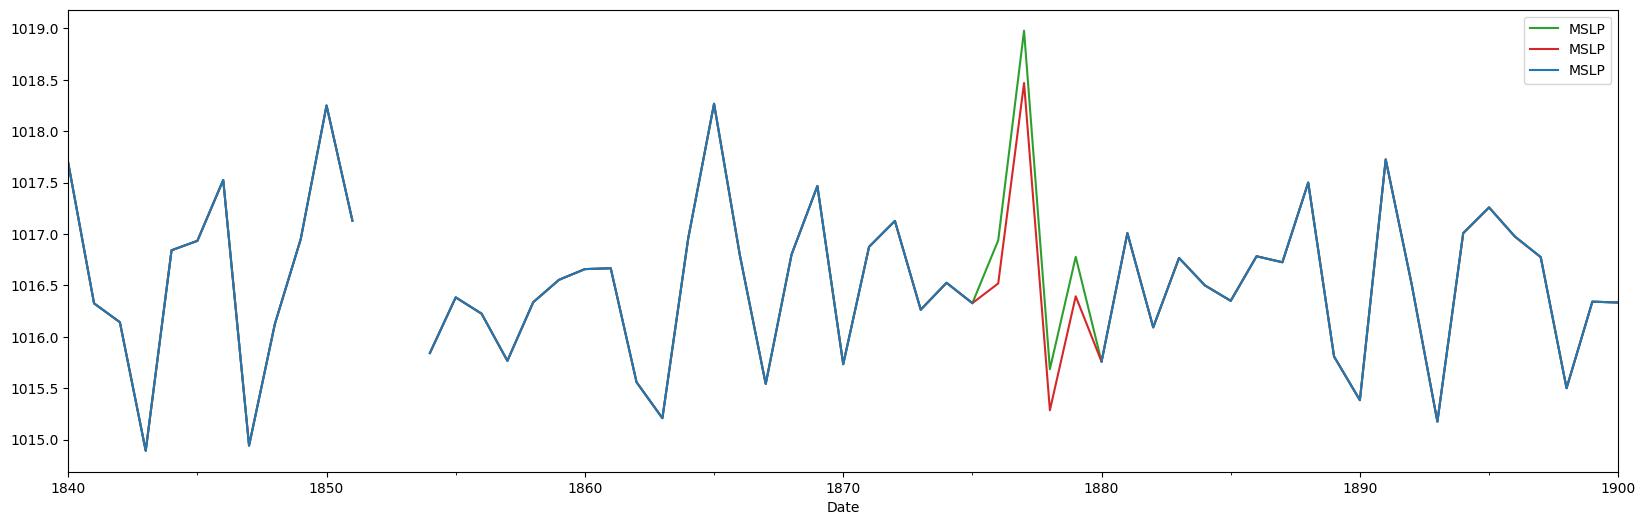

In [44]:
fig,ax1 =  plt.subplots(1, 1, figsize=(20, 6), sharex=True)
#RHTest_Perth_O1.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:green', label='Relative Humidity')
#RHTest_Perth_O2.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:red', label='Relative Humidity')
#RHTest_Perth_O3.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:blue', label='Relative Humidity')
#RHTest_Perth_O4.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:cyan', label='Relative Humidity')
#RHTest_Perth_O5.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:cyan', label='Relative Humidity')
RHTest_Perth_O6.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:orange', label='Relative Humidity')
#RHTest_Perth_O7.loc['1840':'1900'].resample('YS').mean().plot(ax=ax1, color='tab:brown', label='Relative Humidity')

ax2 = ax1.twinx()
P_RD.loc['1840':'1900'].resample('YS').sum().plot(ax=ax2, color='tab:red', label='Rainfall (x10 mm)')
ax1.grid()

# Gone with the the QQM AND RHTES

In [45]:
Perth_1830_2024_Monthlies  = RHTest_Perth_O6 

## For yearlies - no climate thing required, its for our own knowledge, but use the 3.5 rule to find the yearly data

In [48]:
#Lets do it based on the WMO Guidelines for yearly
Usuable_Y = []
More_Then_50_Y = []
Less_Then_50_Y = []

Less_Then_50_copy =Less_Then_50.copy()
More_Then_50_copy =Less_Then_50.copy()


#Set the under 50 and over 50% to np.nan
More_Then_50_copy['MSLP'] =  More_Then_50_copy['MSLP'] = np.nan
Less_Then_50_copy['MSLP'] =  Less_Then_50_copy['MSLP'] = np.nan




Monthly_for_y_data = Perth_1830_2024_Monthlies

Monthly_for_y_data.sort_index(inplace=True)
Monthly_for_y_data


M = Monthly_for_y_data
Y = Monthly_for_y_data.resample('YS').mean()

#Get the number of avalalble days in the month
count_for_year = M.resample('YS').count().reset_index()


Y = Y.reset_index()


for i in range(0, len(count_for_year)):
    #Get the year and month 
    Year = count_for_year['Date'].loc[i].year

    #Check for leap year
    Total_Yearly_Count = 12
    
    #Check the count
    Count = count_for_year.loc[i].loc['MSLP']

    #Check the 3/5 rule
    if Count < Total_Yearly_Count - 2: #identify more than 2 months of more missing as I cannot find anything on the internet-  ask Joelle
        
        #If this is true, check if it is more then 50%
        if Count > Total_Yearly_Count*0.5:
            More_Then_50_Y.append(Y.loc[i])
        else:
            Less_Then_50_Y.append(Y.loc[i])
    else:
        #Check if this has conscuvetive days
        Consec_NaNs = 0
        Consec_Max = 0
            
        Year_Data = M.loc["{}".format(Year)].reset_index()
        for q in range(0, len(Year_Data)):
            if np.isnan(Year_Data['MSLP'].loc[q]) == True:
                Consec_NaNs = Consec_NaNs + 1
            else:
                Consec_Check = Consec_NaNs
                if Consec_Check >= Consec_Max:
                    Consec_Max = Consec_Check
                Consec_NaNs = 0
        if Consec_Max >= 3:
            if Count > Count_Month_Total*0.5:
                More_Then_50_Y.append(Y.loc[i])
            else:
                Less_Then_50_Y.append(Y.loc[i])
        else: 
            
            Usuable_Y.append(Y.loc[i])

# Convert list of dictionaries to DataFrame
Usuable_Y = pd.DataFrame(Usuable_Y)

# Convert 'Date' column to datetime
Usuable_Y['Date'] = pd.to_datetime(Usuable_Y['Date'])

# Set 'Date' column as index
Usuable_Y.set_index('Date', inplace=True)

# Convert list of dictionaries to DataFrame
More_Then_50_Y = pd.DataFrame(More_Then_50_Y)
if len(More_Then_50_Y)>0:
    # Convert 'Date' column to datetime
    More_Then_50_Y['Date'] = pd.to_datetime(More_Then_50_Y['Date'])


    # Set 'Date' column as index
    More_Then_50_Y.set_index('Date', inplace=True)


# Convert list of dictionaries to DataFrame
Less_Then_50_Y = pd.DataFrame(Less_Then_50_Y)


# Convert 'Date' column to datetime
Less_Then_50_Y['Date'] = pd.to_datetime(Less_Then_50_Y['Date'])

# Set 'Date' column as index
Less_Then_50_Y.set_index('Date', inplace=True)

In [49]:
Usuable_Y = Usuable_Y.round(1)

In [50]:
Perth_1830_2024_Sub_Dailies = PER_Final
#These WMO guide functions above have been converted into a function and you can now run it for rainfall, pressure and temperature
Perth_1830_2024_Monthlies = ChatJR.WMO_Guide_Months(Perth_1830_2024_Sub_Dailies,'Date','MSLP',False)


Perth_1830_2024_Yearlies = ChatJR.WMO_Guide_Yearly(Perth_1830_2024_Monthlies,'Date','MSLP',False)

In [68]:
#Set the final per decision as sub-dailys
Perth_1830_2024_Sub_Dailies = PER_Final


#Use updated WMO code to get monthlies
Perth_1830_2024_Monthlies = ChatJR.WMO_Guide_Months(Perth_1830_2024_Sub_Dailies,'Date','MSLP',False)


FUNCTION_LIST.ipynb:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "import warnings\n",
FUNCTION_LIST.ipynb:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "if \"docx.py\" in cwd_files or \"docx\" in cwd_files:\n",


In [72]:
Perth_1830_2024_Sub_Dailies.resample('D').mean().resample('MS').count().head(50)

MSLP
Date            
1830-05-01     8
1830-06-01    26
1830-07-01    28
1830-08-01    25
1830-09-01    26
1830-10-01    28
1830-11-01    26
1830-12-01    30
1831-01-01    27
1831-02-01    24
1831-03-01    27
1831-04-01    24
1831-05-01    26
1831-06-01    26
1831-07-01    26
1831-08-01    27
1831-09-01    26
1831-10-01    25
1831-11-01    26
1831-12-01    24
1832-01-01    25
1832-02-01    24
1832-03-01    19
1832-04-01    24
1832-05-01    22
1832-06-01    23
1832-07-01    25
1832-08-01    25
1832-09-01    25
1832-10-01    28
1832-11-01    25
1832-12-01    26
1833-01-01    24
1833-02-01    24
1833-03-01    27
1833-04-01    23
1833-05-01    31
1833-06-01    29
1833-07-01    28
1833-08-01    31
1833-09-01    28
1833-10-01    30
1833-11-01    27
1833-12-01    28
1834-01-01    29
1834-02-01    27
1834-03-01    30
1834-04-01    29
1834-05-01    30
1834-06-01    29

MSLP
Date                   
1830-05-01  1013.026667
1830-06-01  1021.574510
1830-07-01  1015.618182
1830-08-01  1016.534694
1830-09-01  1020.720408
1830-10-01  1015.998148
1830-11-01  1012.465385
1830-12-01  1013.012500
1831-01-01  1009.701923
1831-02-01  1012.674468
1831-03-01  1015.964444
1831-04-01  1018.271111
1831-05-01  1016.284783
1831-06-01  1017.266667
1831-07-01  1019.971429
1831-08-01  1017.634694
1831-09-01  1017.115217
1831-10-01  1017.697917
1831-11-01  1010.743137
1831-12-01  1014.984444
1832-01-01  1010.618750
1832-02-01  1012.447619
1832-03-01  1008.608108
1832-04-01  1013.572340
1832-05-01  1016.886364
1832-06-01  1018.734783
1832-07-01  1017.314634
1832-08-01  1017.772727
1832-09-01  1014.593478
1832-10-01  1013.050943
1832-11-01  1018.134783
1832-12-01  1011.864444
1833-01-01  1014.325532
1833-02-01  1011.751064
1833-03-01  1016.193750
1833-04-01  1019.734146
1833-05-01  1017.477049
1833-06-01  1017.623214
1833-07-01  1017.303774
1833-08-01  1018.094828
1833-09-01  1021.439623
1833-10-01  1018.076786
1833-11-01  1016.456250
1833-12-01  1012.725926
1834-01-01  1011.461818
1834-02-01  1013.300000
1834-03-01  1015.523729
1834-04-01  1017.818182
1834-05-01  1019.576786
1834-06-01  1016.363158

In [139]:
#Set the final per decision as sub-dailys
Perth_1830_2024_Sub_Dailies = PER_Final.round(1)
Perth_1830_2024_Dailies = PER_Final.resample('D').mean().round(1)

#Use updated WMO code to get monthlies
Perth_1830_2024_Monthlies = ChatJR.WMO_Guide_Months(Perth_1830_2024_Dailies,'Date','MSLP',False)

#Use the option 6 to PM adjust the monthles of PGm after it was RHTest
#OPTION 6 ADJUST USING THE RHTEST, BUT WITH 1876 INCLUDED
PGm_MONTHLY_RH = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\PERTH\output\PGm_M2335_1876-1899_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','mean-adj daily']]

PGm_MONTHLY_RH['Day'] = PGm_MONTHLY_RH['Day']+1
# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PGm_MONTHLY_RH['Date'] = pd.to_datetime(PGm_MONTHLY_RH[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PGm_MONTHLY_RH = PGm_MONTHLY_RH[['Date','mean-adj daily']].set_index('Date')
PGm_MONTHLY_RH = PGm_MONTHLY_RH.rename(columns = {'mean-adj daily':'MSLP'})
PGm_MONTHLY_RH = PGm_MONTHLY_RH.replace(-999.99, np.nan)


#using Zaks code step by step Testing how 2 and 5 years impact the final product, this is using a monthly adjustment
historical = PGm_MONTHLY_RH.sort_index().loc[:'1881-12']
modern = Perth_1830_2024_Monthlies.sort_index().loc['1880-01-01':'1881-12-31'].resample('MS').mean()
idx = historical.index.intersection(modern.index)
modern_overlap = modern.loc[idx]
historical_overlap = historical.loc[idx]

timestamp = historical.columns
correctedDf = historical.copy()
for col in historical:
    historicalPct = historical_overlap[col].quantile(np.arange(0.05,1,0.05)) #calculate the percentiles for both datasets 
    modernPct = modern_overlap[col].quantile(np.arange(0.05,1,0.05))
    correctedList = []
    for j in range(len(historical[col])):
        correctedList.append(ChatJR.qm_transfer(modernPct,historicalPct,historical[col][j])) #loop through each value and correct
    correctedDf[col + '_corrected'] = correctedList
    del historicalPct, modernPct, correctedList
corrected = correctedDf.drop(correctedDf.columns[0:len(historical.columns)], axis=1)
corrected.columns = corrected.columns.str.replace('_corrected','')

Perth_1830_2024_Monthlies =  pd.concat([Perth_1830_2024_Monthlies.loc['1830':'1875'],corrected[:'1879-12-31'],Perth_1830_2024_Monthlies.loc['1880':]], axis =0).sort_index().round(1)


Perth_1830_2024_Yearlies = ChatJR.WMO_Guide_Yearly(Perth_1830_2024_Monthlies,'Date','MSLP',False).round(1)


FUNCTION_LIST.ipynb:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "import warnings\n",
FUNCTION_LIST.ipynb:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  "if \"docx.py\" in cwd_files or \"docx\" in cwd_files:\n",
C:\Users\jarra\AppData\Local\Temp\ipykernel_13284\1010241759.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

In [140]:
Perth_1830_2024_Yearlies.head(50)

MSLP
Date              
1830-01-01  1016.6
1831-01-01  1015.6
1832-01-01  1014.9
1833-01-01  1016.8
1834-01-01  1016.0
1835-01-01  1016.9
1836-01-01     NaN
1837-01-01     NaN
1838-01-01  1018.2
1839-01-01  1017.2
1840-01-01  1017.7
1841-01-01  1016.3
1842-01-01  1016.1
1843-01-01  1014.9
1844-01-01  1016.8
1845-01-01  1016.9
1846-01-01  1017.5
1847-01-01  1014.9
1848-01-01  1016.1
1849-01-01  1017.0
1850-01-01  1018.2
1851-01-01  1017.1
1852-01-01     NaN
1853-01-01     NaN
1854-01-01  1015.8
1855-01-01  1016.4
1856-01-01  1016.2
1857-01-01  1015.8
1858-01-01  1016.3
1859-01-01  1016.6
1860-01-01  1016.7
1861-01-01  1016.7
1862-01-01  1015.6
1863-01-01  1015.2
1864-01-01  1017.0
1865-01-01  1018.3
1866-01-01  1016.8
1867-01-01  1015.5
1868-01-01  1016.8
1869-01-01  1017.5
1870-01-01  1015.7
1871-01-01  1016.9
1872-01-01  1017.1
1873-01-01  1016.3
1874-01-01  1016.5
1875-01-01  1016.3
1876-01-01  1016.9
1877-01-01  1019.0
1878-01-01  1015.7
1879-01-01  1016.8

In [51]:
# Step 1: Get full hourly date range
start_date = Perth_1830_2024_Sub_Dailies.index.min()
end_date = Perth_1830_2024_Sub_Dailies.index.max()
full_hourly_index = pd.date_range(start=start_date, end=end_date, freq='H')

# Step 2: Reindex the DataFrame to include all hours
Perth_1830_2024_Sub_Dailies = Perth_1830_2024_Sub_Dailies.reindex(full_hourly_index)
Perth_1830_2024_Sub_Dailies.index.name = 'Date'  # Optional: name the index


# Step 1: Get full hourly date range
start_date = Perth_1830_2024_Monthlies.index.min()
end_date = Perth_1830_2024_Monthlies.index.max()
full_hourly_index = pd.date_range(start=start_date, end=end_date, freq='MS')

# Step 2: Reindex the DataFrame to include all hours
Perth_1830_2024_Monthlies = Perth_1830_2024_Monthlies.reindex(full_hourly_index)
Perth_1830_2024_Monthlies.index.name = 'Date'  # Optional: name the index


# Step 1: Get full hourly date range
start_date = Perth_1830_2024_Yearlies.index.min()
end_date = Perth_1830_2024_Yearlies.index.max()
full_hourly_index = pd.date_range(start=start_date, end=end_date, freq='YS')

# Step 2: Reindex the DataFrame to include all hours
Perth_1830_2024_Yearlies = Perth_1830_2024_Yearlies.reindex(full_hourly_index)
Perth_1830_2024_Yearlies.index.name = 'Date'  # Optional: name the index


C:\Users\jarra\AppData\Local\Temp\ipykernel_13284\1126060994.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_hourly_index = pd.date_range(start=start_date, end=end_date, freq='H')


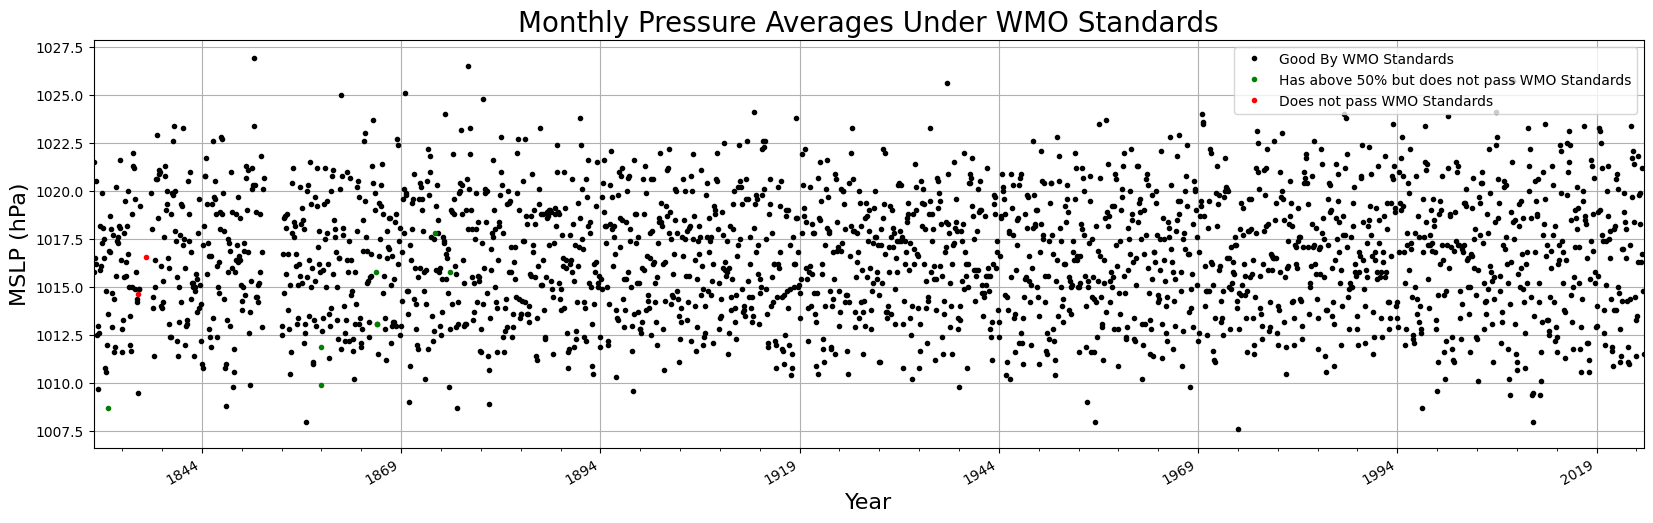

In [141]:

import matplotlib.pyplot as plt

# Assuming you have defined Xarray Datasets PERTH, ADELAIDE, CAPE_OTWAY, Using_Subs

fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the figsize as needed

# Plotting rolling 10-year mean
Perth_1830_2024_Monthlies.plot(ax=ax, color='black', marker='.', linestyle='None',label = 'Good By WMO Standards')
More_Then_50.plot(ax=ax, color='green', marker='.', linestyle= 'None', label = 'Has above 50% of values but does not pass WMO Standards')
Less_Then_50_Y.plot(ax=ax, color='red', marker='.', linestyle= 'None', label = 'Does not pass WMO Standards')
Updated_76_80.loc['1876':'1879'].plot(ax=ax, color='black', marker='.', linestyle='None')
plt.legend(['Good By WMO Standards','Has above 50% but does not pass WMO Standards','Does not pass WMO Standards'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('MSLP (hPa)', fontsize=16)
plt.grid()

plt.title('Monthly Pressure Averages Under WMO Standards',fontsize = 20)
fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\WMO Standards Monthly Pressure Average Perth.png", dpi=300, bbox_inches='tight')


In [151]:
## CHECK HOMOGENIETY WITH RHTEST ON FINAL RECORD
PER_M3 = ChatJR.rh_fmt_row_month_mean_all(Perth_1830_2024_Monthlies.round(2))
outpath = "C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH FINALISED/"
#combine the 3 datasets together
PER_M = pd.concat([PER_M3],axis = 0).reset_index(drop = True).round(2)
PER_M.to_csv(outpath + f'PERTH_FINAL_M_' + str(PER_M['year'][0]) + '-' + str(PER_M['year'].iloc[-1]) + '.dat', sep=' ', index=False, header=False)
PER_M.head(50)
'''
0 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH FINALISED/PERTH_FINAL_M_1830-2024.dat sample:(1 YifD  19000101) 
'''

'\n0 changepoints in Series C:/Users/jarra/Desktop/RA ASSISTANT/FINALISED/PART_2_RHTESTING/PERTH/PERTH FINALISED/PERTH_FINAL_M_1830-2024.dat sample:(1 YifD  19000101) \n'

MONTHLIES IS HOMOGENISE

# 14. SAVE DATASETS

In [142]:
Perth_1830_2024_Monthlies.loc['1865'].head(50)

MSLP
Date              
1865-01-01  1012.4
1865-02-01  1015.5
1865-03-01  1015.6
1865-04-01  1016.7
1865-05-01  1021.3
1865-06-01  1020.4
1865-07-01  1023.7
1865-08-01     NaN
1865-09-01  1019.0
1865-10-01  1019.9
1865-11-01     NaN
1865-12-01     NaN

In [145]:
Perth_1830_2024_Sub_Dailies.to_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_SUBDAILY_1830-2024.csv")
Perth_1830_2024_Dailies.to_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_DAILY_1830-2024.csv")
Perth_1830_2024_Monthlies.to_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_MONTHLY_1830-2024.csv")
Perth_1830_2024_Yearlies.to_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_YEARLY_1830-2024.csv")


In [146]:
Perth_1830_2024_Sub_Dailies.loc['1933-05-22']

MSLP
Date                       
1933-05-22 09:00:00  1003.9
1933-05-22 15:00:00  1004.8

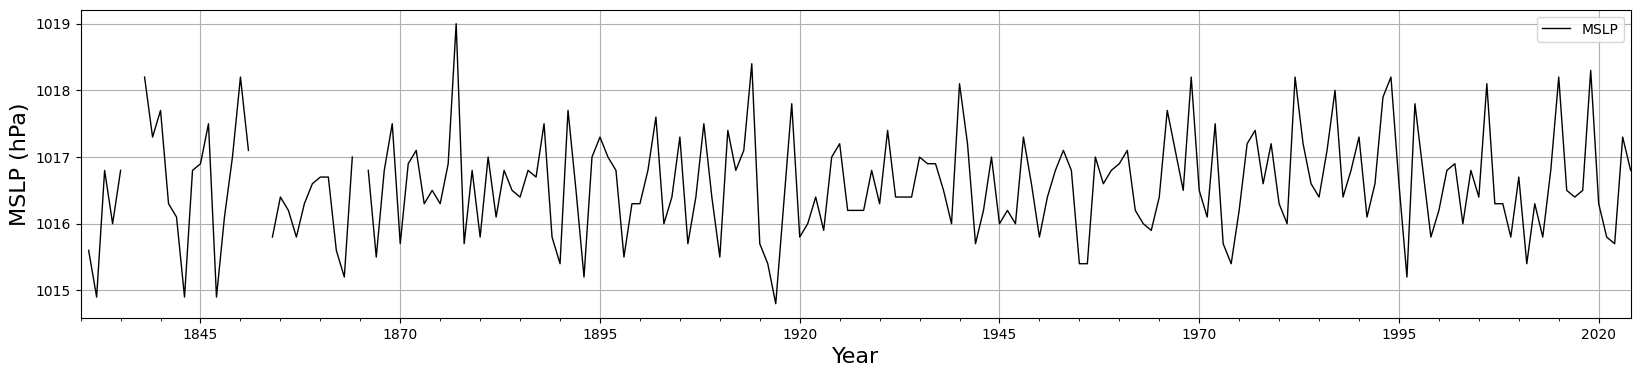

In [53]:

fig, ax= plt.subplots(1, 1, figsize=(20, 4), sharex=True)
Perth_1830_2024_Yearlies[['MSLP']].loc[:'2024'].plot(ax = ax,color = 'black',linewidth=  1)
plt.xlabel('Year', fontsize=16)
plt.ylabel('MSLP (hPa)', fontsize=16)
plt.grid()
plt.xlim(pd.Timestamp('1830-01-01'), pd.Timestamp('2024-12-31'))

fig.savefig(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\FIGURES\Annual Perth Pressure Avg 1830 2023.png", dpi=300, bbox_inches='tight')


# CHECK IMPACT ON 1994-01 PERTH AND 1979-05 CAPE LEEUWIN

In [154]:
PER_9am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\CAPEL_1979_PERTH_1994\output\PERTH_D9_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am['Date'] = pd.to_datetime(PER_9am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am['Date'] = PER_9am['Date'] + pd.to_timedelta('09:00:00')
PER_9am = PER_9am[['Date','adjusted']].set_index('Date')
PER_9am = PER_9am.rename(columns = {'adjusted':'MSLP'})


PER_3pm = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\CAPEL_1979_PERTH_1994\output\PERTH_D15_1830-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm['Date'] = pd.to_datetime(PER_3pm[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm['Date'] = PER_3pm['Date'] + pd.to_timedelta('15:00:00')
PER_3pm = PER_3pm[['Date','adjusted']].set_index('Date')
PER_3pm = PER_3pm.rename(columns = {'adjusted':'MSLP'})


PER_94 = round(pd.concat([PER_9am,PER_3pm],axis = 0).sort_index(),2).replace(-999.99, np.nan)

PER_94 = round(PER_94.sort_index(),1)
PER_94


MSLP
Date                       
1830-05-22 15:00:00  1010.4
1830-05-23 15:00:00     NaN
1830-05-24 09:00:00  1004.0
1830-05-24 15:00:00  1007.3
1830-05-25 09:00:00  1015.0
...                     ...
2024-12-29 15:00:00  1008.8
2024-12-30 09:00:00  1016.7
2024-12-30 15:00:00  1013.6
2024-12-31 09:00:00  1015.8
2024-12-31 15:00:00  1011.5

[142162 rows x 1 columns]

In [155]:
PER_9am = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\CAPEL_1979_PERTH_1994\output\CL_D9_1907-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_9am['Date'] = pd.to_datetime(PER_9am[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_9am['Date'] = PER_9am['Date'] + pd.to_timedelta('09:00:00')
PER_9am = PER_9am[['Date','adjusted']].set_index('Date')
PER_9am = PER_9am.rename(columns = {'adjusted':'MSLP'})


PER_3pm = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\PART_2_RHTESTING\CAPEL_1979_PERTH_1994\output\CL_D15_1907-2024_QMadjDLY.dat",
                     sep=' ', header=None,names=['Year','Month','Day','orig','adjusted','mean-adj daily','QM-adj','mean adj'])[['Year','Month','Day','adjusted']]

# Combine the 'Year', 'Month', and 'Day' columns to create a datetime column
PER_3pm['Date'] = pd.to_datetime(PER_3pm[['Year', 'Month', 'Day']])
# Add 9 hours to the datetime column
PER_3pm['Date'] = PER_3pm['Date'] + pd.to_timedelta('15:00:00')
PER_3pm = PER_3pm[['Date','adjusted']].set_index('Date')
PER_3pm = PER_3pm.rename(columns = {'adjusted':'MSLP'})


CL_79 = round(pd.concat([PER_9am,PER_3pm],axis = 0).sort_index(),2).replace(-999.99, np.nan)

CL_79 = round(CL_79.sort_index(),1)
CL_79

MSLP
Date                       
1907-01-01 09:00:00  1017.8
1907-01-01 15:00:00  1019.8
1907-01-02 09:00:00  1021.6
1907-01-02 15:00:00  1018.2
1907-01-03 09:00:00  1012.9
...                     ...
2024-12-29 15:00:00  1014.2
2024-12-30 09:00:00  1020.9
2024-12-30 15:00:00  1020.1
2024-12-31 09:00:00  1019.4
2024-12-31 15:00:00  1017.1

[86200 rows x 1 columns]

In [156]:
#Perth
PER_Normal = PER_Final[PER_Final.index.hour.isin([9, 15])]


In [157]:
CL_MSLP = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\CAPE_LEEUWIN_PRESSURE_CORRECTED_SUBDAILY_1907-2024.csv")
CL_MSLP.set_index('Date',inplace = True)
CL_MSLP.index= pd.to_datetime(CL_MSLP.index,dayfirst = True,format='mixed')

CL_Normal = CL_MSLP[CL_MSLP.index.hour.isin([9, 15])]


In [158]:
#94-79

#94-Normal

#Normal - 79

#Normal - Normal

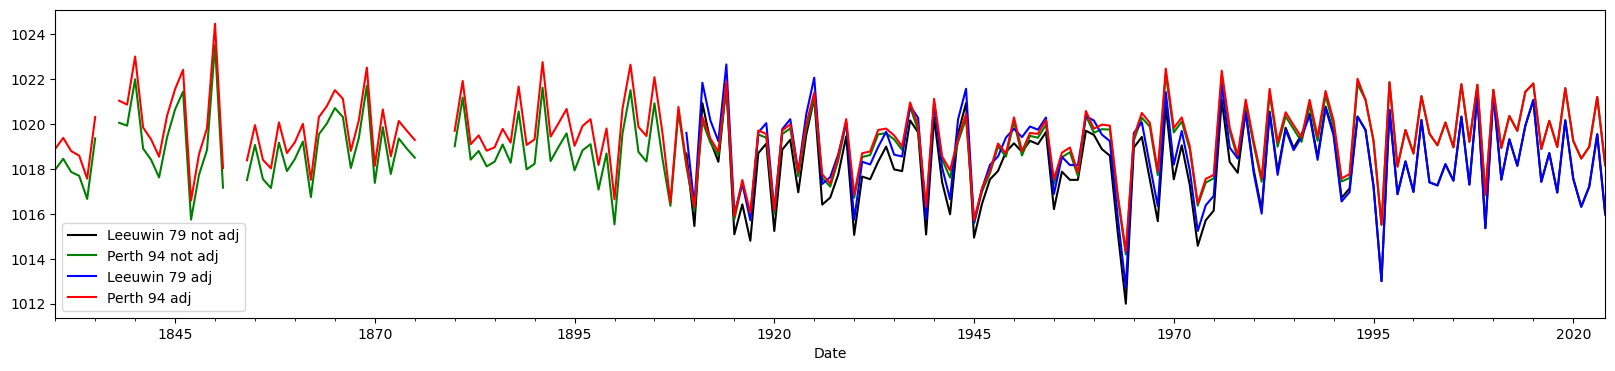

In [159]:
#Plot All on a graph
fig, ax= plt.subplots(1, 1, figsize=(20, 4), sharex=True)
ChatJR.filter_dataframe_by_months(CL_Normal, [6, 7, 8]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'black')
ChatJR.filter_dataframe_by_months(PER_Normal,[6,7,8]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'green')
ChatJR.filter_dataframe_by_months(CL_79,[6,7,8]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'blue')
ChatJR.filter_dataframe_by_months(PER_94,[6,7,8]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'red')
plt.legend(['Leeuwin 79 not adj', 'Perth 94 not adj', 'Leeuwin 79 adj','Perth 94 adj'])


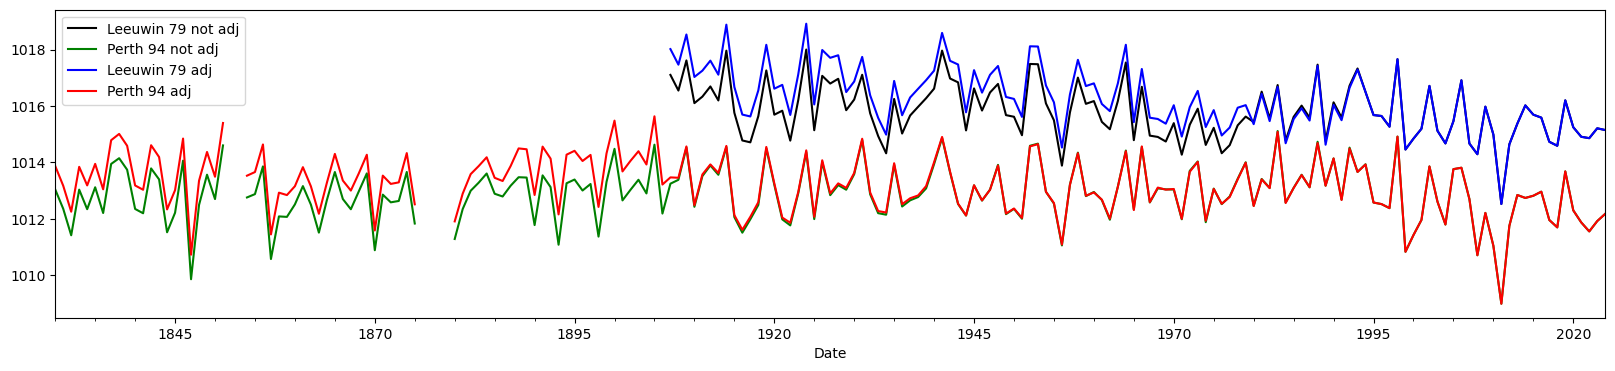

In [160]:
#Plot All on a graph
fig, ax= plt.subplots(1, 1, figsize=(20, 4), sharex=True)
ChatJR.filter_dataframe_by_months(CL_Normal, [1, 2, 12]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'black')
ChatJR.filter_dataframe_by_months(PER_Normal,[1,2,12]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'green')
ChatJR.filter_dataframe_by_months(CL_79,[1,2,12]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'blue')
ChatJR.filter_dataframe_by_months(PER_94,[1,2,12]).resample('D').mean().resample('MS').mean().resample('YS').mean().plot(ax=ax,linestyle = '-',color= 'red')
plt.legend(['Leeuwin 79 not adj', 'Perth 94 not adj', 'Leeuwin 79 adj','Perth 94 adj'])


In [161]:
WCL79 = ChatJR.filter_dataframe_by_months(CL_79,[6,7,8]).resample('D').mean().resample('MS').mean().resample('YS').mean()
WCL = ChatJR.filter_dataframe_by_months(CL_Normal, [6, 7, 8]).resample('D').mean().resample('MS').mean().resample('YS').mean()
WP94 = ChatJR.filter_dataframe_by_months(PER_94,[6,7,8]).resample('D').mean().resample('MS').mean().resample('YS').mean()
WP = ChatJR.filter_dataframe_by_months(PER_Normal,[6,7,8]).resample('D').mean().resample('MS').mean().resample('YS').mean()

In [162]:
SCL79 = ChatJR.filter_dataframe_by_months(CL_79,[1,2,12]).resample('D').mean().resample('MS').mean().resample('YS').mean()
SCL = ChatJR.filter_dataframe_by_months(CL_Normal, [1, 2, 12]).resample('D').mean().resample('MS').mean().resample('YS').mean()
SP94 = ChatJR.filter_dataframe_by_months(PER_94,[1,2,12]).resample('D').mean().resample('MS').mean().resample('YS').mean()
SP = ChatJR.filter_dataframe_by_months(PER_Normal,[1,2,12]).resample('D').mean().resample('MS').mean().resample('YS').mean()

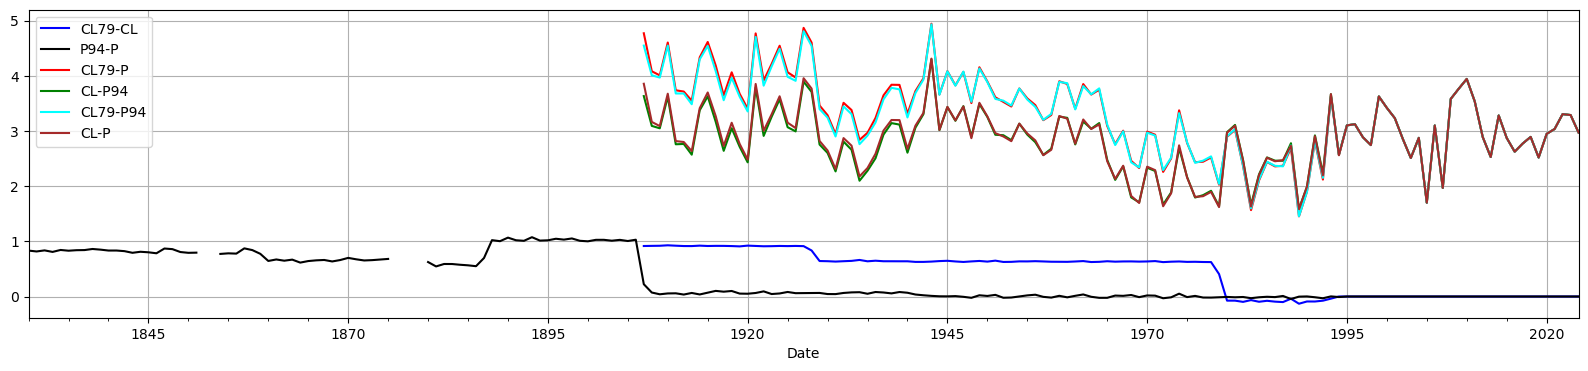

In [163]:
fig, ax= plt.subplots(1, 1, figsize=(20, 4), sharex=True)
(SCL79-SCL).plot(ax=ax,linestyle = '-',color= 'blue')
(SP94-SP).plot(ax=ax,linestyle = '-',color= 'black')

(SCL79-SP).plot(ax=ax,linestyle = '-',color= 'red')
(SCL-SP94).plot(ax=ax,linestyle = '-',color= 'green')

(SCL79-SP94).plot(ax=ax,linestyle = '-',color= 'cyan')
(SCL-SP).plot(ax=ax,linestyle = '-',color= 'brown')


plt.legend(['CL79-CL', 'P94-P', 'CL79-P', 'CL-P94','CL79-P94', 'CL-P'])

plt.grid()

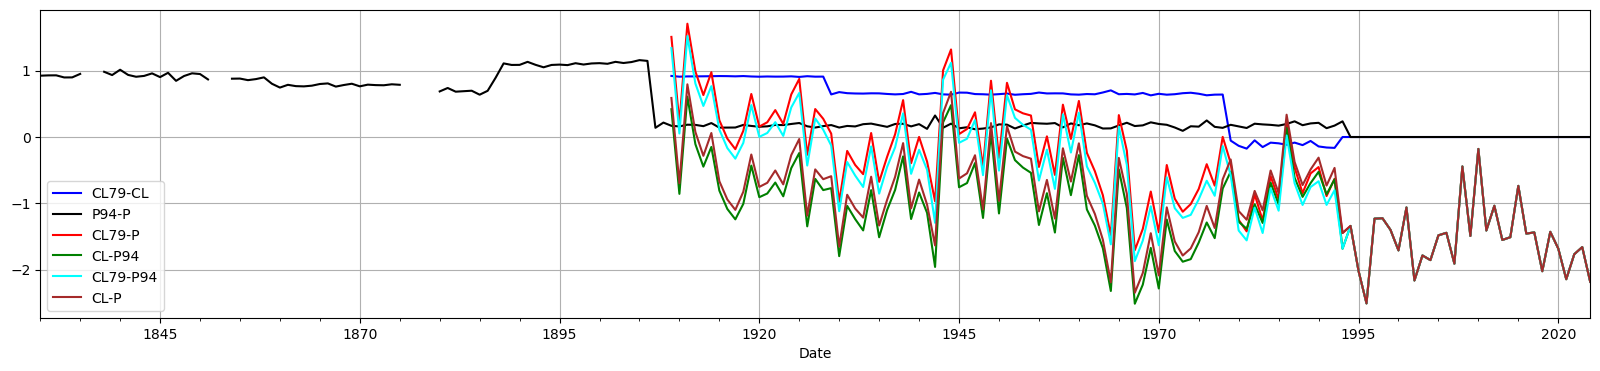

In [164]:
fig, ax= plt.subplots(1, 1, figsize=(20, 4), sharex=True)
(WCL79-WCL).plot(ax=ax,linestyle = '-',color= 'blue')
(WP94-WP).plot(ax=ax,linestyle = '-',color= 'black')

(WCL79-WP).plot(ax=ax,linestyle = '-',color= 'red')
(WCL-WP94).plot(ax=ax,linestyle = '-',color= 'green')

(WCL79-WP94).plot(ax=ax,linestyle = '-',color= 'cyan')
(WCL-WP).plot(ax=ax,linestyle = '-',color= 'brown')


plt.legend(['CL79-CL', 'P94-P', 'CL79-P', 'CL-P94','CL79-P94', 'CL-P'])

plt.grid()

#Red is the worst
#Cyan is the second worst
#- this means you cannot update CL with 1979 as the RHTest does not represent it well

It seems that we are still going to have imperfect results. It is the best we can do given our position and I think where we stand with the datasets is as best we can do. Unfortunetly

In [165]:
#Find dif between Xi-Xi-1
WCLD = (WCL - WCL.shift(1)).round(1)
WCL79D = (WCL79 - WCL79.shift(1)).round(1)
WPD = (WP - WP.shift(1)).round(1)
WP94D = (WP94 - WP94.shift(1)).round(1)

#Rename for corr_sig
WPD = WPD.rename(columns = {'MSLP':'PERTH'})
WP94D = WP94D.rename(columns = {'MSLP':'PERTH'})
WCLD = WCLD.rename(columns = {'MSLP':'LEEUWIN'})
WCL79D = WCL79D.rename(columns = {'MSLP':'LEEUWIN'})

#Combine
PRESSURE_CL_P = pd.concat([WPD,WCLD],axis=1).dropna()
PRESSURE_CL_P94 = pd.concat([WP94D,WCLD],axis=1).dropna()
PRESSURE_CL79_P = pd.concat([WPD,WCL79D],axis=1).dropna()
PRESSURE_CL79_P94 = pd.concat([WP94D,WCL79D],axis=1).dropna()



#### 11-YEAR RUNNING CORRELATION PLOTS
CL_P_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL_P, 'PERTH', 'LEEUWIN', 11, 0.7)
CL_P94_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL_P94, 'PERTH', 'LEEUWIN', 11, 0.7)
CL79_P_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL79_P, 'PERTH', 'LEEUWIN', 11, 0.7)
CL79_P94_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL79_P94, 'PERTH', 'LEEUWIN', 11, 0.7)


(0.5, 1.0)

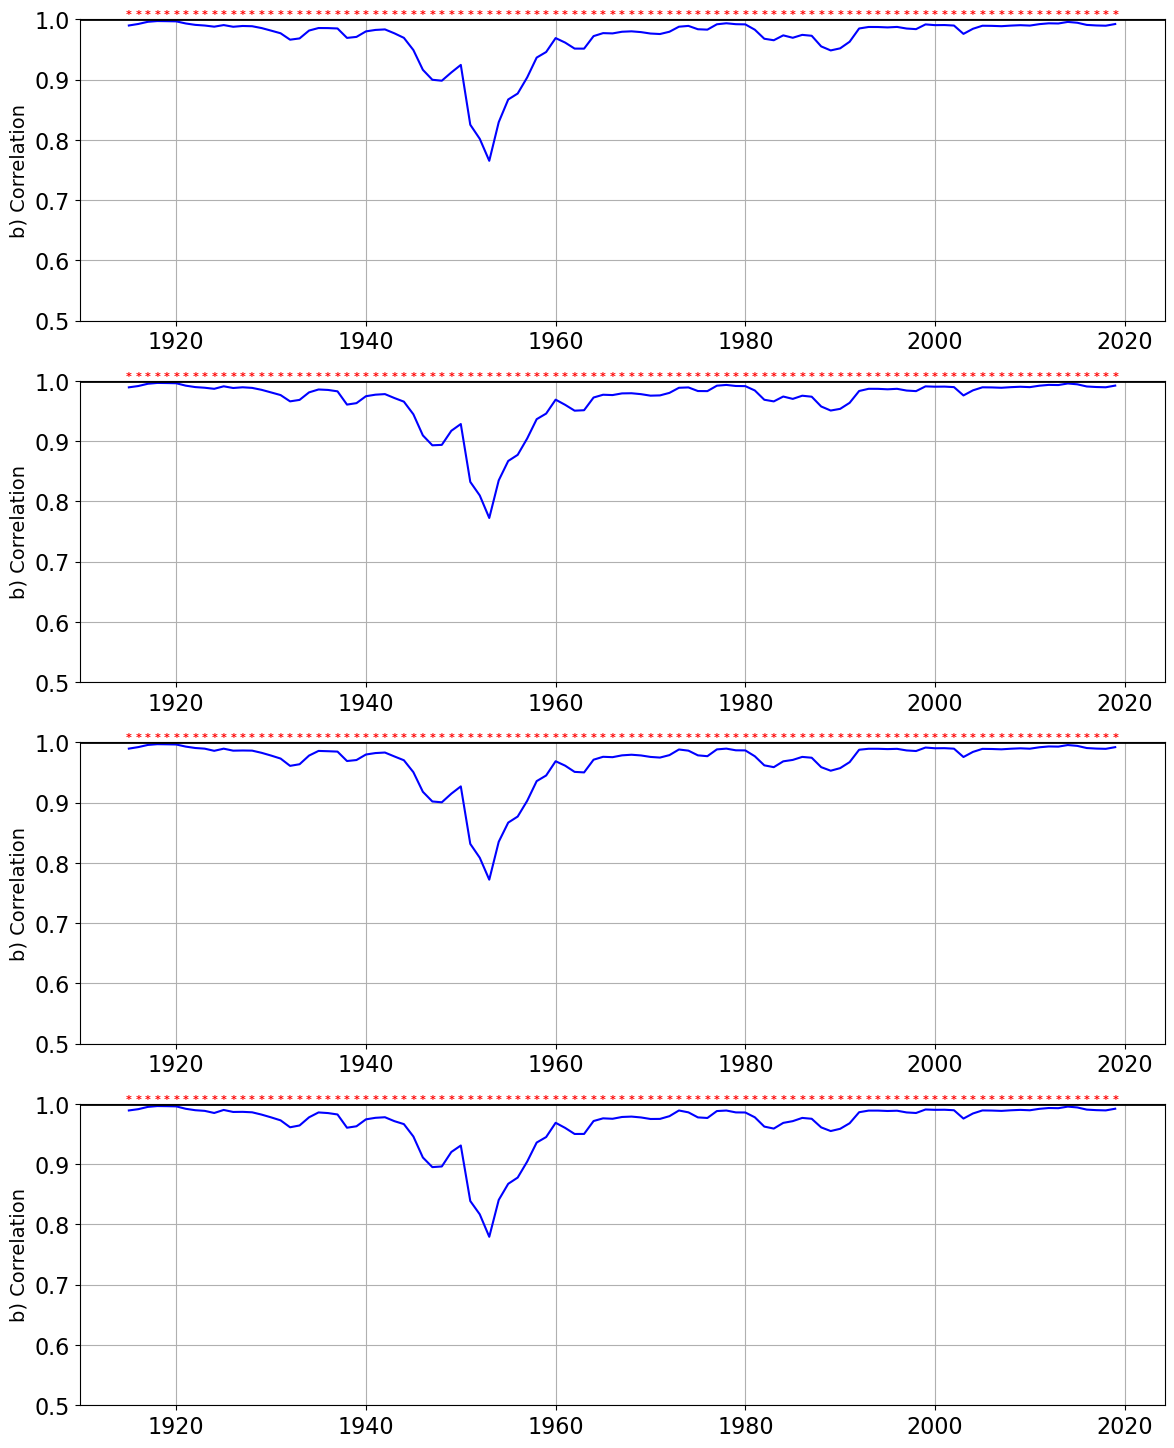

In [166]:
#Create the figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 18))
ax= ax1
# Plot the running correlation
ax.plot(CL_P_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit



#Create the figure
ax= ax2
# Plot the running correlation
ax.plot(CL_P94_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit



#Create the figure
ax= ax3
# Plot the running correlation
ax.plot(CL79_P_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit


#Create the figure
ax= ax4
# Plot the running correlation
ax.plot(CL79_P94_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax1.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax2.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax3.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax4.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit




In [167]:
CL_P_Corr.dropna()

correlation significant
Date                               
1915-01-01     0.989696         95%
1916-01-01     0.992223         95%
1917-01-01     0.995792         95%
1918-01-01     0.997049         95%
1919-01-01     0.996838         95%
...                 ...         ...
2015-01-01     0.994242         95%
2016-01-01     0.990656         95%
2017-01-01     0.989756         95%
2018-01-01     0.989327         95%
2019-01-01     0.992128         95%

[105 rows x 2 columns]

In [168]:
CL79_P94_Corr.dropna()

correlation significant
Date                               
1915-01-01     0.989234         95%
1916-01-01     0.991395         95%
1917-01-01     0.995146         95%
1918-01-01     0.996541         95%
1919-01-01     0.996341         95%
...                 ...         ...
2015-01-01     0.994242         95%
2016-01-01     0.990656         95%
2017-01-01     0.989756         95%
2018-01-01     0.989327         95%
2019-01-01     0.992128         95%

[105 rows x 2 columns]

In [169]:
P_MSLP_SD = pd.read_csv(r"C:\Users\jarra\Desktop\RA ASSISTANT\FINALISED\DATASETS\PERTH_METRO_PRESSURE_CORRECTED_SUBDAILY_1830-2024.csv").set_index('Date')
P_MSLP_SD.index= pd.to_datetime(P_MSLP_SD.index,format='mixed',dayfirst = True)
WP_MSLP_SD = ChatJR.filter_dataframe_by_months(P_MSLP_SD, [6, 7, 8]).resample('D').mean().resample('MS').mean().resample('YS').mean()
WP = ChatJR.filter_dataframe_by_months(PER_Final, [6, 7, 8]).resample('D').mean().resample('MS').mean().resample('YS').mean()


<Axes: xlabel='Date'>

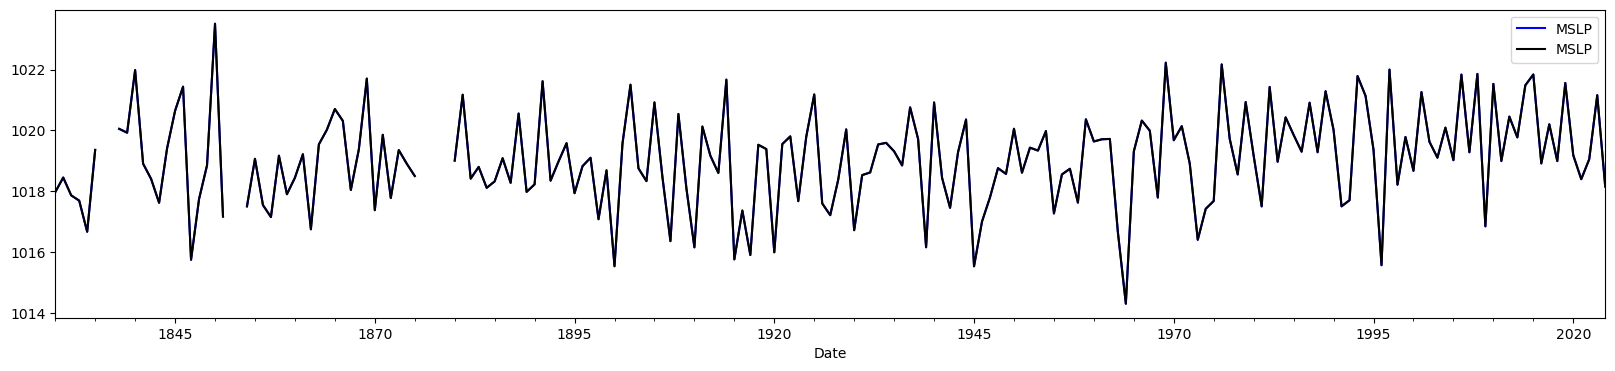

In [170]:
fig, ax= plt.subplots(1, 1, figsize=(20, 4), sharex=True)
(WP_MSLP_SD).plot(ax=ax,linestyle = '-',color= 'blue')
(WP).plot(ax=ax,linestyle = '-',color= 'black')


(0.5, 1.0)

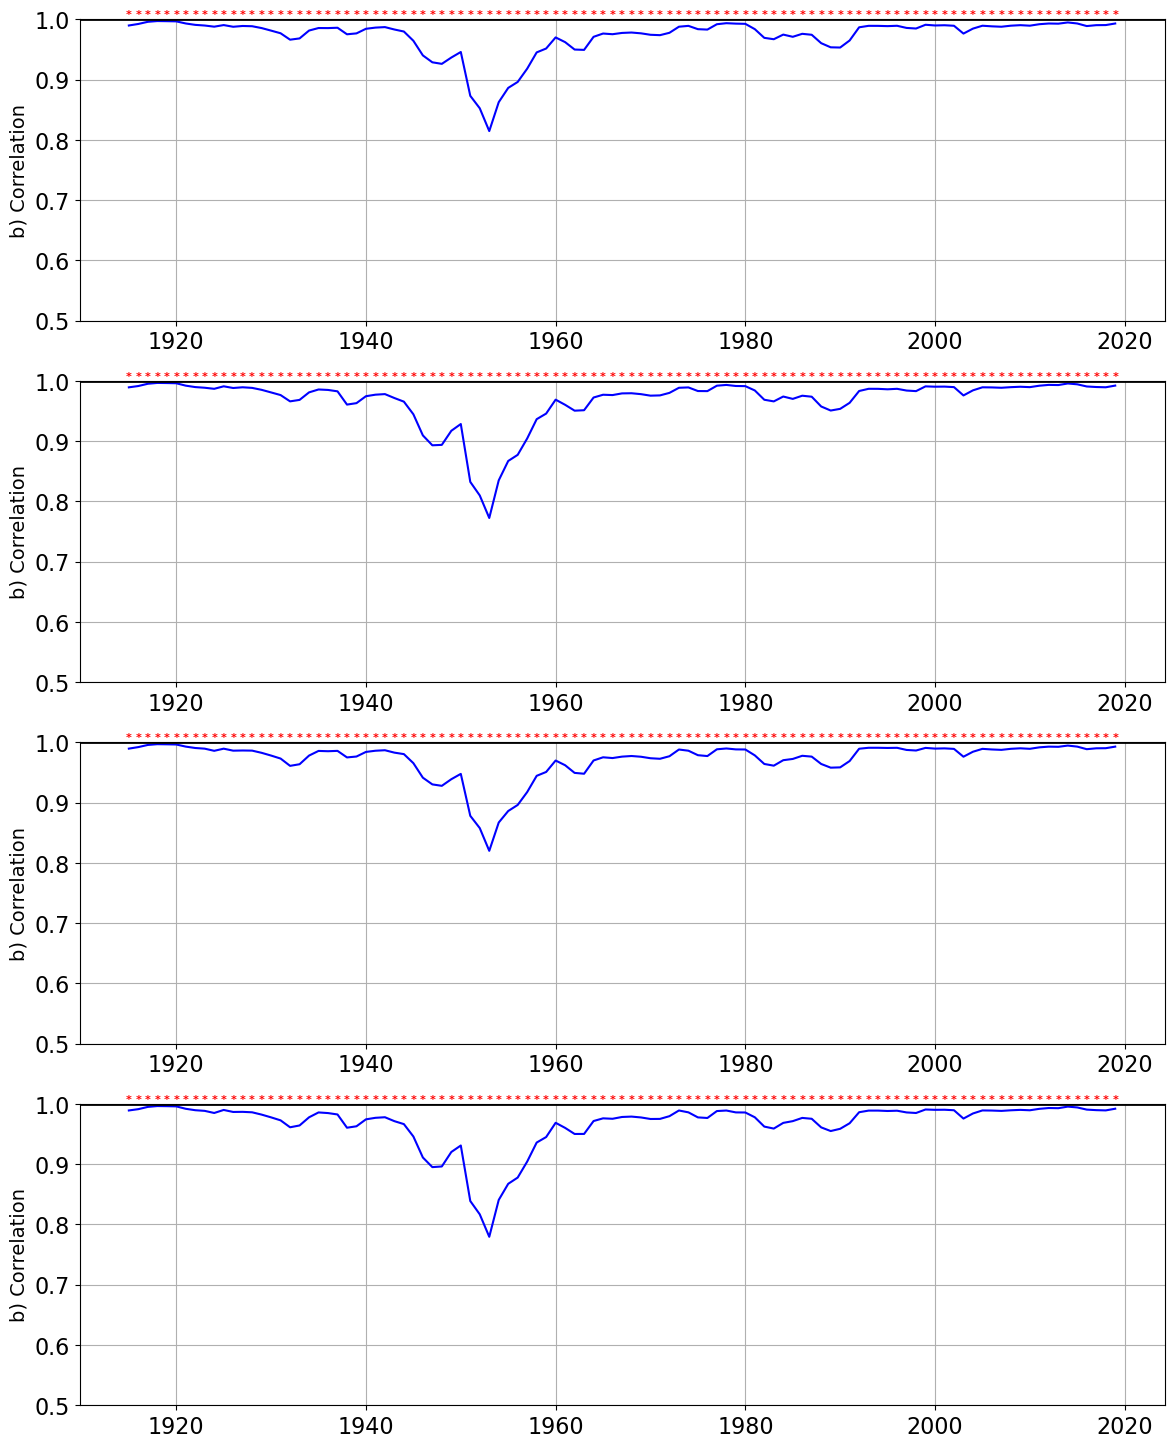

In [171]:
#Find dif between Xi-Xi-1
WCLD = (WCL - WCL.shift(1)).round(1)
WCL79D = (WCL79 - WCL79.shift(1)).round(1)
WPD = (WP - WP.shift(1)).round(1)
WP94D = (WP94 - WP94.shift(1)).round(1)

#Rename for corr_sig
WPD = WPD.rename(columns = {'MSLP':'PERTH'})
WP94D = WP94D.rename(columns = {'MSLP':'PERTH'})
WCLD = WCLD.rename(columns = {'MSLP':'LEEUWIN'})
WCL79D = WCL79D.rename(columns = {'MSLP':'LEEUWIN'})

#Combine
PRESSURE_CL_P = pd.concat([WPD,WCLD],axis=1).dropna()
PRESSURE_CL_P94 = pd.concat([WP94D,WCLD],axis=1).dropna()
PRESSURE_CL79_P = pd.concat([WPD,WCL79D],axis=1).dropna()
PRESSURE_CL79_P94 = pd.concat([WP94D,WCL79D],axis=1).dropna()



#### 11-YEAR RUNNING CORRELATION PLOTS
CL_P_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL_P, 'PERTH', 'LEEUWIN', 11, 0.7)
CL_P94_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL_P94, 'PERTH', 'LEEUWIN', 11, 0.7)
CL79_P_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL79_P, 'PERTH', 'LEEUWIN', 11, 0.7)
CL79_P94_Corr = ChatJR.running_correlation_with_p(PRESSURE_CL79_P94, 'PERTH', 'LEEUWIN', 11, 0.7)

#Create the figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 18))
ax= ax1
# Plot the running correlation
ax.plot(CL_P_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit



#Create the figure
ax= ax2
# Plot the running correlation
ax.plot(CL_P94_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit



#Create the figure
ax= ax3
# Plot the running correlation
ax.plot(CL79_P_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit


#Create the figure
ax= ax4
# Plot the running correlation
ax.plot(CL79_P94_Corr['correlation'], color='b', label='Pearson\'s r Correlation')

for idx, row in CL_P_Corr.iterrows():
    if row['significant'] == '90%':
        ax.text(idx, 1, '+',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')
    elif row['significant'] == '95%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    elif row['significant'] == '99%':
        ax.text(idx, 1, '*',
                ha='center', va='bottom', color='red', fontsize=8, fontweight='bold')    
    else:
        pass  # or continue


# Axis and grid setup
ax.set_ylabel('b) Correlation', color='k',fontsize =14)
ax.tick_params('y', colors='k',labelsize =16)
ax.grid(True)


# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=-0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=-1, color='black', linestyle='-', linewidth=2)
#ax2.axhline(y=0.2, color='grey', linestyle='-', linewidth=2)
ax.axhline(y=1, color='black', linestyle='-', linewidth=2)
ax.tick_params('x', colors='k',labelsize =16)

# Set y-axis limits
ax.set_ylim(0.8, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax1.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax2.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax3.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit
ax4.set_ylim(0.5, 1)  # <-- slightly expanded y-limit so the top asterisks fit




In [172]:


WCLD

LEEUWIN
Date               
1907-01-01      NaN
1908-01-01      NaN
1909-01-01      NaN
1910-01-01     -3.2
1911-01-01      5.5
...             ...
2020-01-01     -2.6
2021-01-01     -1.2
2022-01-01      0.9
2023-01-01      2.3
2024-01-01     -3.6

[118 rows x 1 columns]

Key outtakes with the inclusion of Part 3 too with Summer
difference between CL79 and P94 inclusions tell me both cannot be correcting in the RH test a the difference moves from 2.5hpa to a staggering 5hpa
difference between SCL and SPN inclusions  indicate the most stable of the bunch with it moving from 2.5hpa to 3hpa

Therefore 1979 for Cape Leeuwin and 1994 for Perth are climatic and if they were to be implemented, it seems it will cause them to be more non-climatic then climatic


For winter we see that the differences that the same discussion as per the summer occurs, with the less signficiant change occurs when 79 and 94 is exlcused from RHTesting. However it is important to note that in 1960-1965, it seems that a possibe non-climatic change that has not been identified as a type 1 or a metadata change in type 0 has possibly occured. without any more known metadata, and sticking to our process, we cannot further investigate this period and must understand that we have updated these datasets to the best of our ability.

We have already excluded 94 from our results

sO WE had to sanity check 1928 too, and i am happy to keep 1928 in there, overall I am confident about the final datasets now